In [1]:
from perAux import *
from itertools import combinations
from sklearn.preprocessing import normalize
#for downsampling statistics
def downsample1D(ex,big,small):
    return np.ravel(ex.reshape(small,big//small).sum(1))
def downsample(ex,big,small):
    return np.ravel(ex.reshape(small,big//small,small,big//small).sum(3).sum(1))
#compute angle between two vectors 
def ang(v1,v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))
#some ways to transform 1d curves for fun with visualization
def transform(curve):
    return max(curve)-np.array(curve)
def transform2(curve):
    return -np.array([0]+[-curve[i]+curve[i-1] for i in range(1,len(curve))])

define loading helper function, downsample from 1000 to 100 for speed

In [14]:
len(G83ListR[0])

500

In [22]:
def loadHelp(m,nm=True,tr=transform,ds=1):
    #XXC is list of the m-th statistic with parameters XX
    GC=[]
    NGC=[]
    G83C=[]
    NG1C=[]
    GCR=[]
    NGCR=[]
    G83CR=[]
    #n is the number of statistics per simulation.
    n=15
    #bb1 and ss1 are downsampling parameters for non-PIs 
    bb1=len(GList[m])
    ss1=int(len(GList[m])/ds)
    #bb and ss are downsampling parameters for the PIs
    bb=200
    ss=40
    for i in range(len(GList)//n):
        temp=GList[n*i+m]
        if m not in [0,1,2,6,7,8]: temp=tr(temp)
        GC.append(downsample1D(temp,bb1,ss1))
    for i in range(len(NGList)//n):
        temp=NGList[n*i+m]
        if m not in [0,1,2,6,7,8]: temp=tr(temp)
        NGC.append(downsample1D(temp,bb1,ss1))
    for i in range(len(G83List)//n):
        temp=G83List[n*i+m]
        if m not in [0,1,2,6,7,8]: temp=tr(temp)
        G83C.append(downsample1D(temp,bb1,ss1))
    for i in range(len(NG1List)//n):
        temp=NG1List[n*i+m]
        if m not in [0,1,2,6,7,8]: temp=tr(temp)
        NG1C.append(downsample1D(temp,bb1,ss1))
    for i in range(len(GListR)//n):
        temp=GListR[n*i+m]
        if m not in [0,1,2,6,7,8]: temp=tr(temp)
        GCR.append(downsample1D(temp,bb1,ss1))
    for i in range(len(NGListR)//n):
        temp=NGListR[n*i+m]
        if m not in [0,1,2,6,7,8]: temp=tr(temp)
        NGCR.append(downsample1D(temp,bb1,ss1))
    for i in range(len(G83ListR)//n):
        temp=G83ListR[n*i+m]
        if m not in [0,1,2,6,7,8]: temp=tr(temp)
        G83CR.append(downsample1D(temp,len(temp),ss1))

    #now combine sub-boxes of whole simulations, normalizing to max=1 if normMax==True
    normMax=nm
    NGC=np.array(NGC).reshape(np.shape(NGC)[0]//8,8,np.shape(NGC)[1]).sum(1)
    if m in [6,7,8]: NGC=np.array([downsample(elm,bb,ss) for elm in NGC])
    if normMax==True and m not in [6,7,8]: NGC=np.array([elm/np.max(elm) for elm in NGC])

    GC=np.array(GC).reshape(np.shape(GC)[0]//8,8,np.shape(GC)[1]).sum(1)
    if m in [6,7,8]: GC=np.array([downsample(elm,bb,ss) for elm in GC])
    if normMax==True and m not in [6,7,8]: GC=np.array([elm/np.max(elm) for elm in GC])

    G83C=np.array(G83C).reshape(np.shape(G83C)[0]//8,8,np.shape(G83C)[1]).sum(1)
    if m in [6,7,8]: G83C=np.array([downsample(elm,bb,ss) for elm in G83C])
    if normMax==True and m not in [6,7,8]: G83C=np.array([elm/np.max(elm) for elm in G83C])

    NG1C=np.array(NG1C).reshape(np.shape(NG1C)[0]//8,8,np.shape(NG1C)[1]).sum(1)
    if m in [6,7,8]: NG1C=np.array([downsample(elm,bb,ss) for elm in NG1C])
    if normMax==True and m not in [6,7,8]: NG1C=np.array([elm/np.max(elm) for elm in NG1C])

    #for big-box sims there are no subboxes, so it's simpler
    if m in [6,7,8]: GCR=np.array([downsample(elm,bb,ss) for elm in GCR])
    if normMax==True and m not in [6,7,8]: GCR=np.array([elm/np.max(elm) for elm in GCR])
    if m in [6,7,8]: NGCR=np.array([downsample(elm,bb,ss) for elm in NGCR])
    if normMax==True and m not in [6,7,8]: NGCR=np.array([elm/np.max(elm) for elm in NGCR])
    if m in [6,7,8]: G83CR=np.array([downsample(elm,bb,ss) for elm in G83CR])
    if normMax==True and m not in [6,7,8]: G83CR=np.array([elm/np.max(elm) for elm in G83CR])
        
    #now average over n=3 subsamples of a given simulation
    n=3
    NGC2=[]
    for i in range(len(NGC)//n):
        NGC2.append(np.mean(NGC[n*i:n*(i+1)],axis=0))
    GC2=[]
    for i in range(len(GC)//n):
        GC2.append(np.mean(GC[n*i:n*(i+1)],axis=0))
    G83C2=[]
    for i in range(len(G83C)//n):
        G83C2.append(np.mean(G83C[n*i:n*(i+1)],axis=0))
    NG1C2=[]
    for i in range(len(NG1C)//n):
        NG1C2.append(np.mean(NG1C[n*i:n*(i+1)],axis=0))
    GCR2=[]
    for i in range(len(GCR)//n):
        GCR2.append(np.mean(GCR[n*i:n*(i+1)],axis=0))
    G83CR2=[]
    for i in range(len(G83CR)//n):
        G83CR2.append(np.mean(G83CR[n*i:n*(i+1)],axis=0))
    NGCR2=[]
    for i in range(len(NGCR)//n):
        NGCR2.append(np.mean(NGCR[n*i:n*(i+1)],axis=0))
    NGC=np.array(NGC2)
    NG1C=np.array(NG1C2)
    GC=np.array(GC2)
    G83C=np.array(G83C2)
    GCR=np.array(GCR2)
    NGCR=np.array(NGCR2)
    G83CR=np.array(G83CR2)
    
    return GCR, NGCR, G83CR, GC, NGC, NG1C, G83C

move to relevant directory and load data

In [2]:
cd /Users/alex/Documents/2Gpc/cartesiusFiles/PI/LDTM15/z1

/Users/alex/Documents/2Gpc/cartesiusFiles/PI/LDTM15/z1


In [4]:
GListR=[]
for elm in np.sort(glob.glob('G-85*-LDTMR*')):
    temp=np.ravel(np.loadtxt(elm,delimiter=','))
    GListR.append(temp)
NGListR=[]
for elm in np.sort(glob.glob('NG-250*-LDTMR*')):
    temp=np.ravel(np.loadtxt(elm,delimiter=','))
    NGListR.append(temp)
G83ListR=[]
for elm in np.sort(glob.glob('G-87*-LDTMR*')):
    temp=np.ravel(np.loadtxt(elm,delimiter=','))
    G83ListR.append(temp)
GList=[]
for elm in np.sort(glob.glob('G-85*-LDTM15-*')):
    #print(elm)
    temp=np.ravel(np.loadtxt(elm,delimiter=','))
    GList.append(temp)
NGList=[]
for elm in np.sort(glob.glob('NG-250-*LDTM15-*')):
    temp=np.ravel(np.loadtxt(elm,delimiter=','))
    NGList.append(temp)
NG1List=[]
for elm in np.sort(glob.glob('NG-10-*LDTM15-*')):
    temp=np.ravel(np.loadtxt(elm,delimiter=','))
    NG1List.append(temp)
G83List=[]
for elm in np.sort(glob.glob('G-87*LDTM15-*')):
    temp=np.ravel(np.loadtxt(elm,delimiter=','))
    G83List.append(temp)

check shapes of loaded data

In [7]:
np.array([np.shape(elm) for elm in [GListR,NGListR,G83ListR,GList,NGList,NG1List,G83List]])#/15/3/8

array([[ 225],
       [ 225],
       [ 225],
       [5400],
       [3600],
       [5400],
       [1080]])

check length of example statistic

In [15]:
np.shape(GList[0])

(1000,)

# Anomaly detection

In [23]:
tran=True
dListList=[]
NormBox=True
#skip PIs if desired
#for m in range(15):
for m in [0,1,2,3,4,5,9,10,11,12,13,14]:
    GCR, NGCR, G83CR, GC, NGC, NG1C, G83C=loadHelp(m,nm=NormBox)
    
    print('m='+str(m))
    NGtest=[]
    Gtest=[]
    G83test=[]
    #templateInd=np.array([9])
    distList=[]
    
    for NGtestInd in np.array(list([list(elm) for elm in combinations(range(15),5)])):
        Gtest=[]
        NGtest=np.mean(NG1C[NGtestInd],axis=0)
        if NormBox==False and m not in [6,7,8]: NGtest=NGtest/np.max(NGtest)
        for GInd in np.array(list([list(elm) for elm in combinations([elm for elm in range(15) if elm not in NGtestInd],5)])):
            Gdat=np.mean(GC[GInd],axis=0)
            if NormBox==False and m not in [6,7,8]: Gdat=Gdat/np.max(Gdat)
            Gtest.append(Gdat)
        #remove some fraction of variance entries
        var=np.var(Gtest,axis=0)
        Gavg=np.mean(Gtest,axis=0)
        Gavg=np.delete(Gavg,np.where(var==0))
        NGtest=np.delete(NGtest,np.where(var==0))
        var=np.delete(var,np.where(var==0))
        thresh=np.percentile(var,1)
        Gavg=np.delete(Gavg,np.where(var<thresh))
        NGtest=np.delete(NGtest,np.where(var<thresh))
        var=np.delete(var,np.where(var<thresh))
            
        distList.append(np.dot(np.square(NGtest-Gavg),1/var))
    dListList.append(distList)
tran=True
dListList2=[]
NormBox=True
#for m in range(15):
for m in [0,1,2,3,4,5,9,10,11,12,13,14]:
    GCR, NGCR, G83CR, GC, NGC, NG1C, G83C=loadHelp(m,nm=NormBox)
    
    print('m='+str(m))
    NGtest=[]
    Gtest=[]
    G83test=[]
    #templateInd=np.array([9])
    distList=[]
    
    for NGtestInd in np.array(list([list(elm) for elm in combinations(range(15),5)])):
        Gtest=[]
        NGtest=np.mean(GC[NGtestInd],axis=0)
        if NormBox==False and m not in [6,7,8]: NGtest=NGtest/np.max(NGtest)
        for GInd in np.array(list([list(elm) for elm in combinations([elm for elm in range(15) if elm not in NGtestInd],5)])):
            Gdat=np.mean(GC[GInd],axis=0)
            if NormBox==False and m not in [6,7,8]: Gdat=Gdat/np.max(Gdat)
            Gtest.append(Gdat)
        var=np.var(Gtest,axis=0)
        Gavg=np.mean(Gtest,axis=0)
        Gavg=np.delete(Gavg,np.where(var==0))
        NGtest=np.delete(NGtest,np.where(var==0))
        var=np.delete(var,np.where(var==0))
        thresh=np.percentile(var,1)
        Gavg=np.delete(Gavg,np.where(var<thresh))
        NGtest=np.delete(NGtest,np.where(var<thresh))
        var=np.delete(var,np.where(var<thresh))
        
            
        distList.append(np.dot(np.square(NGtest-Gavg),1/var))
    dListList2.append(distList)

m=0
m=1
m=2
m=3
m=4
m=5
m=9
m=10
m=11
m=12
m=13
m=14
m=0
m=1
m=2
m=3
m=4
m=5
m=9
m=10
m=11
m=12
m=13
m=14


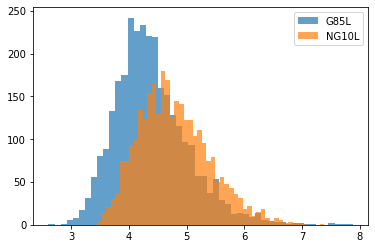

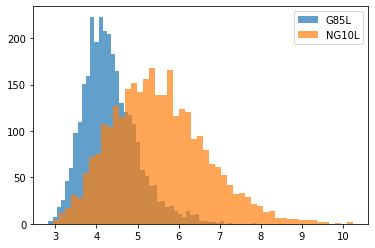

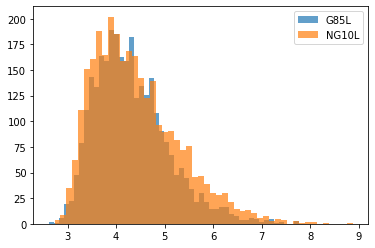

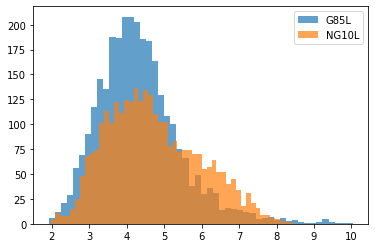

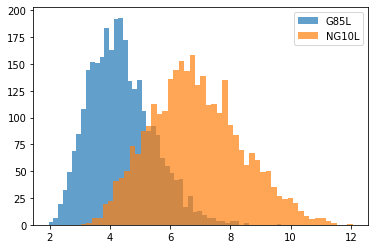

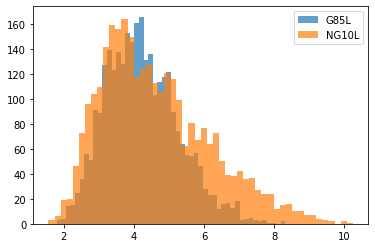

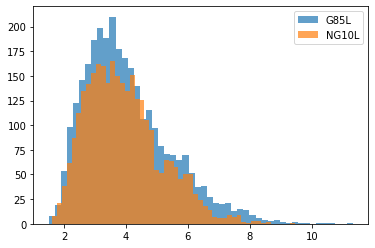

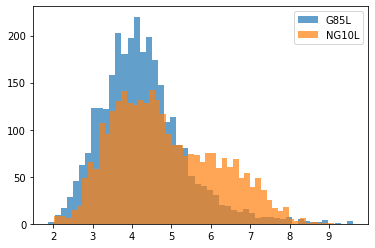

In [24]:
for i in range(len(dListList[:])):
    plt.figure()
    plt.hist(np.sqrt(dListList2)[i]/np.sqrt(100),bins=50,alpha=0.7);
    plt.hist(np.sqrt(dListList)[i]/np.sqrt(100),bins=50,alpha=0.7);
    plt.legend(['G85L','NG10L']);

In [25]:
for i in range(len(dListList)):
    thresh=np.percentile(dListList2[i],95)
    print((np.sum(np.array(dListList2[i])>thresh)/len(dListList2[i]),np.sum(np.array(dListList[i])>thresh)/len(dListList[i])))

(0.05028305028305028, 0.11888111888111888)
(0.05028305028305028, 0.4622044622044622)
(0.05028305028305028, 0.08391608391608392)
(0.05028305028305028, 0.12054612054612054)
(0.05028305028305028, 0.6253746253746254)
(0.05028305028305028, 0.18215118215118214)
(0.05028305028305028, 0.0)
(0.05028305028305028, 0.020313020313020312)
(0.05028305028305028, 0.06660006660006661)
(0.05028305028305028, 0.18414918414918416)
(0.05028305028305028, 0.614052614052614)
(0.05028305028305028, 0.19547119547119546)


# Template method

In [26]:
normMax=True
sigListList=[]
Gdots=[]
NGdots=[]
NormBox=True
for m in [0,1,2,3,4,5,9,10,11,12,13,14]:
    GCR, NGCR, G83CR, GC, NGC, NG1C, G83C=loadHelp(m,nm=NormBox)
    print('m='+str(m))
    NGtest=[]
    Gtest=[]
    G83test=[]
    #templateInd=np.array([9])
    NGCt=np.mean(NGCR,axis=0)
    GCt=np.mean(GCR,axis=0)
    if NormBox==False and m not in [4,5,6]: 
        NGCt=NGCt/np.max(NGCt)
        GCt=GCt/np.max(GCt)
    template=NGCt-GCt
    sigList=[]
    for NGtestInd in np.array(list([list(elm) for elm in combinations(range(15),5)])):
        NGtestdat=np.mean(NG1C[NGtestInd],axis=0)
        if NormBox==False and m not in [6,7,8]: NGtestdat=NGtestdat/np.max(NGtestdat)
        NGtest=np.dot(template,NGtestdat)
        Gtest=[]
        for GtestInd in np.array(list([list(elm) for elm in \
                                       combinations([i for i in range(15) if i not in NGtestInd],5)])):
            Gtestdat=np.mean(GC[GtestInd],axis=0)
            if NormBox==False and m not in [6,7,8]: Gtestdat=Gtestdat/np.max(Gtestdat)
            Gtest.append(np.dot(template,Gtestdat))
        sigList.append((NGtest-np.mean(Gtest))/np.sqrt(np.var(Gtest)))
    sigListList.append(sigList)
normMax=True
tran=True
sigListList2=[]
Gdots=[]
NGdots=[]
NormBox=True
for m in [0,1,2,3,4,5,9,10,11,12,13,14]:
    GCR, NGCR, G83CR, GC, NGC, NG1C, G83C=loadHelp(m,nm=NormBox)
    print('m='+str(m))
    NGtest=[]
    Gtest=[]
    G83test=[]
    NGCt=np.mean(NGCR,axis=0)
    GCt=np.mean(GCR,axis=0)
    if NormBox==False and m not in [4,5,6]: 
        NGCt=NGCt/np.max(NGCt)
        GCt=GCt/np.max(GCt)
    template=NGCt-GCt
    sigList=[]
    for NGtestInd in np.array(list([list(elm) for elm in combinations(range(15),5)])):
        NGtestdat=np.mean(GC[NGtestInd],axis=0)
        if NormBox==False and m not in [6,7,8]: NGtestdat=NGtestdat/np.max(NGtestdat)
        NGtest=np.dot(template,NGtestdat)
        Gtest=[]
        for GtestInd in np.array(list([list(elm) for elm in \
                                       combinations([i for i in range(15) if i not in NGtestInd],5)])):
            Gtestdat=np.mean(GC[GtestInd],axis=0)
            if NormBox==False and m not in [6,7,8]: Gtestdat=Gtestdat/np.max(Gtestdat)
            Gtest.append(np.dot(template,Gtestdat))
        sigList.append((NGtest-np.mean(Gtest))/np.sqrt(np.var(Gtest)))
    sigListList2.append(sigList)

m=0
m=1
m=2
m=3
m=4
m=5
m=9
m=10
m=11
m=12
m=13
m=14
m=0
m=1
m=2
m=3
m=4
m=5
m=9
m=10
m=11
m=12
m=13
m=14


In [27]:
per=97.5
for i in range(len(sigListList2)):
    thresh=np.percentile(sigListList2[i],per)
    print((np.sum((np.array(sigListList2[i]))>=thresh)/len(sigListList[i]),np.sum((np.array(sigListList[i]))>=thresh)/len(sigListList[i])))

(0.025308025308025308, 0.02097902097902098)
(0.025308025308025308, 0.25041625041625043)
(0.025308025308025308, 0.0715950715950716)
(0.025308025308025308, 0.32134532134532134)
(0.025308025308025308, 0.8484848484848485)
(0.025308025308025308, 0.16117216117216118)
(0.025308025308025308, 0.008658008658008658)
(0.025308025308025308, 0.08025308025308026)
(0.025308025308025308, 0.004329004329004329)
(0.025308025308025308, 0.3173493173493174)
(0.025308025308025308, 0.7382617382617382)
(0.025308025308025308, 0.1694971694971695)


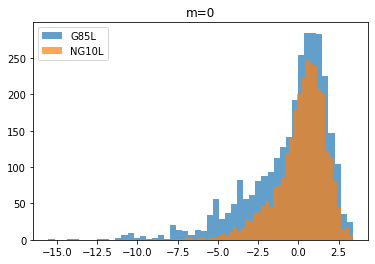

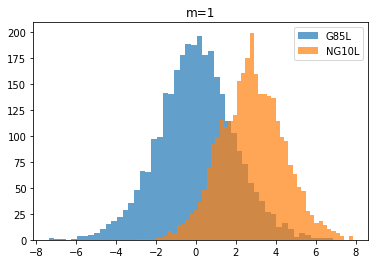

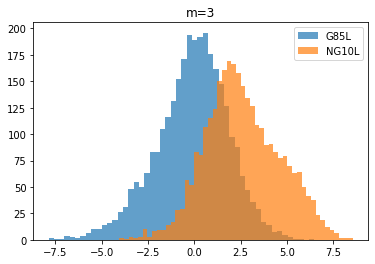

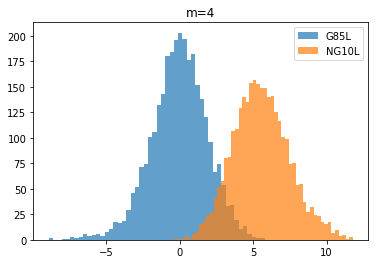

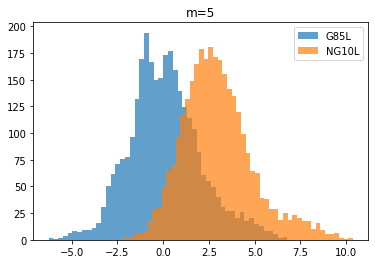

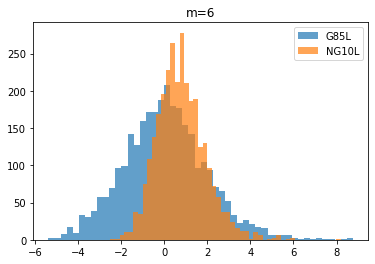

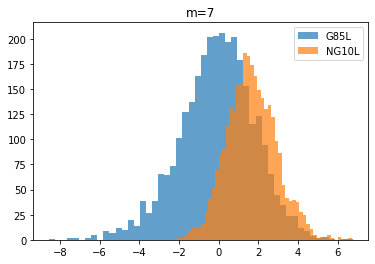

In [28]:
for i in range(len(sigListList)):
    plt.figure()
    plt.hist(sigListList2[i],bins=50,alpha=0.7);
    plt.hist(sigListList[i],bins=50,alpha=0.7);
    plt.title("m="+str(i));
    plt.legend(['G85L','NG10L'])

# Figures

In [50]:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.rcParams['legend.edgecolor'] = '0.0'
plt.rcParams['figure.figsize'] = 5,5
plt.rcParams.update({'figure.autolayout': True})
plt.rc('text', usetex=True)
green1='#238E68'
green2='#32CC99' 
green3='#76EEC6'
blue1='#00688B'
blue2='#0099CC'
blue3='#87CEEB'
orange1='#DD7500'
orange2='#FF9912'
orange3='#FFCC11'

fancy PI plots

In [164]:
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
#plt.colorbar(myplot, format=ticker.FuncFormatter(fmt))

cmap = plt.get_cmap('RdBu')
from matplotlib.colors import DivergingNorm

import matplotlib.ticker as Ticker

plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.rcParams['legend.edgecolor'] = '0.0'
plt.rcParams['figure.figsize'] = 5,5
plt.rcParams.update({'figure.autolayout': True})
plt.rc('text', usetex=True)
green1='#238E68'
green2='#32CC99' 
green3='#76EEC6'
blue1='#00688B'
blue2='#0099CC'
blue3='#87CEEB'
orange1='#DD7500'
orange2='#FF9912'
orange3='#FFCC11'

bound0=[4.068731271987472198e+00,1.000073587035288369e-02,4.054501460914203648e+01,1.450521143504064803e+01,4.083124526388738573e+00,4.080885704694327387e+01]
bound1=[6.164477891657571540e+00,1.000791759796726410e-02,4.147937293987362750e+01,1.368600392926488496e+01,6.204013848390993680e+00,4.190907270725423928e+01]
bound2=[6.931622134741500574e+00,1.002227440444158901e-02,4.5e+01,1.556381050588623793e+01,6.998311244307485524e+00,4.5e+01]

X0=np.linspace(0.9*bound0[0],1.1*bound0[2],40)
Y0=np.linspace(0,1.1*bound0[3],40)

X1=np.linspace(0.9*bound1[0],1.1*bound1[2],40)
Y1=np.linspace(0,1.1*bound1[3],40)

X2=np.linspace(0.9*bound2[0],1.1*bound2[2],40)
Y2=np.linspace(0,1.1*bound2[3],40)

import colorcet as cc

import cmasher as cmr
#cmap = cmr.redshift                   # CMasher
#cmap=cmr.iceburn
#cmap=cc.cm.bjy
cmap=cc.cm.CET_D8

In [322]:
plt.figure(figsize=[5,4])
GCR, NGCR, G83CR, GC, NGC, NG1C, G83C=loadHelp(6)
plt.title('$PI_0$, \\textsf{G87L}-\\textsf{G85L}');
#plt.pcolormesh(X1,Y1,np.reshape(np.mean(GC,axis=0),(40,40)));
#plt.colorbar();
#plt.figure()
#plt.pcolormesh(X1,Y1,np.reshape(np.mean(NGCR-GCR,axis=0),(40,40)));
#plt.figure()
#plt.pcolormesh(X1,Y1,np.reshape(np.mean(NGC,axis=0)-np.mean(GC,axis=0),(40,40)));
#plt.figure()
dat=np.reshape(np.mean(G83C,axis=0)-np.mean(GC,axis=0),(40,40))
norm = DivergingNorm(vmin=dat.min(), vcenter=0., vmax=dat.max())
plt.pcolormesh(X0,Y0,dat,norm=norm,cmap=cmap);
#plt.pcolormesh(X1,Y1,dat);
plt.xlabel('Birth (Mpc/h)');
plt.ylabel('Persistence (Mpc/h)')
plt.colorbar(format=Ticker.FuncFormatter(fmt));
plt.savefig('/Users/alex/BoxSync/Projects/LSS-NG/figures/LDTM_PI0_G87L.png')

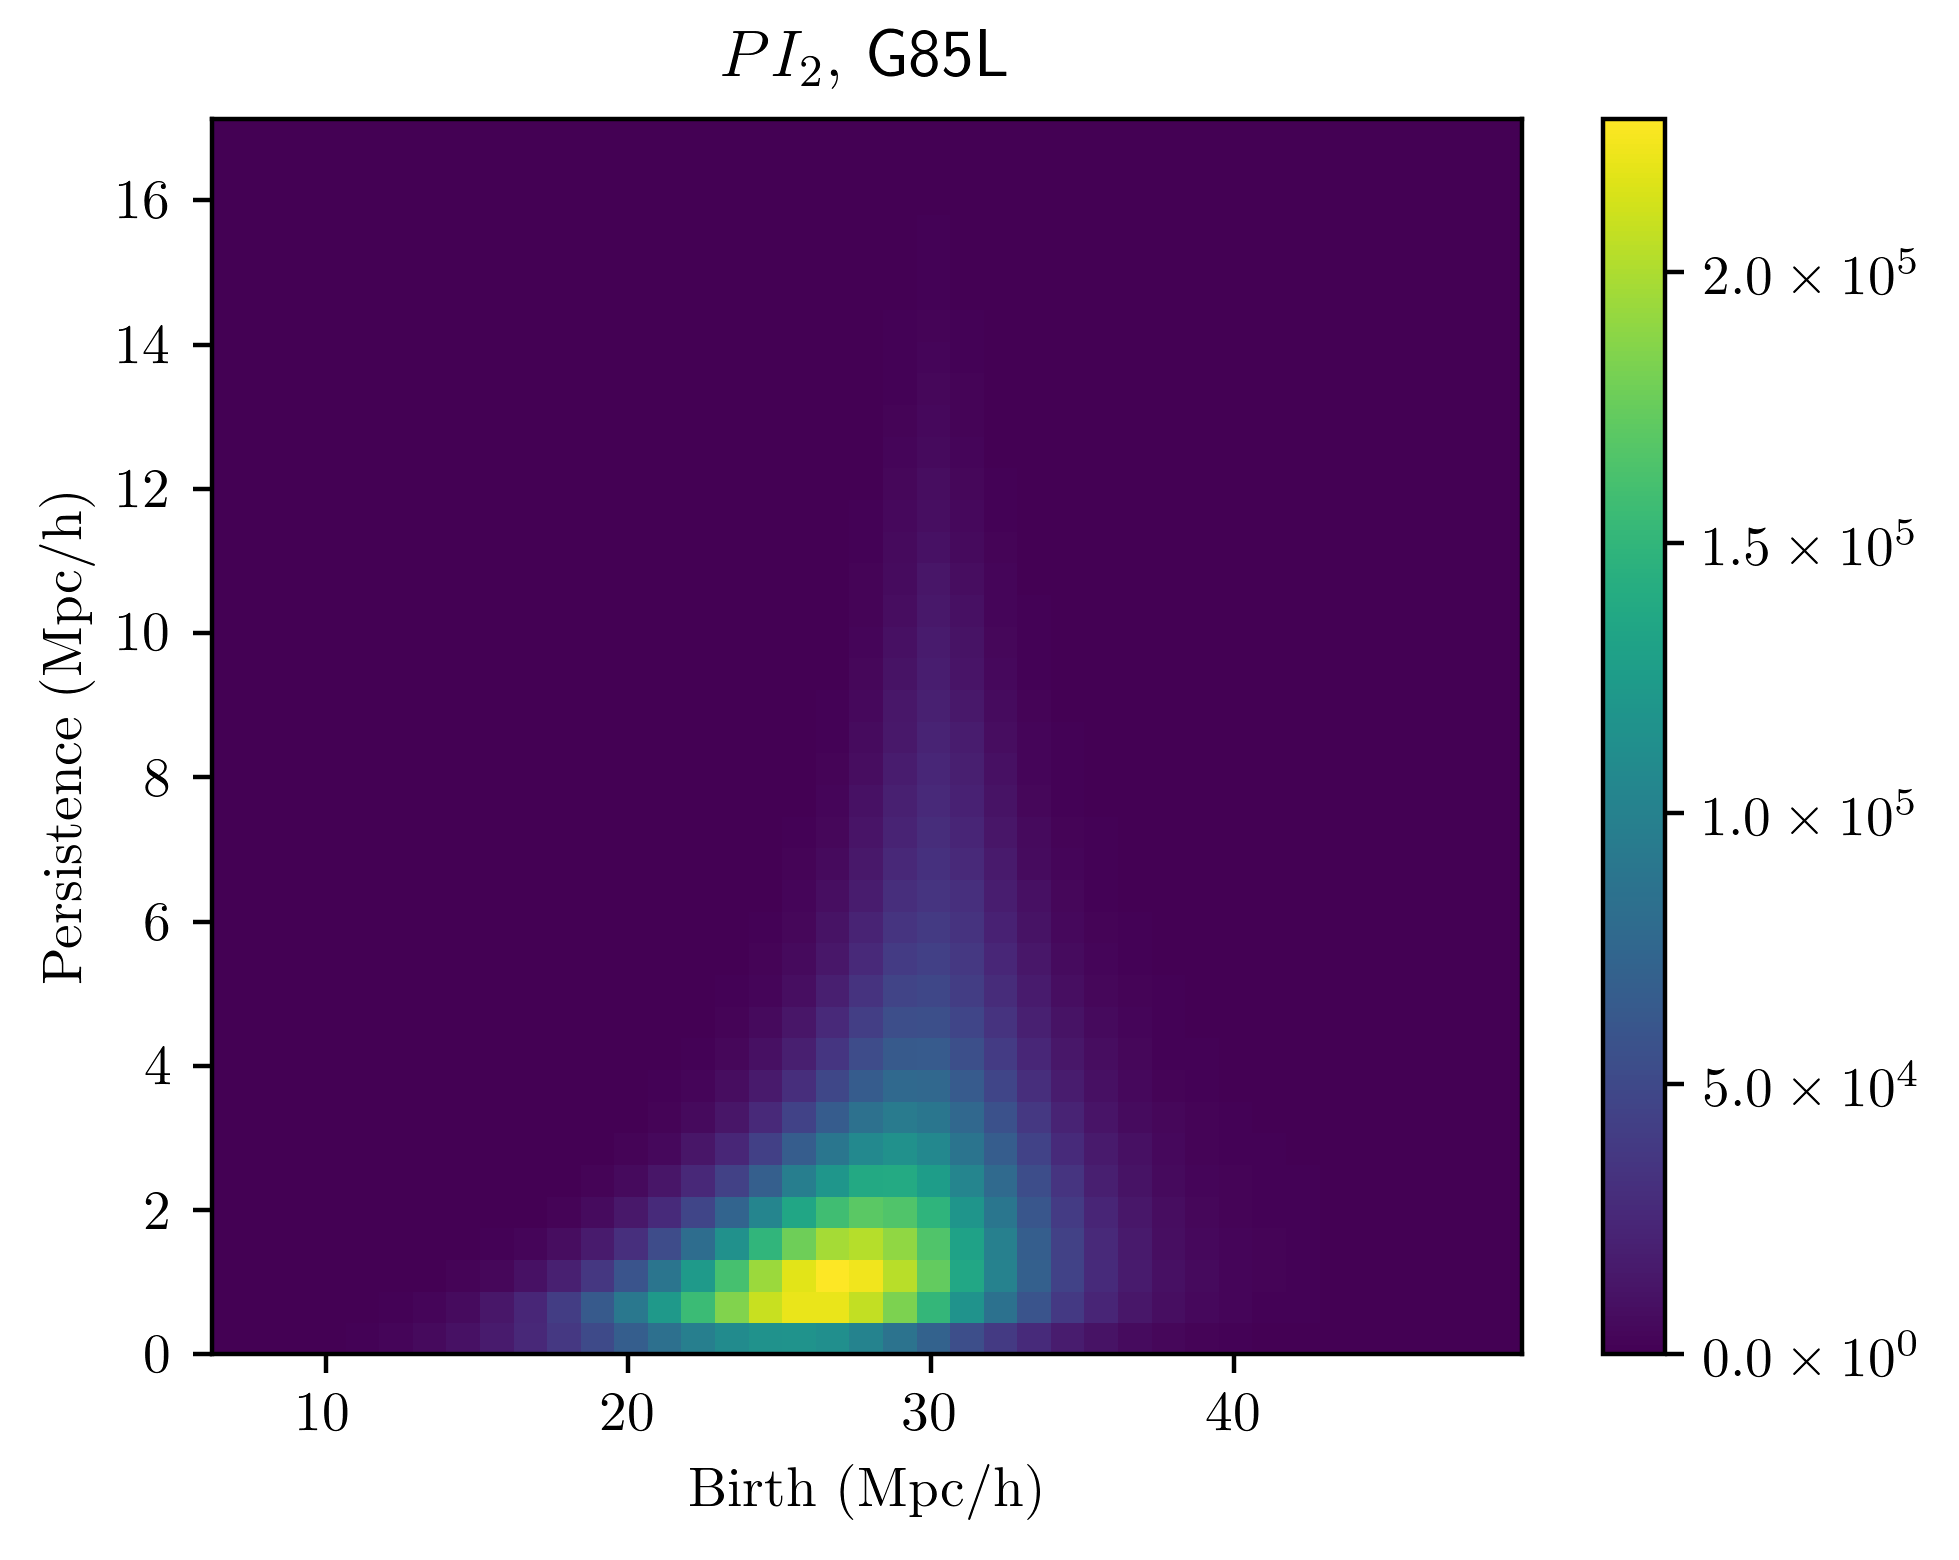

In [179]:
plt.figure(figsize=[5,4])
GCR, NGCR, G83CR, GC, NGC, NG1C, G83C=loadHelp(8)
plt.title('$PI_2$, \\textsf{G85L}');
#plt.pcolormesh(X1,Y1,np.reshape(np.mean(GC,axis=0),(40,40)));
#plt.colorbar();
#plt.figure()
#plt.pcolormesh(X1,Y1,np.reshape(np.mean(NGCR-GCR,axis=0),(40,40)));
#plt.figure()
#plt.pcolormesh(X1,Y1,np.reshape(np.mean(NGC,axis=0)-np.mean(GC,axis=0),(40,40)));
#plt.figure()
dat=np.reshape(np.mean(GC,axis=0),(40,40))
#norm = DivergingNorm(vmin=dat.min(), vcenter=0., vmax=dat.max())
plt.pcolormesh(X2,Y2,dat);
#plt.pcolormesh(X1,Y1,dat);
plt.xlabel('Birth (Mpc/h)');
plt.ylabel('Persistence (Mpc/h)')
plt.colorbar(format=Ticker.FuncFormatter(fmt));
plt.savefig('/Users/alex/BoxSync/Projects/LSS-NG/figures/LDTM_PI2_G85L.png')

fancy histograms

In [132]:
#sigListList=np.loadtxt('sigListList.gz');
#sigListList2=np.loadtxt('sigListList2.gz');

In [91]:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.rcParams['legend.edgecolor'] = '0.0'
plt.rcParams['figure.figsize'] = 6,5
plt.rcParams.update({'figure.autolayout': True})
plt.rc('text', usetex=True)
green1='#238E68'
green2='#32CC99' 
green3='#76EEC6'
blue1='#00688B'
blue2='#0099CC'
blue3='#87CEEB'
orange1='#DD7500'
orange2='#FF9912'
orange3='#FFCC11'

In [211]:
dListList=np.sqrt(dListList)/np.sqrt(500)
dListList2=np.sqrt(dListList2)/np.sqrt(500)

In [236]:
anom=[]
for i in range(len(dListList)):
    #print('m='+str(i))
    thresh=np.percentile(dListList2[i],95.0)
    anom.append(np.sum(np.array(dListList[i])>thresh)/len(dListList[i]))
    #print((np.sum(np.array(dListList2[i])>thresh)/len(dListList2[i]),np.sum(np.array(dListList[i])>thresh)/len(dListList[i])))
perc68=[]
perc95=[]
perc997=[]
for i in range(len(dListList)):
    #print('m='+str(i))
    perc68.append(np.percentile(dListList2[i],68.0))
    perc95.append(np.percentile(dListList2[i],95.0))
    perc997.append(np.percentile(dListList2[i],99.7))
    #anom.append(np.sum(np.array(dListList[i])>thresh)/len(dListList[i]))

In [216]:
anom

[0.11888111888111888,
 0.4622044622044622,
 0.08391608391608392,
 0.12054612054612054,
 0.6253746253746254,
 0.18215118215118214,
 0.0,
 0.020313020313020312,
 0.06660006660006661,
 0.18414918414918416,
 0.614052614052614,
 0.19547119547119546]

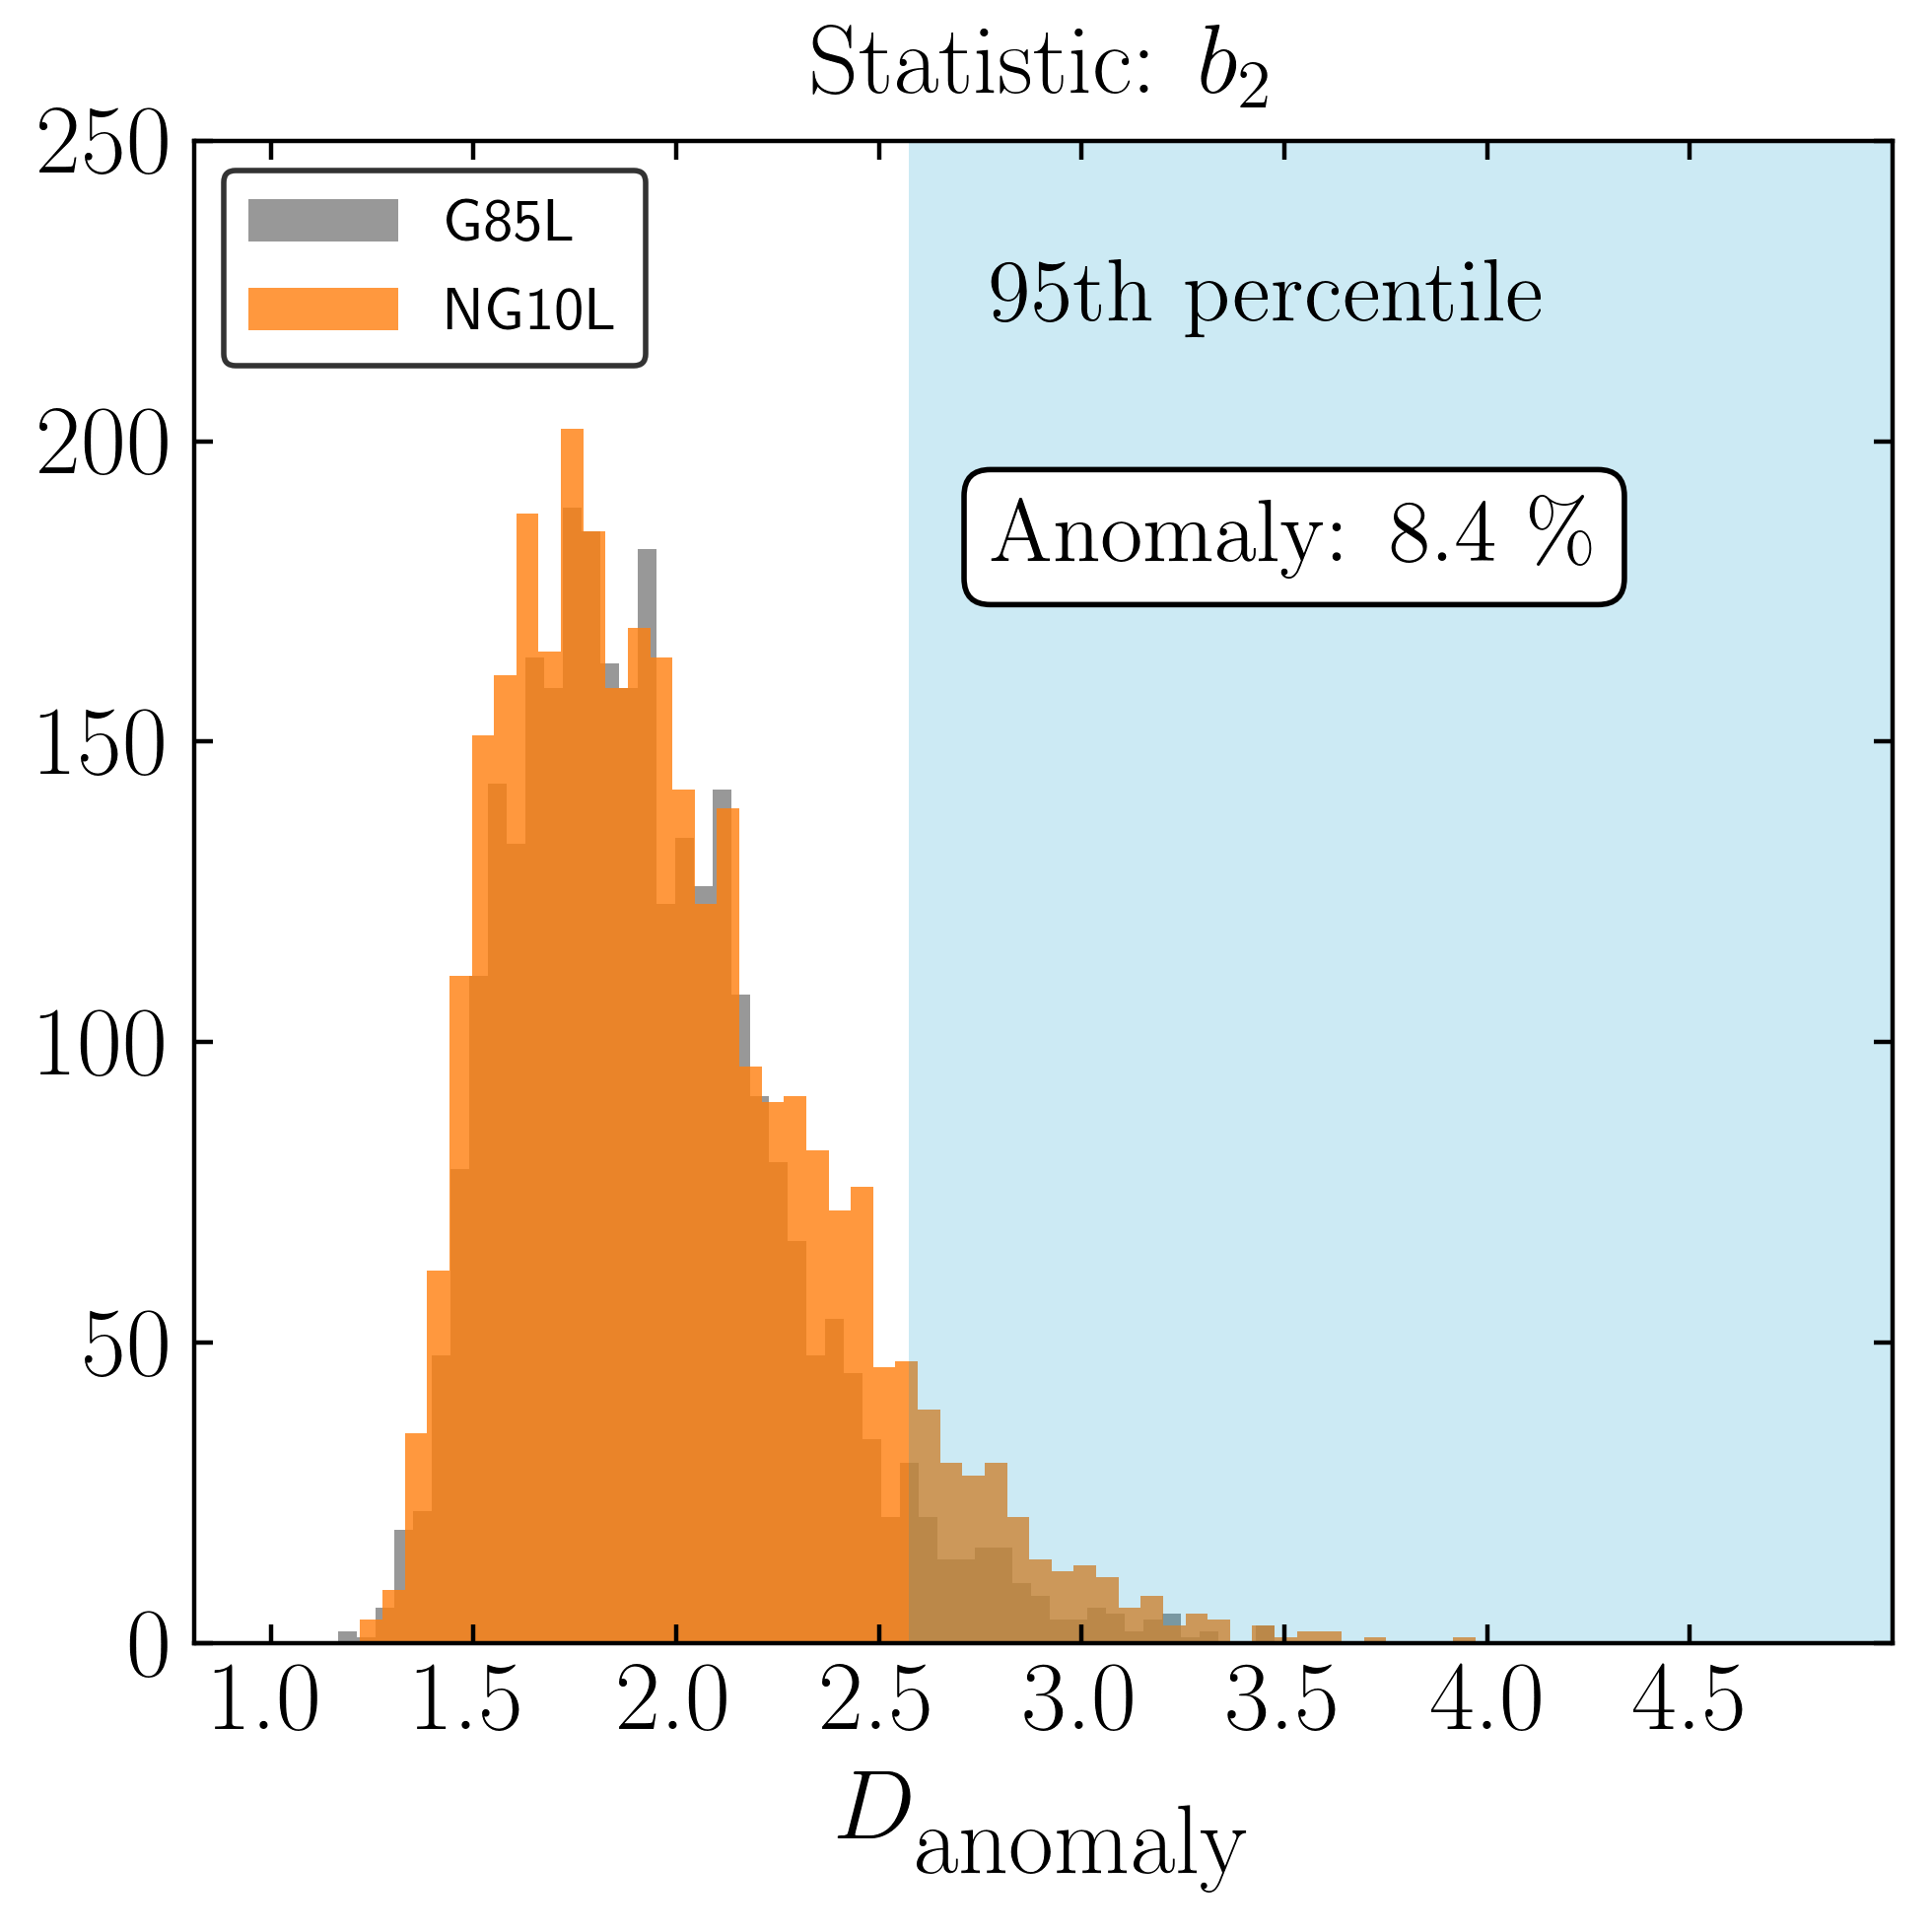

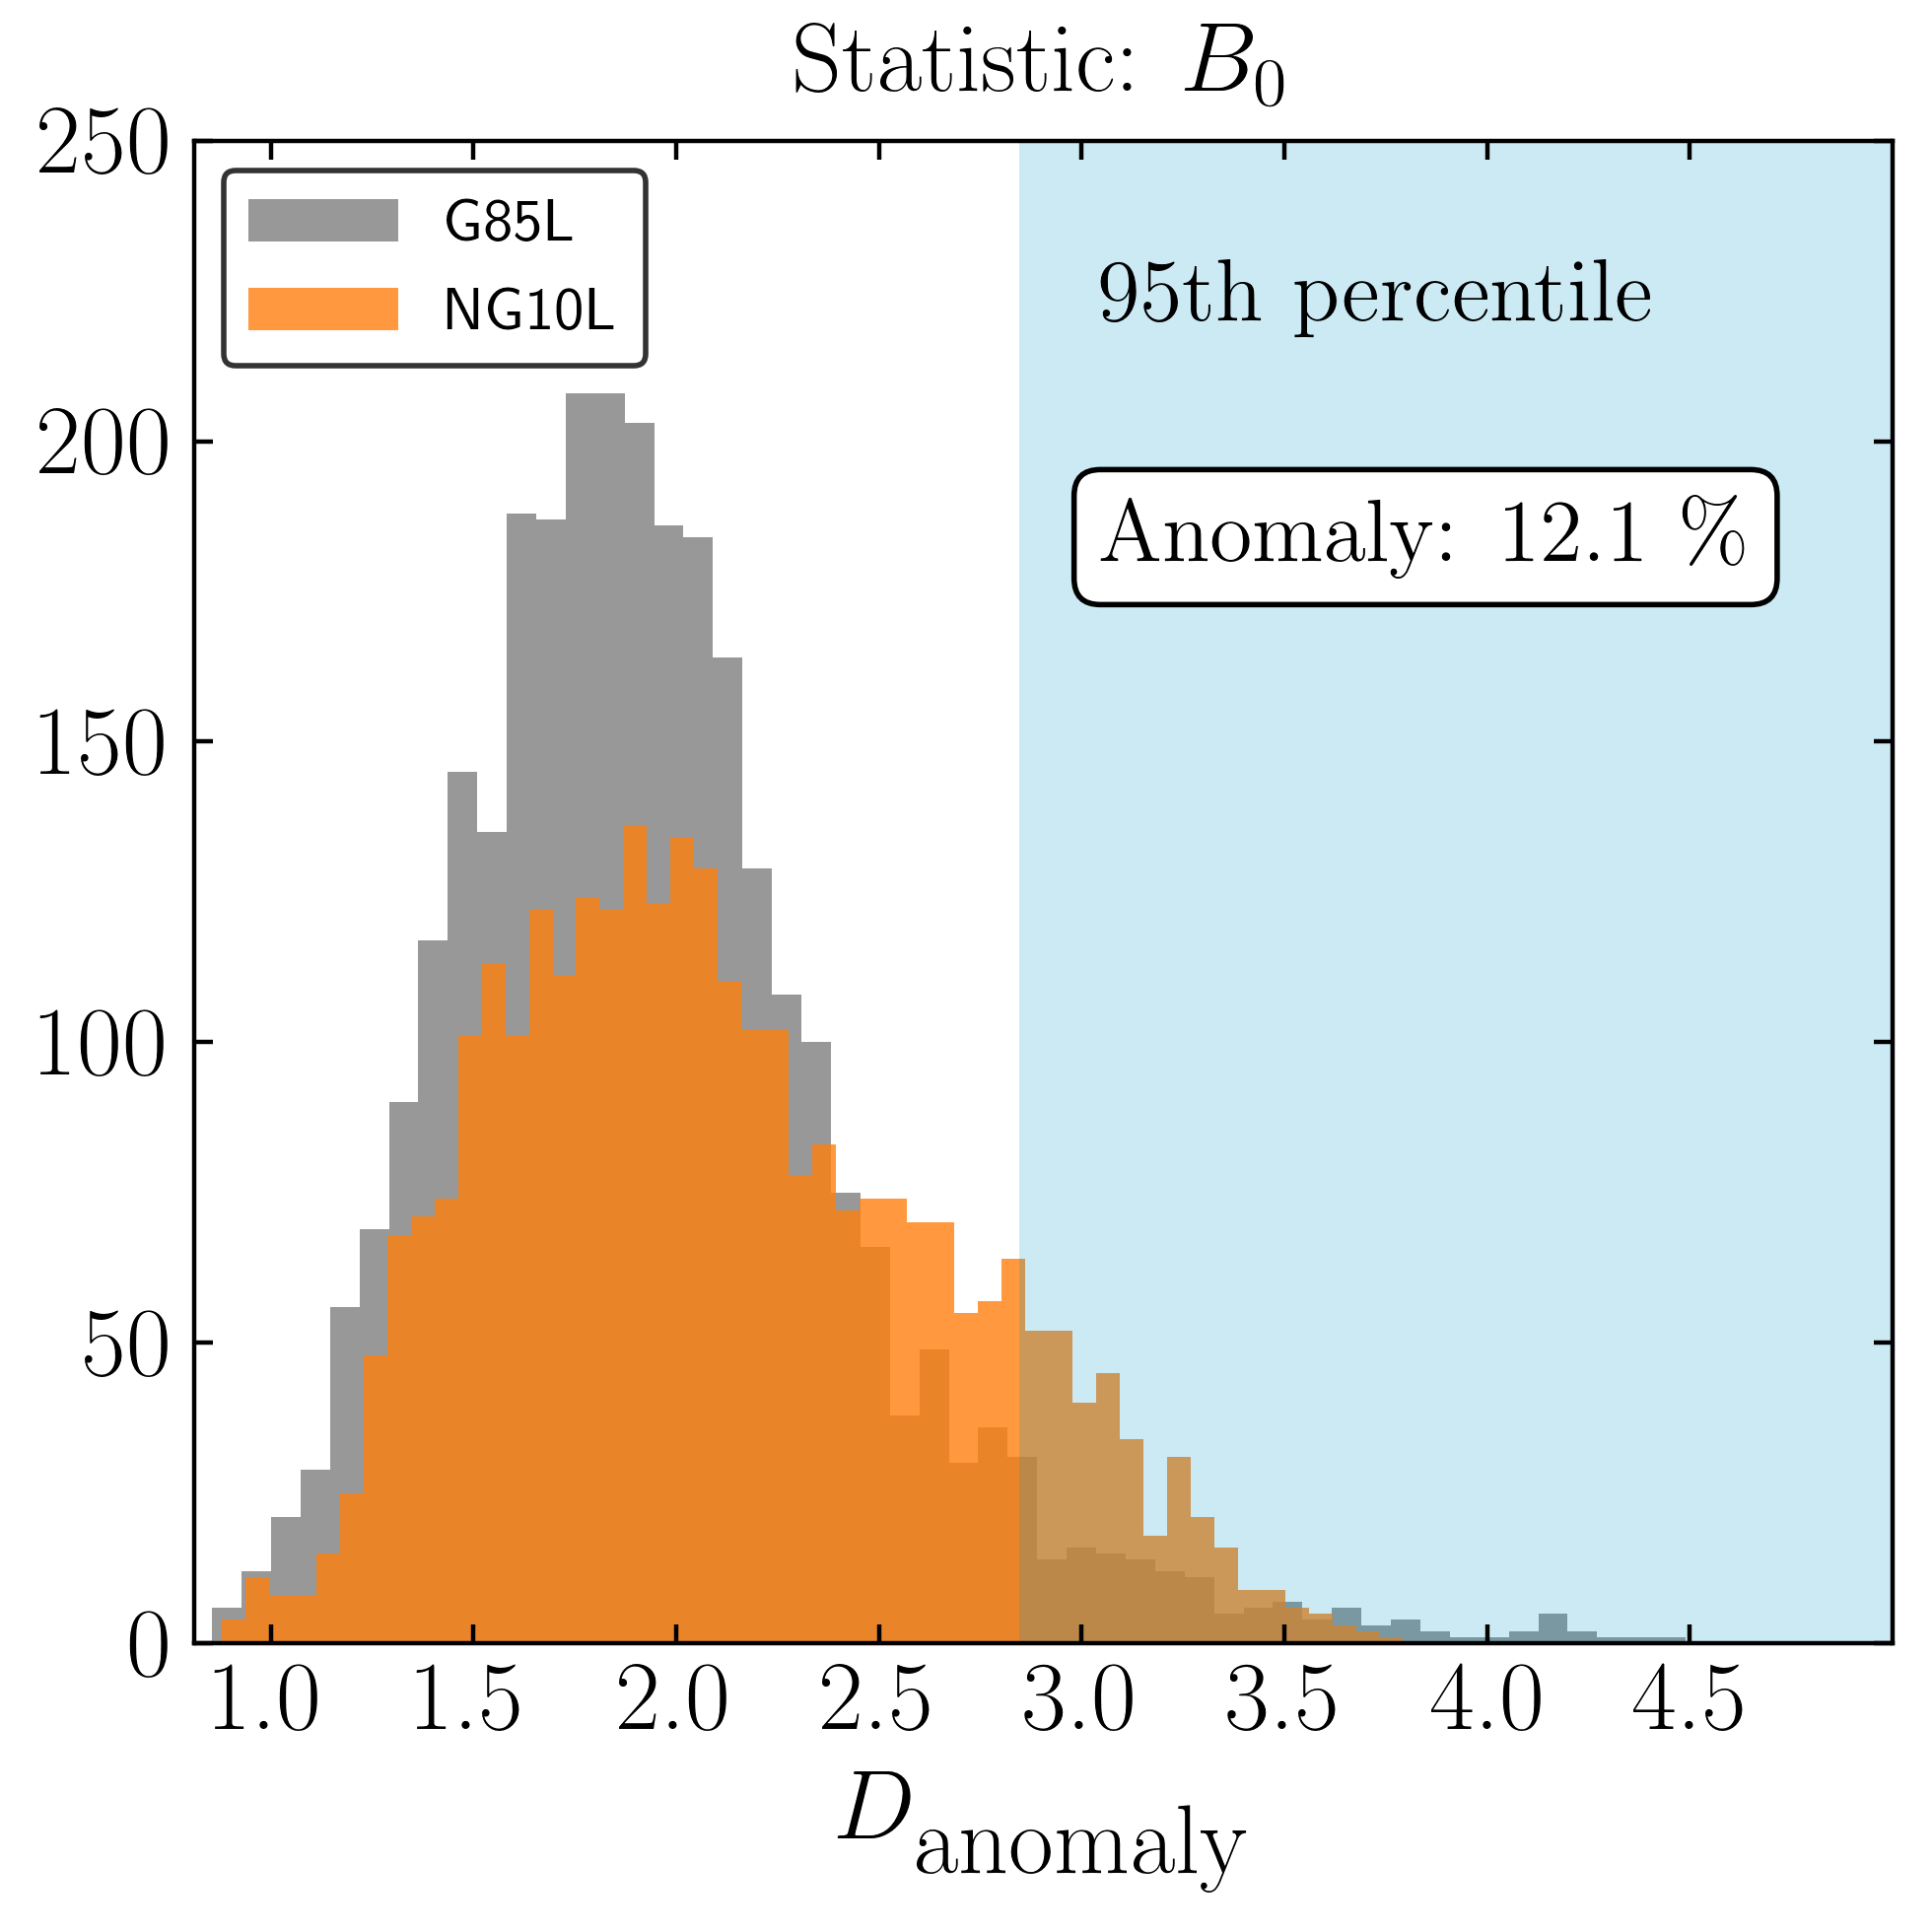

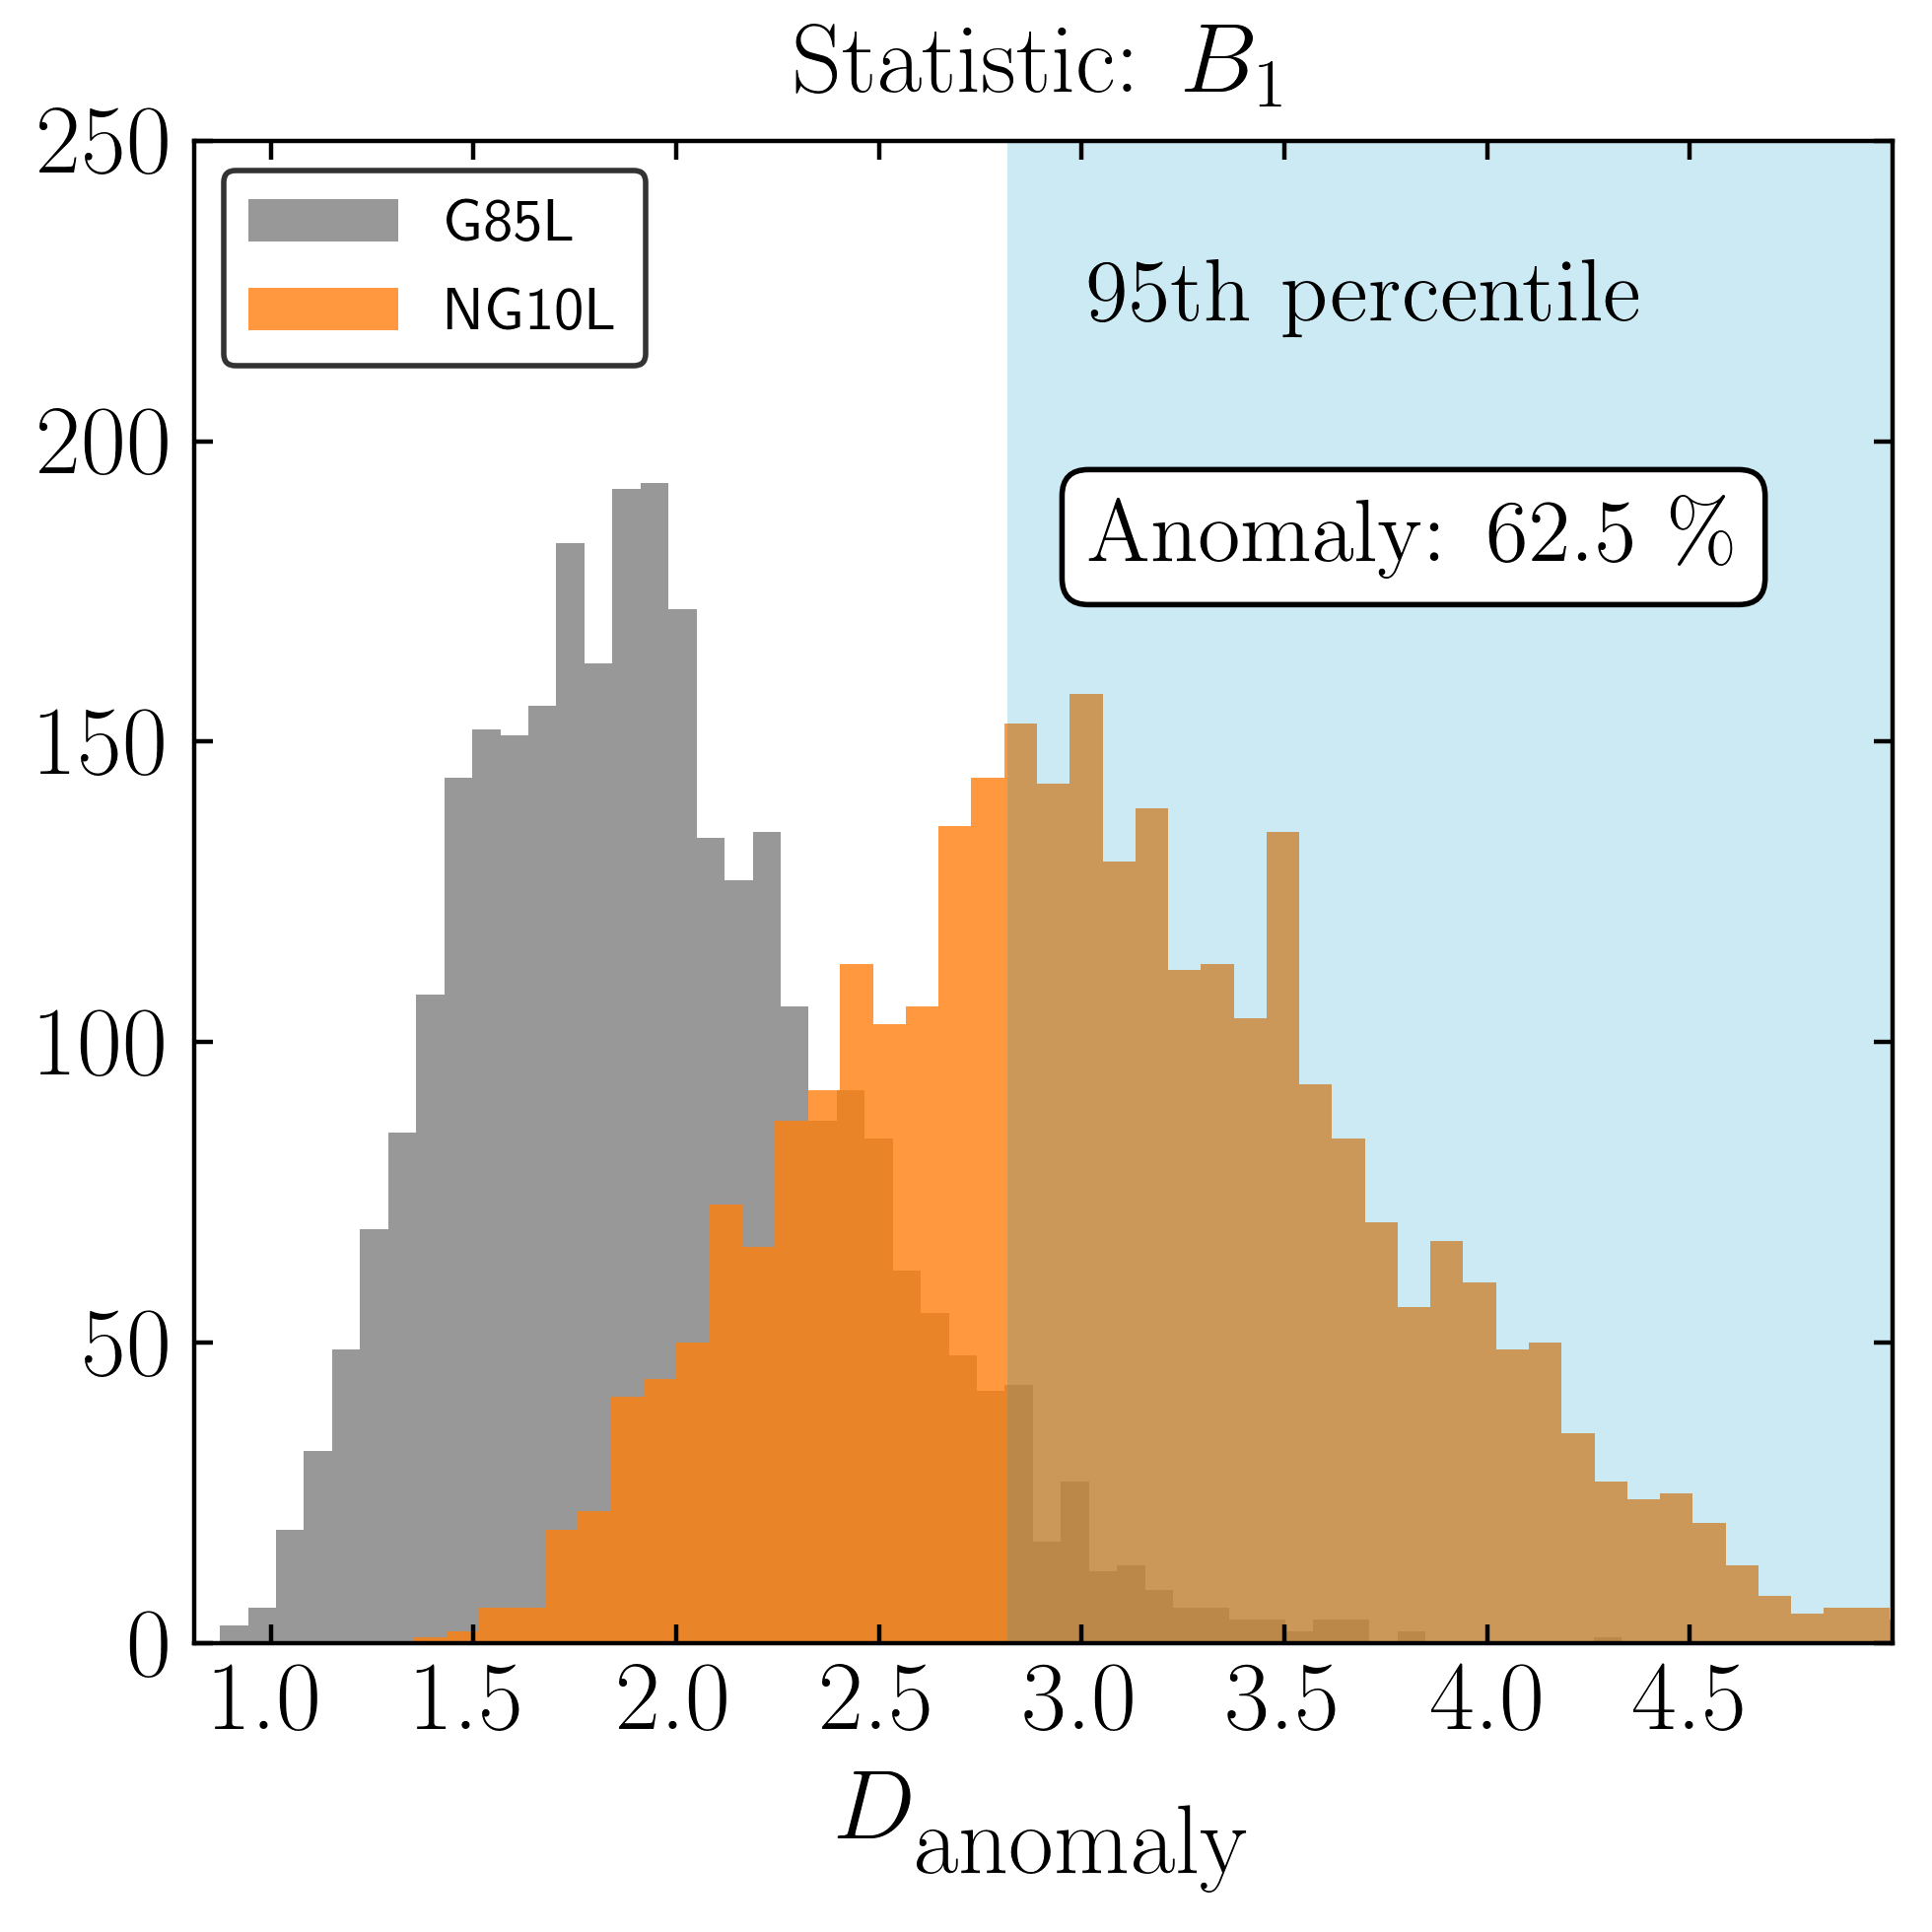

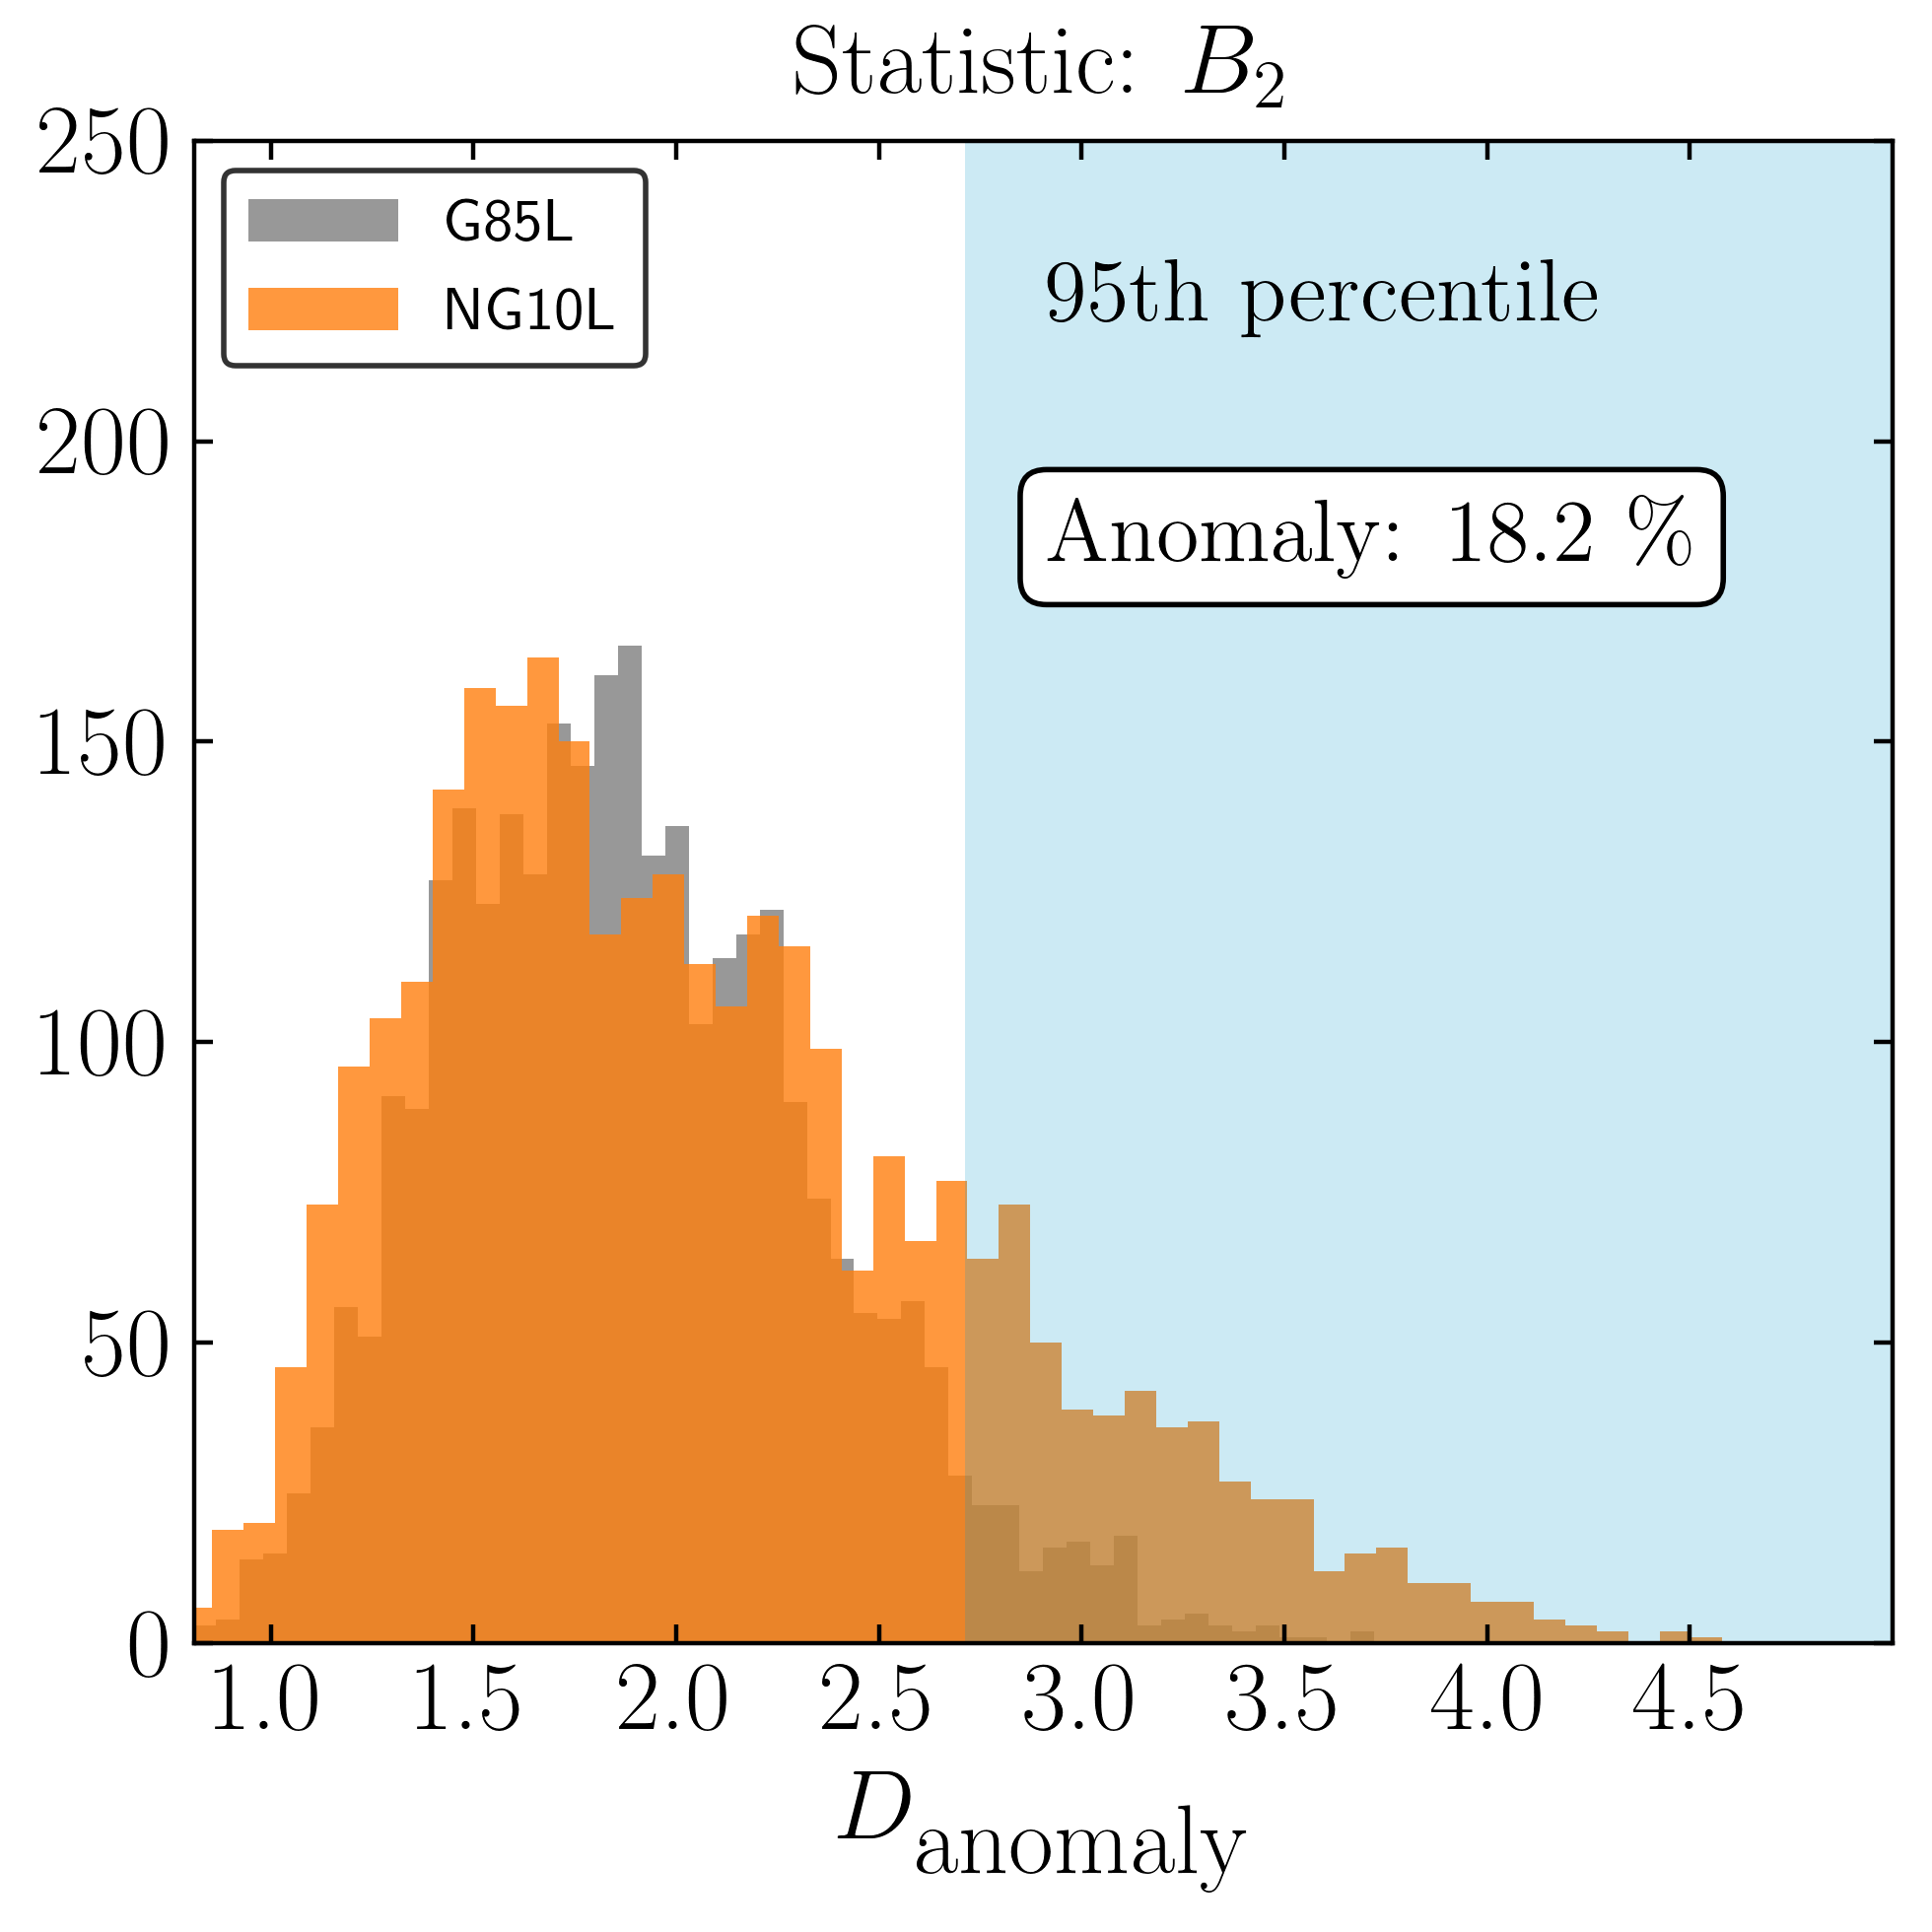

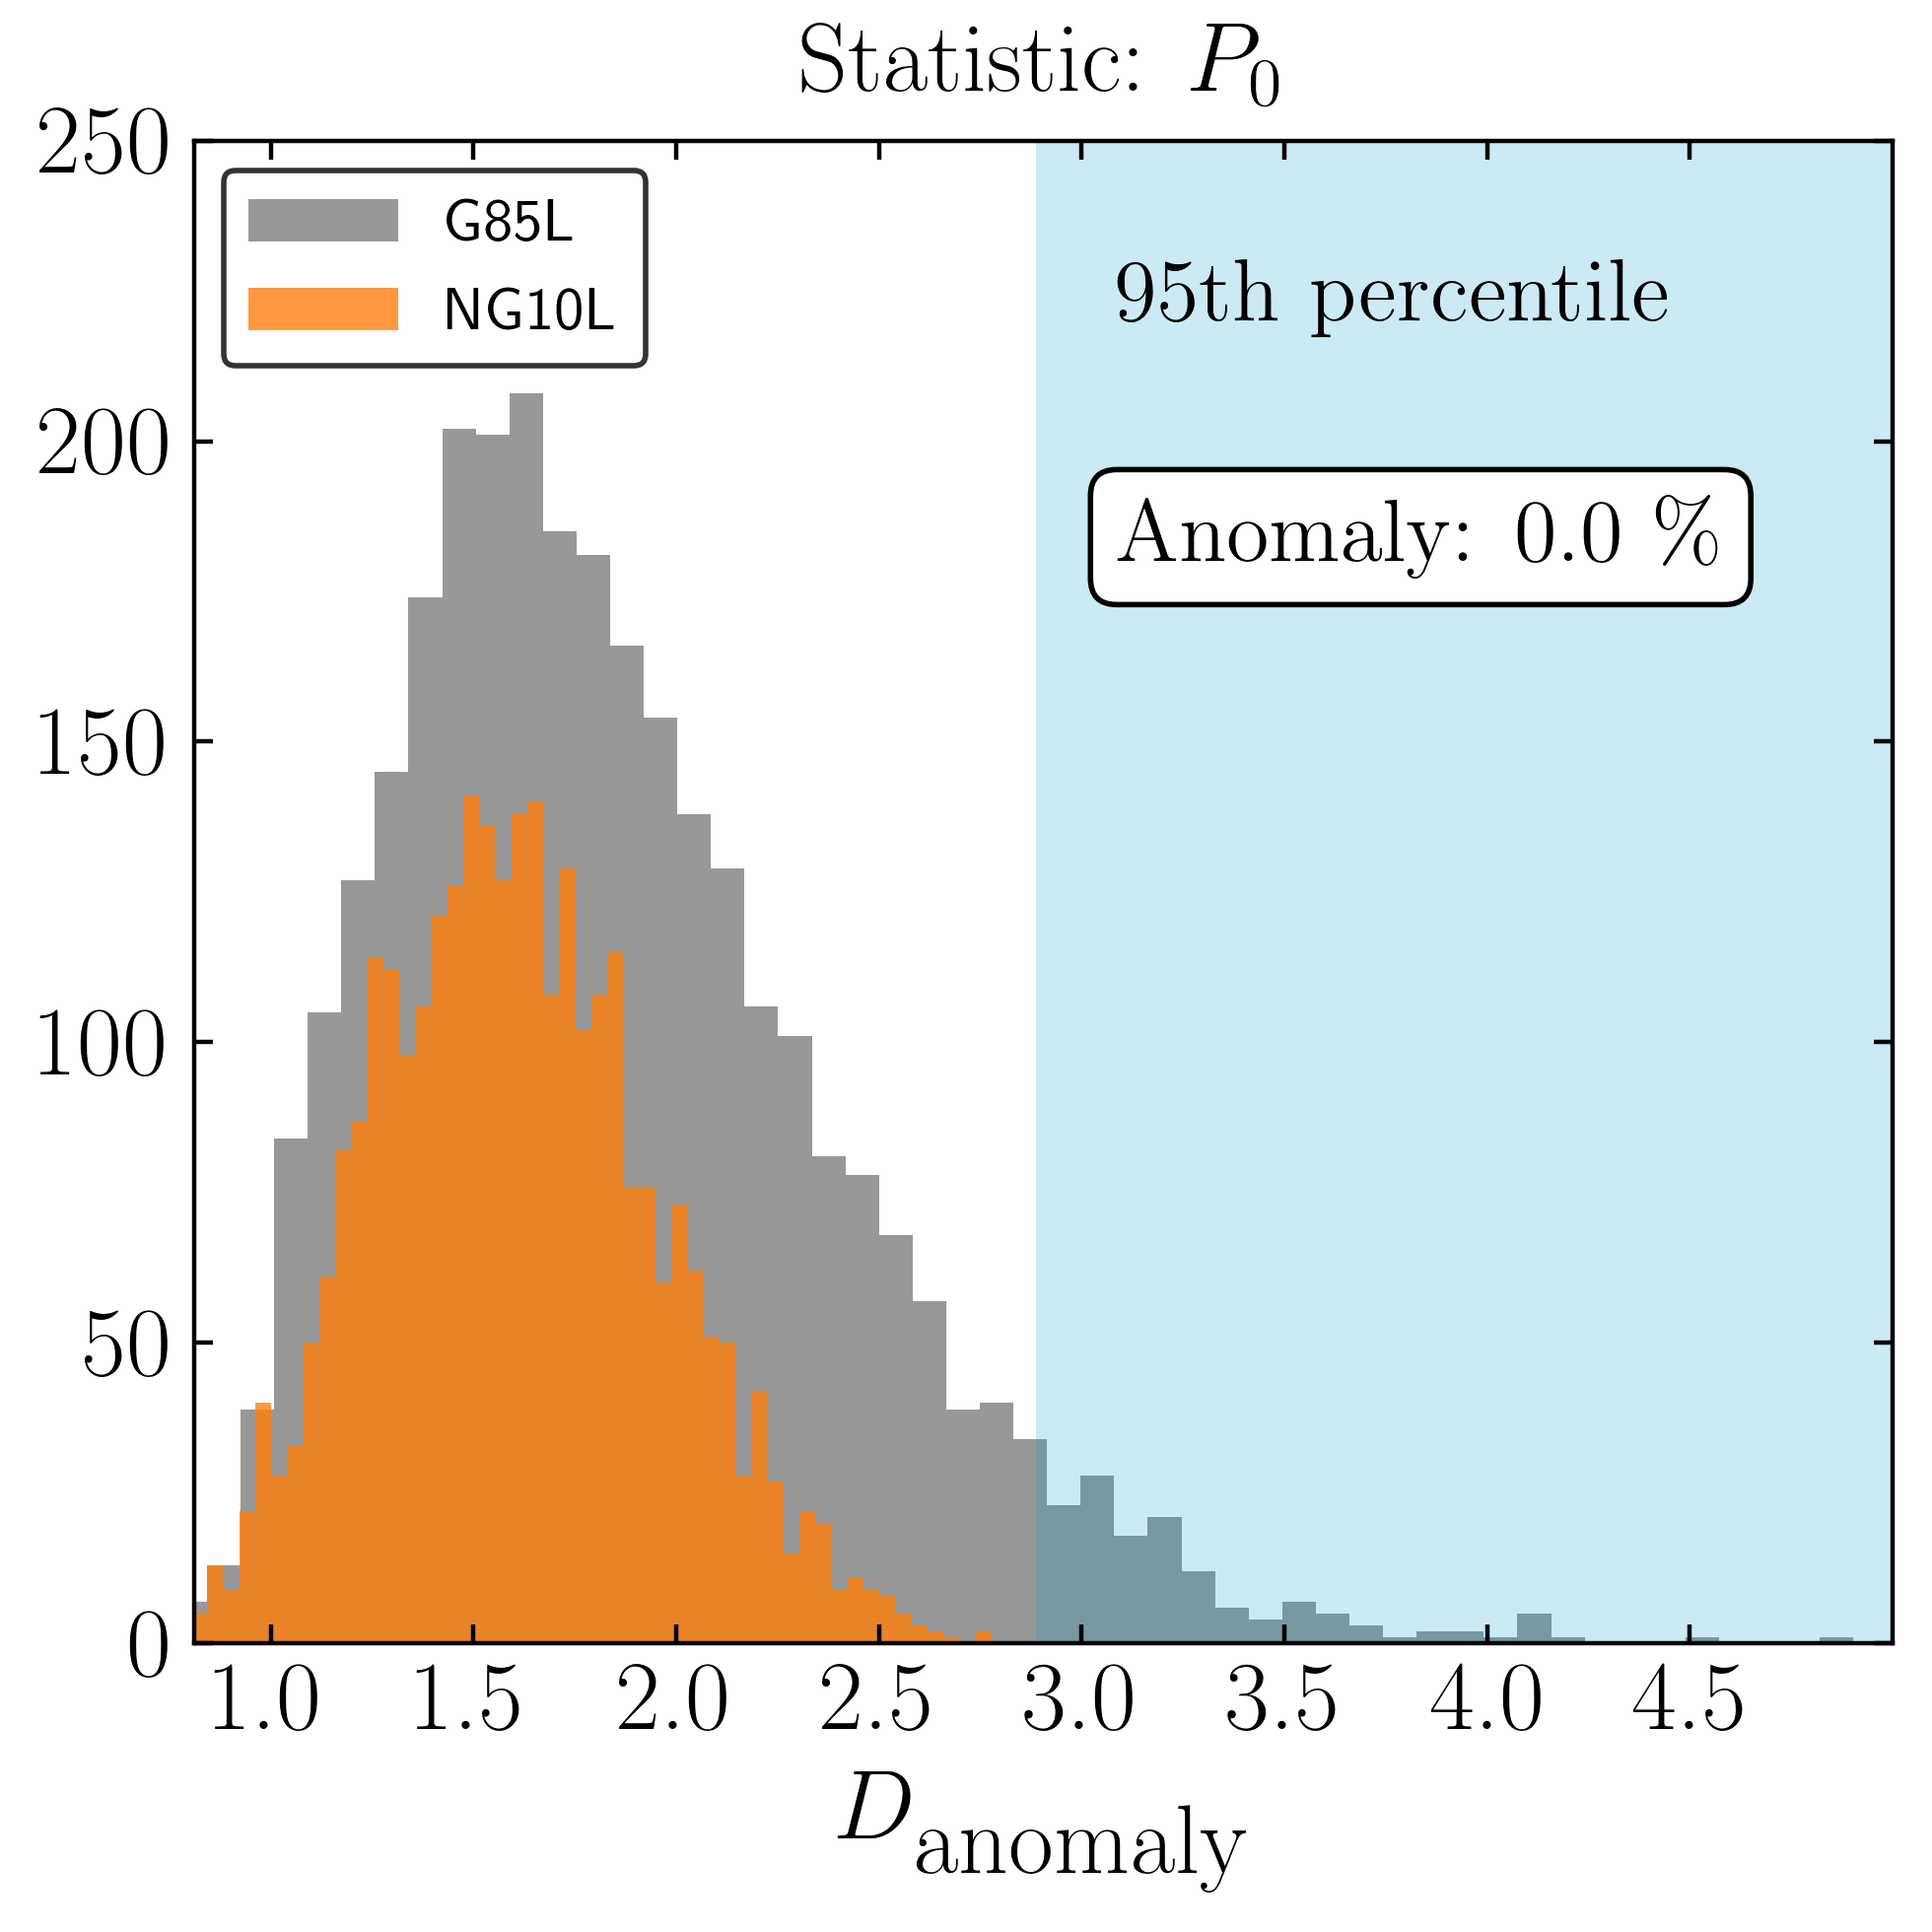

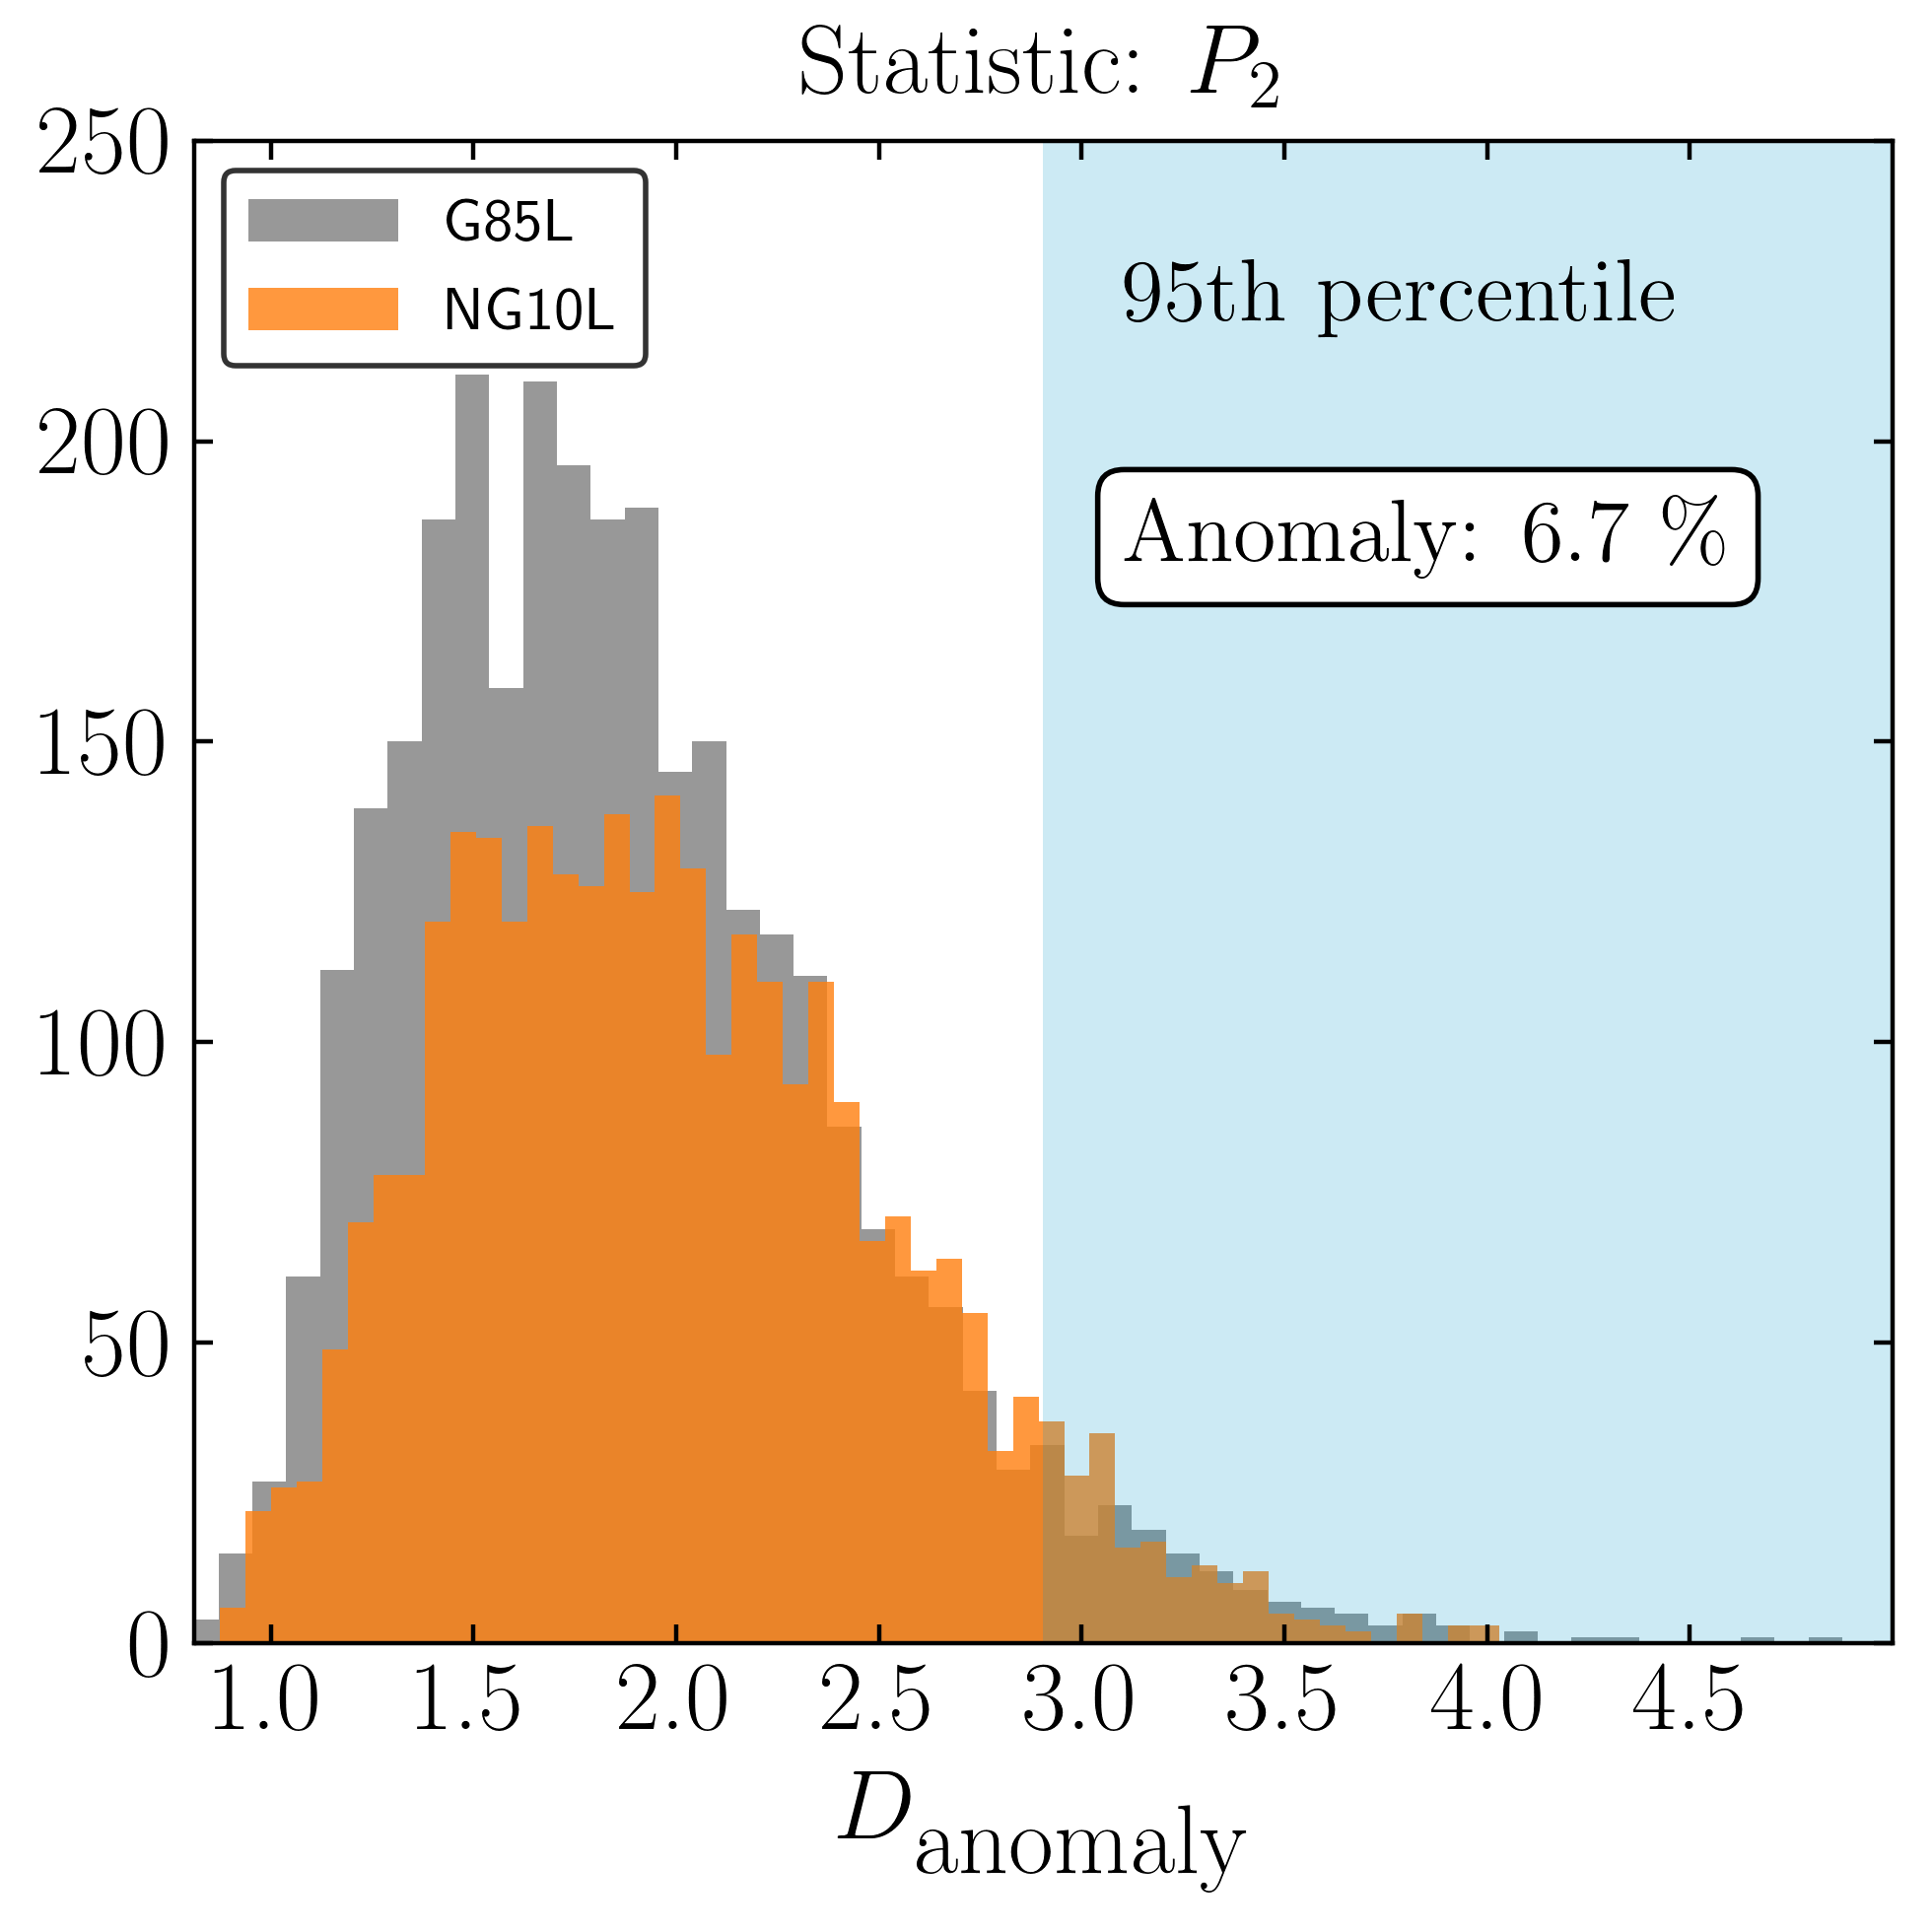

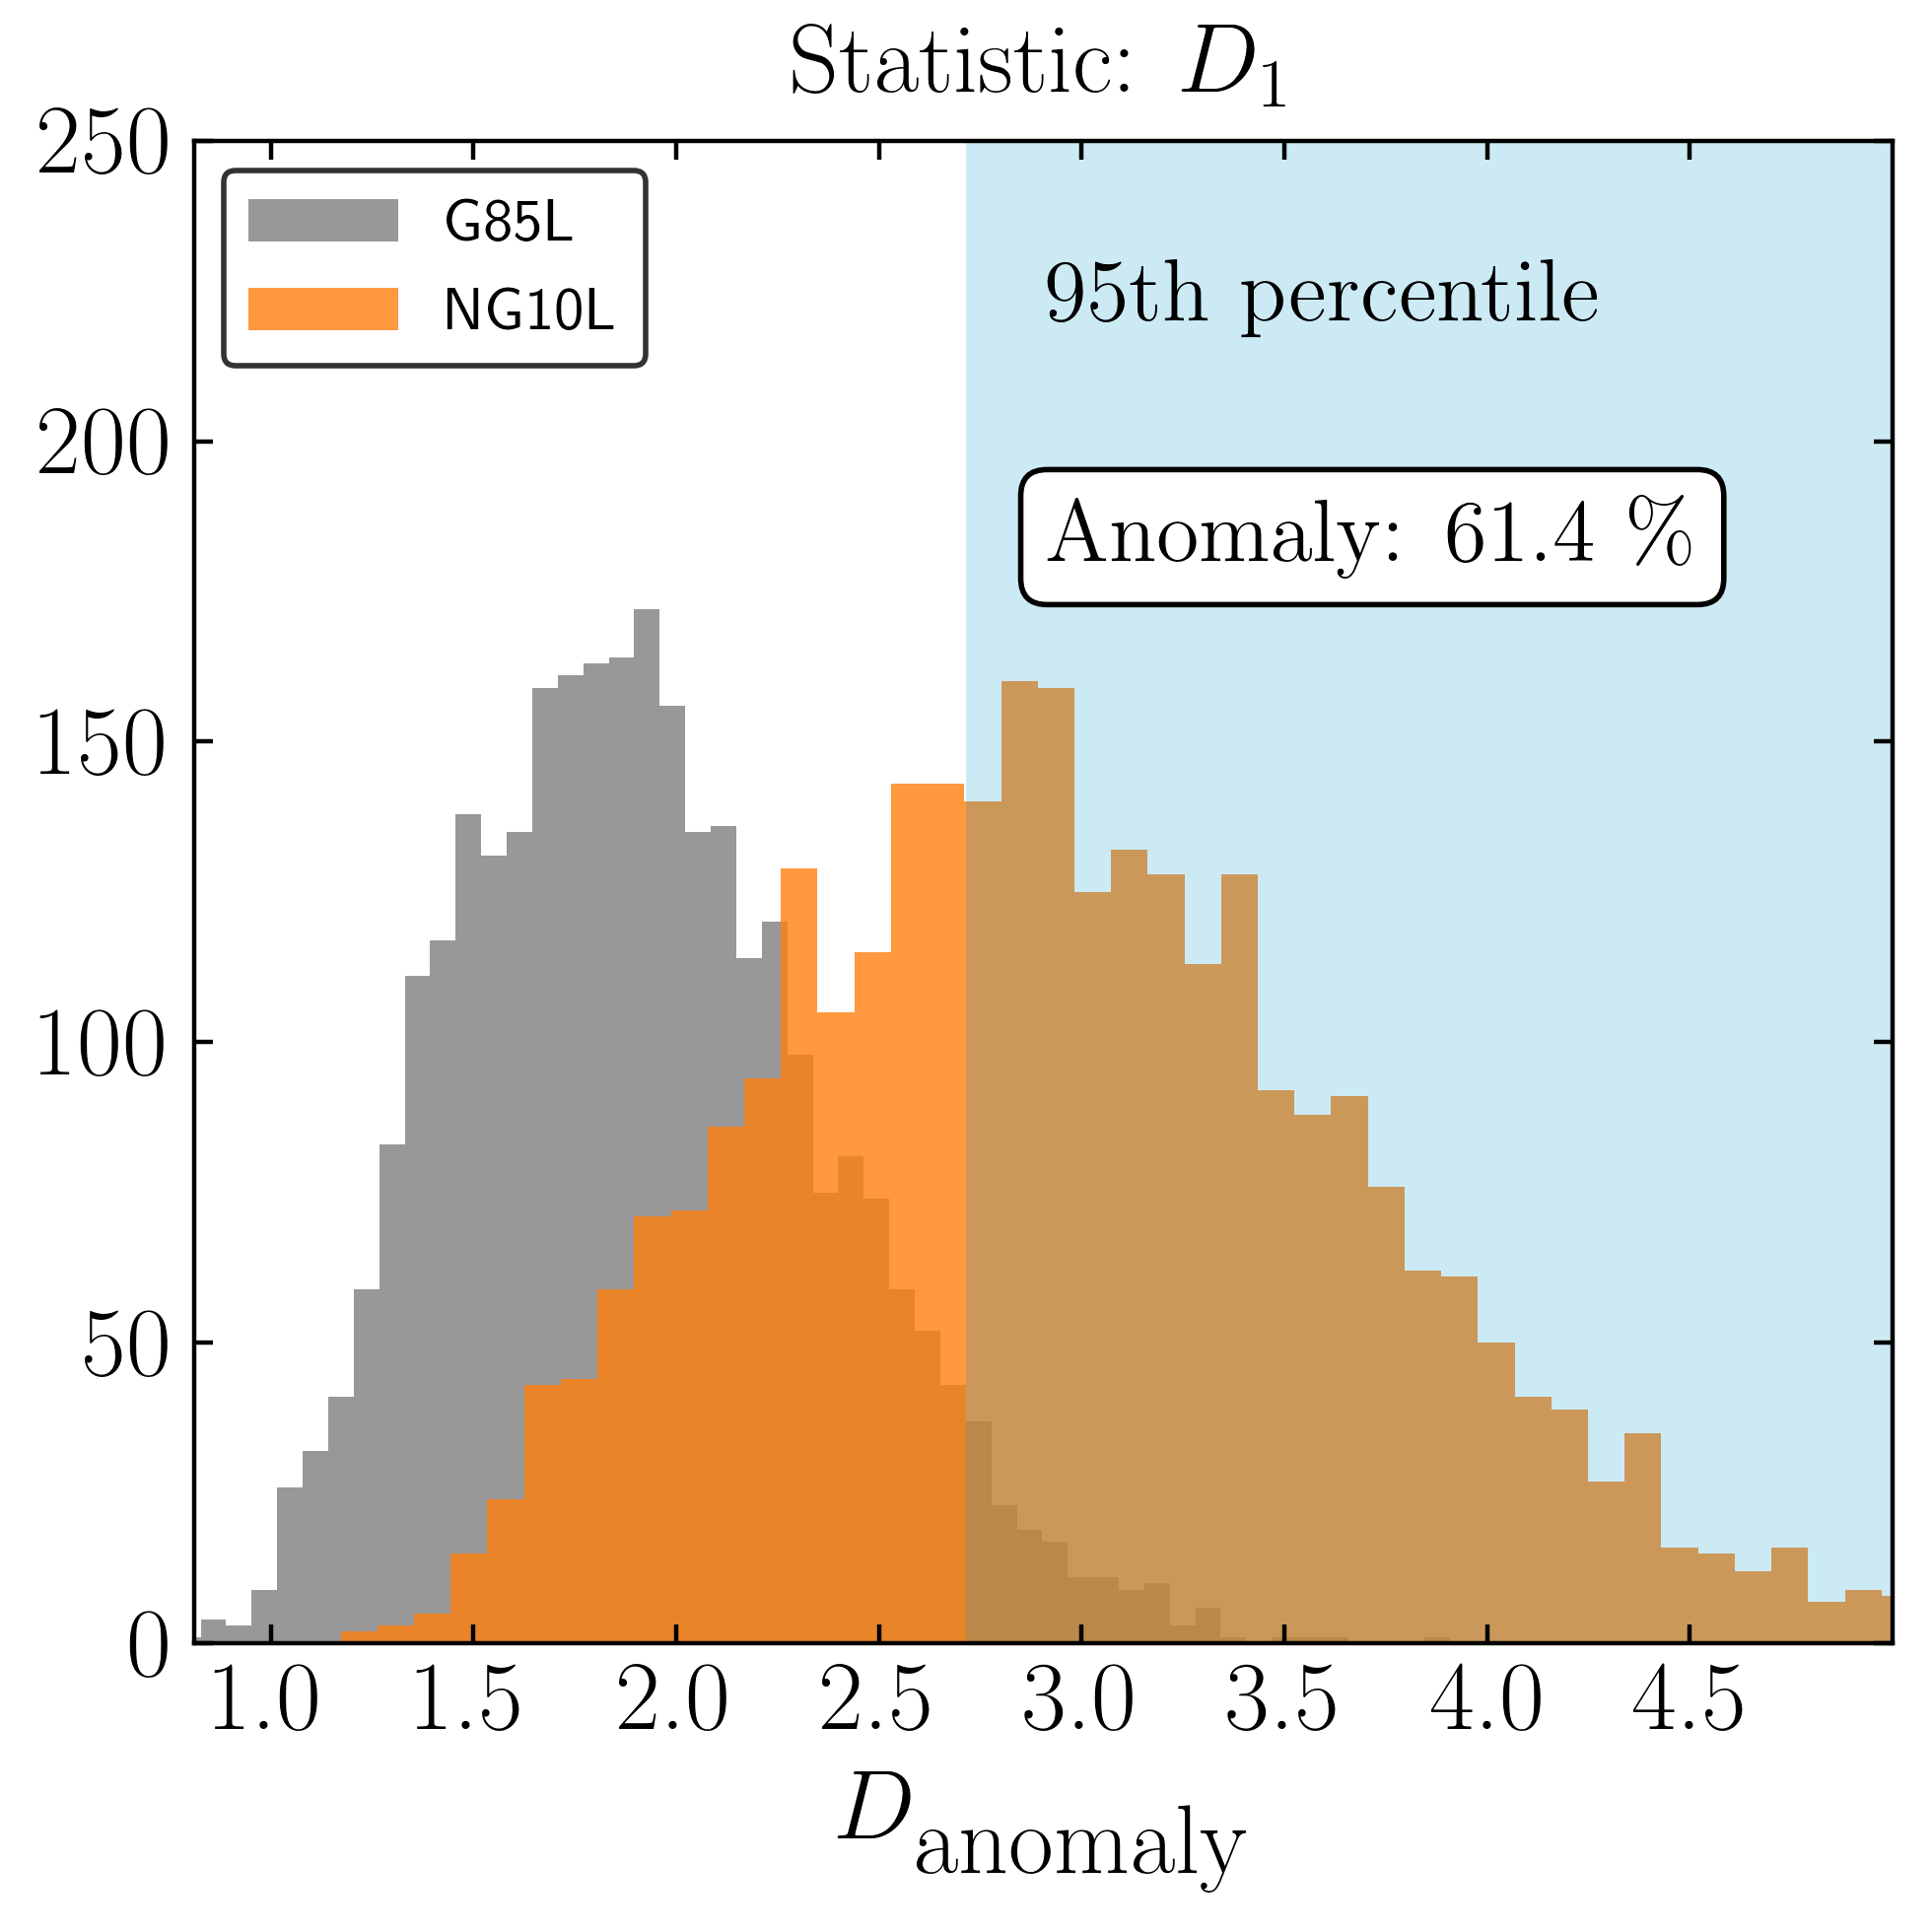

In [237]:
curve = ['$b_0$','$b_1$','$b_2$','$B_0$','$B_1$','$B_2$','$P_0$','$P_1$','$P_2$','$D_0$','$D_1$','$D_2$']
xtic=[1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5]
xlab=['1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5']
for i in range(12):
    plt.figure()
    if i >= 0:
        plt.hist(dListList2[i],bins=50,alpha=0.8,label='\\textsf{G85L}', histtype='stepfilled',color='C7')
        plt.hist(dListList[i],bins=50,alpha=0.8,label='\\textsf{NG10L}', histtype='stepfilled', color='C1' )
        plt.legend(fontsize=11,handlelength=2.5,loc='upper left')
    #else:
    #    plt.hist(dListList2[i],bins=50,alpha=0.8, histtype='stepfilled',color='C7')
    #    plt.hist(dListList[i],bins=50,alpha=0.8, histtype='stepfilled', color='C1' )        
    plt.xlabel('$D_{\\textrm{anomaly}}$',fontsize=18)
    #plt.axvspan(perc68[i],perc95[i],alpha=0.2,color=green3,lw=0)
    plt.axvspan(perc95[i],5.1,alpha=0.2,color=blue2,lw=0)
    #plt.axvspan(perc997[i],16,alpha=0.2,color=green1,lw=0)
    plt.xlim([0.81,5])
    plt.ylim([0,250])
    plt.xticks(xtic,xlab)
    props = dict(boxstyle='round', facecolor='white')
# place a text box in upper left in axes coords
    plt.text(perc95[i]+0.2,220,'95th percentile',fontsize=16)
    plt.text(perc95[i]+0.2,180,'Anomaly: %.1f %s'%(anom[i]*100,'$\%$'),fontsize=16, bbox=props)
    plt.tick_params(direction='in',which='both', top = True, right = True, labelsize=18)
    plt.title('Statistic: %s'%curve[i],fontsize=18)
    plt.savefig('/Users/alex/BoxSync/Projects/LSS-NG/figures/z1LDTManomaly_%s.pdf'%i)

In [258]:
#thresh=3.5
anom=[]
per=97.5
for i in range(len(sigListList2)):
    #print("m="+str(i))
    thresh=np.percentile(sigListList2[i],per)
    anom.append(np.sum((np.array(sigListList[i]))>=thresh)/len(sigListList[i]))
    #print((np.sum((np.array(sigListList2[i]))>=thresh)/len(sigListList[i]),np.sum((np.array(sigListList[i]))>=thresh)/len(sigListList[i])))
perc68=[]
perc95=[]
perc997=[]
for i in range(len(sigListList)):
    #print('m='+str(i))
    perc68.append(np.percentile(sigListList2[i],68.0))
    perc95.append(np.percentile(sigListList2[i],97.5))
    perc997.append(np.percentile(sigListList2[i],99.7))
    #anom.append(np.sum(np.array(dListList[i])>thresh)/len(dListList[i]))

In [253]:
perc95

[2.521193322758578,
 3.6472666526732027,
 4.168905172334252,
 3.430168022996064,
 3.5792838851263933,
 4.679660480767758,
 4.326088087591384,
 3.5127047004962013,
 3.910122397810343,
 3.325346645056835,
 3.6294238356732538,
 4.4673167989927896]

In [135]:
pwd

'/Users/alex/Documents/2Gpc/cartesiusFiles/PI/LDTM15/z1'

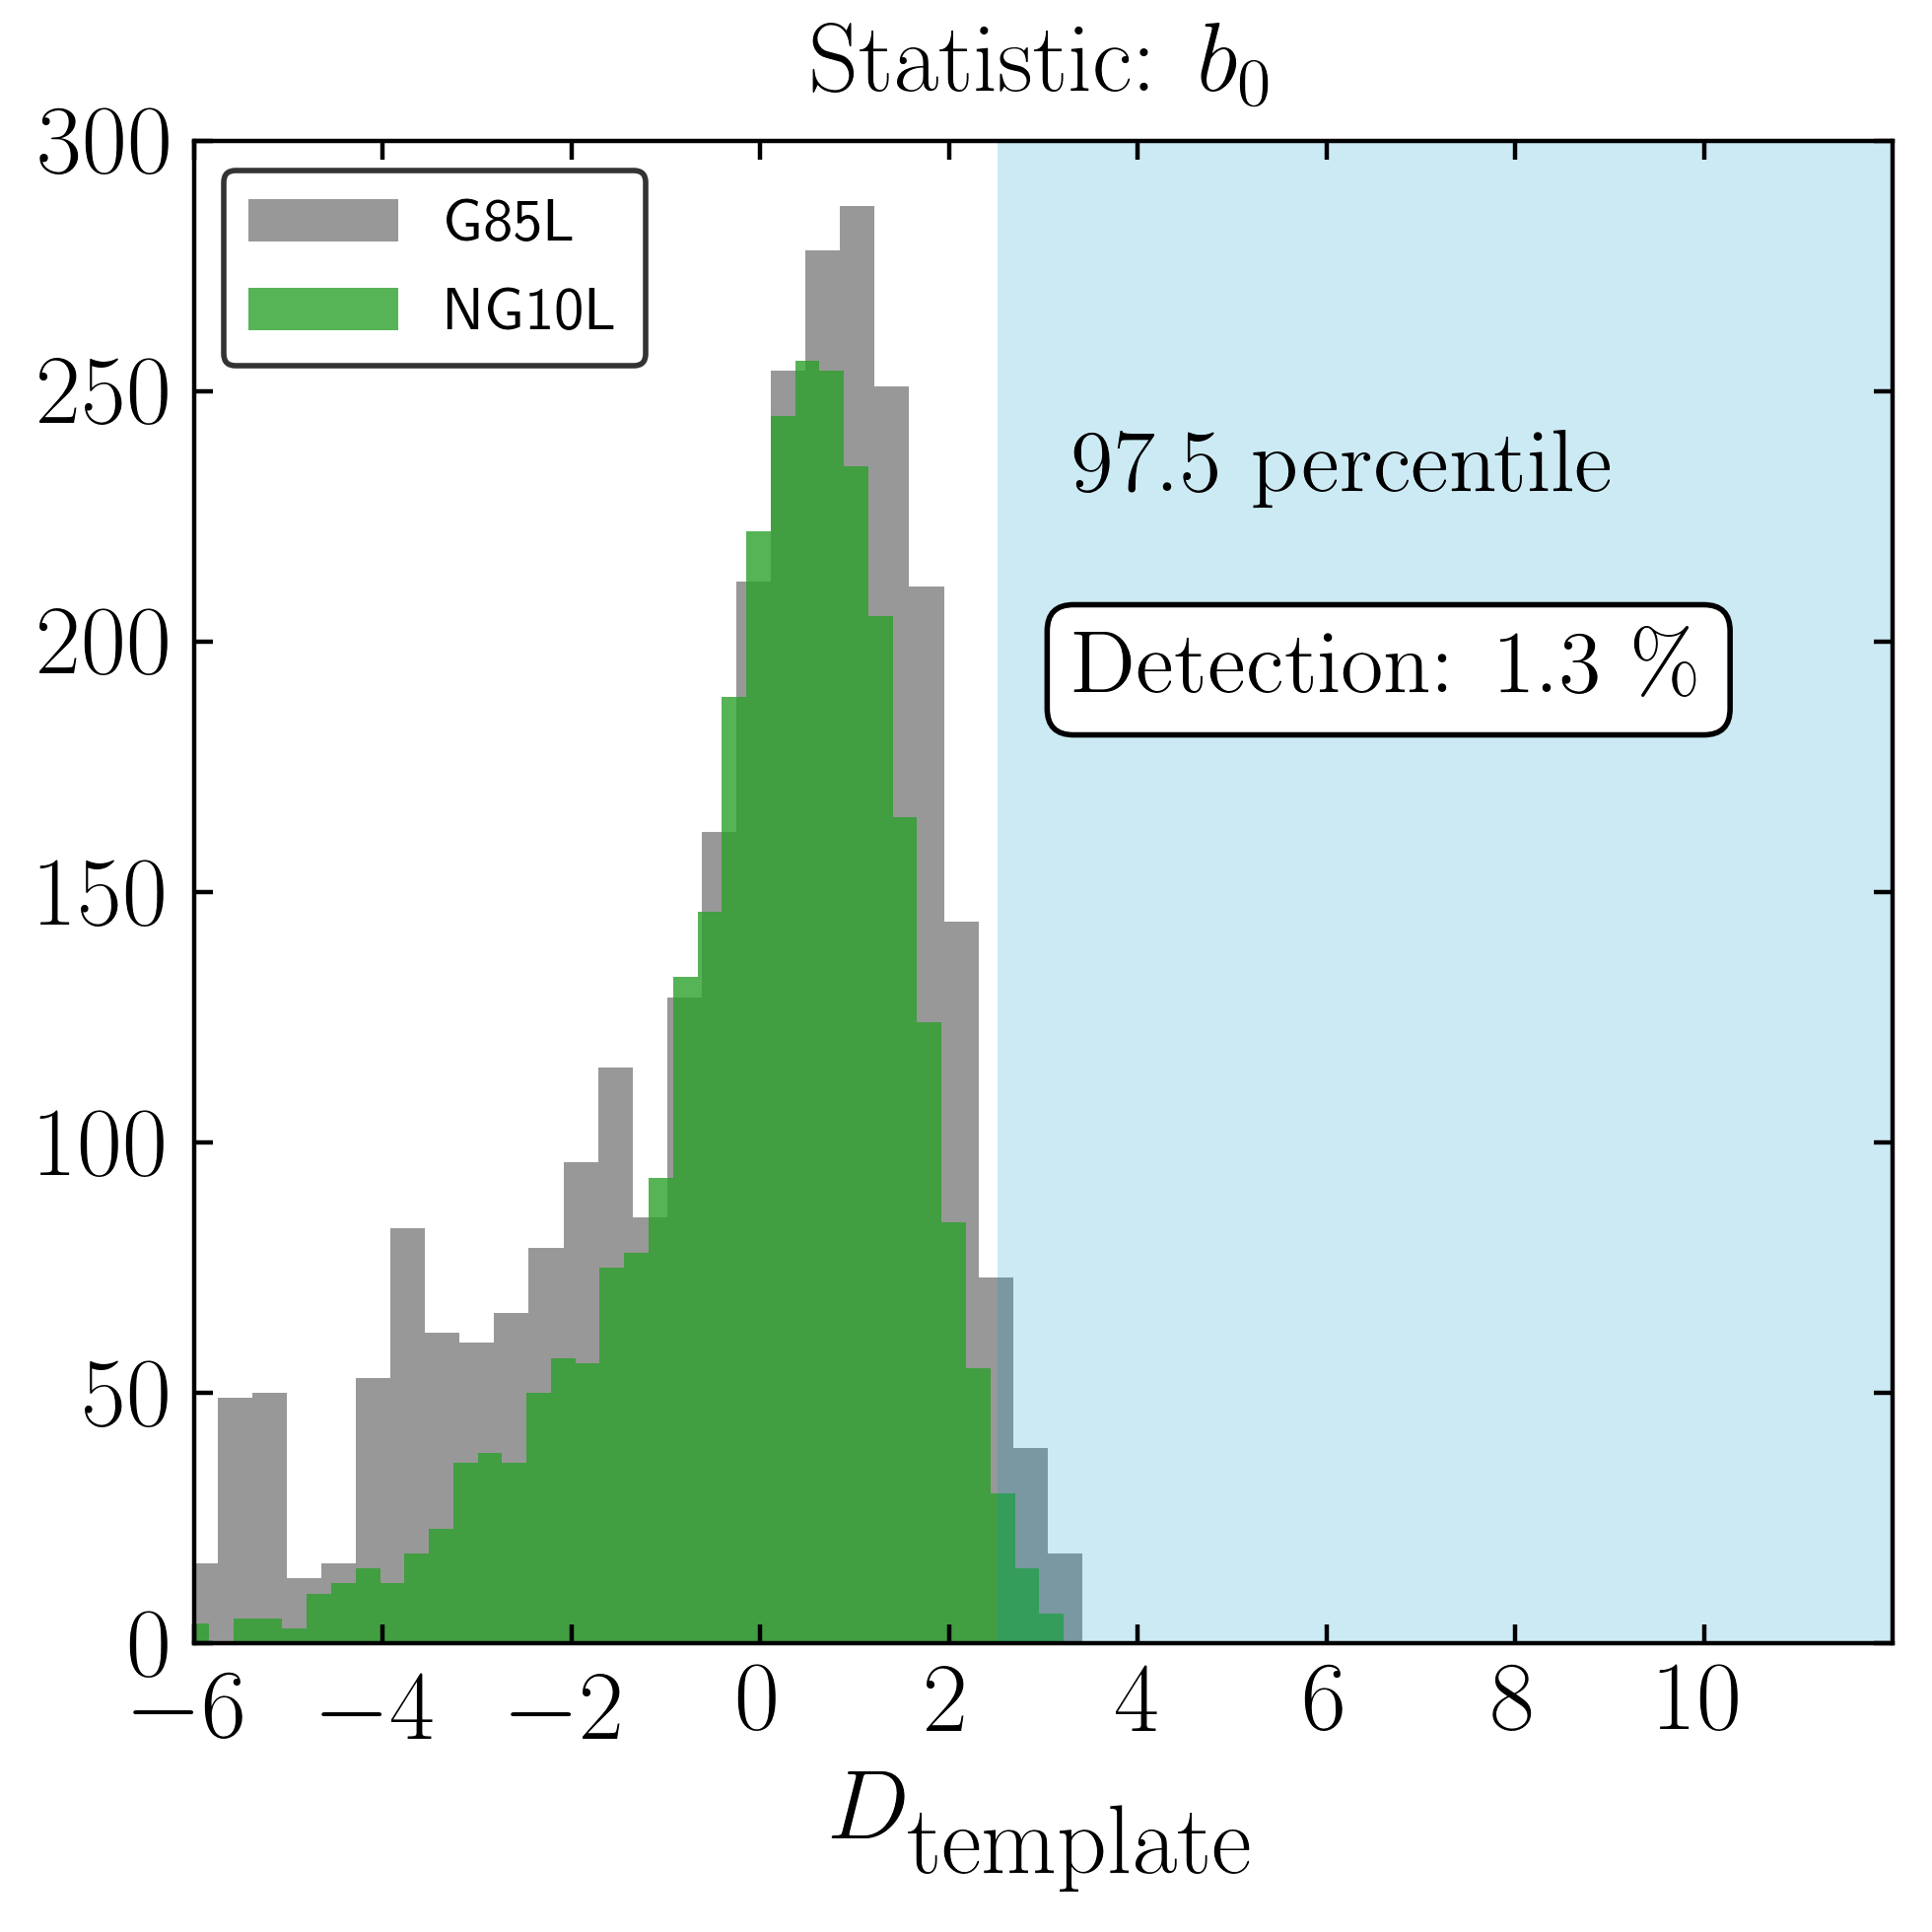

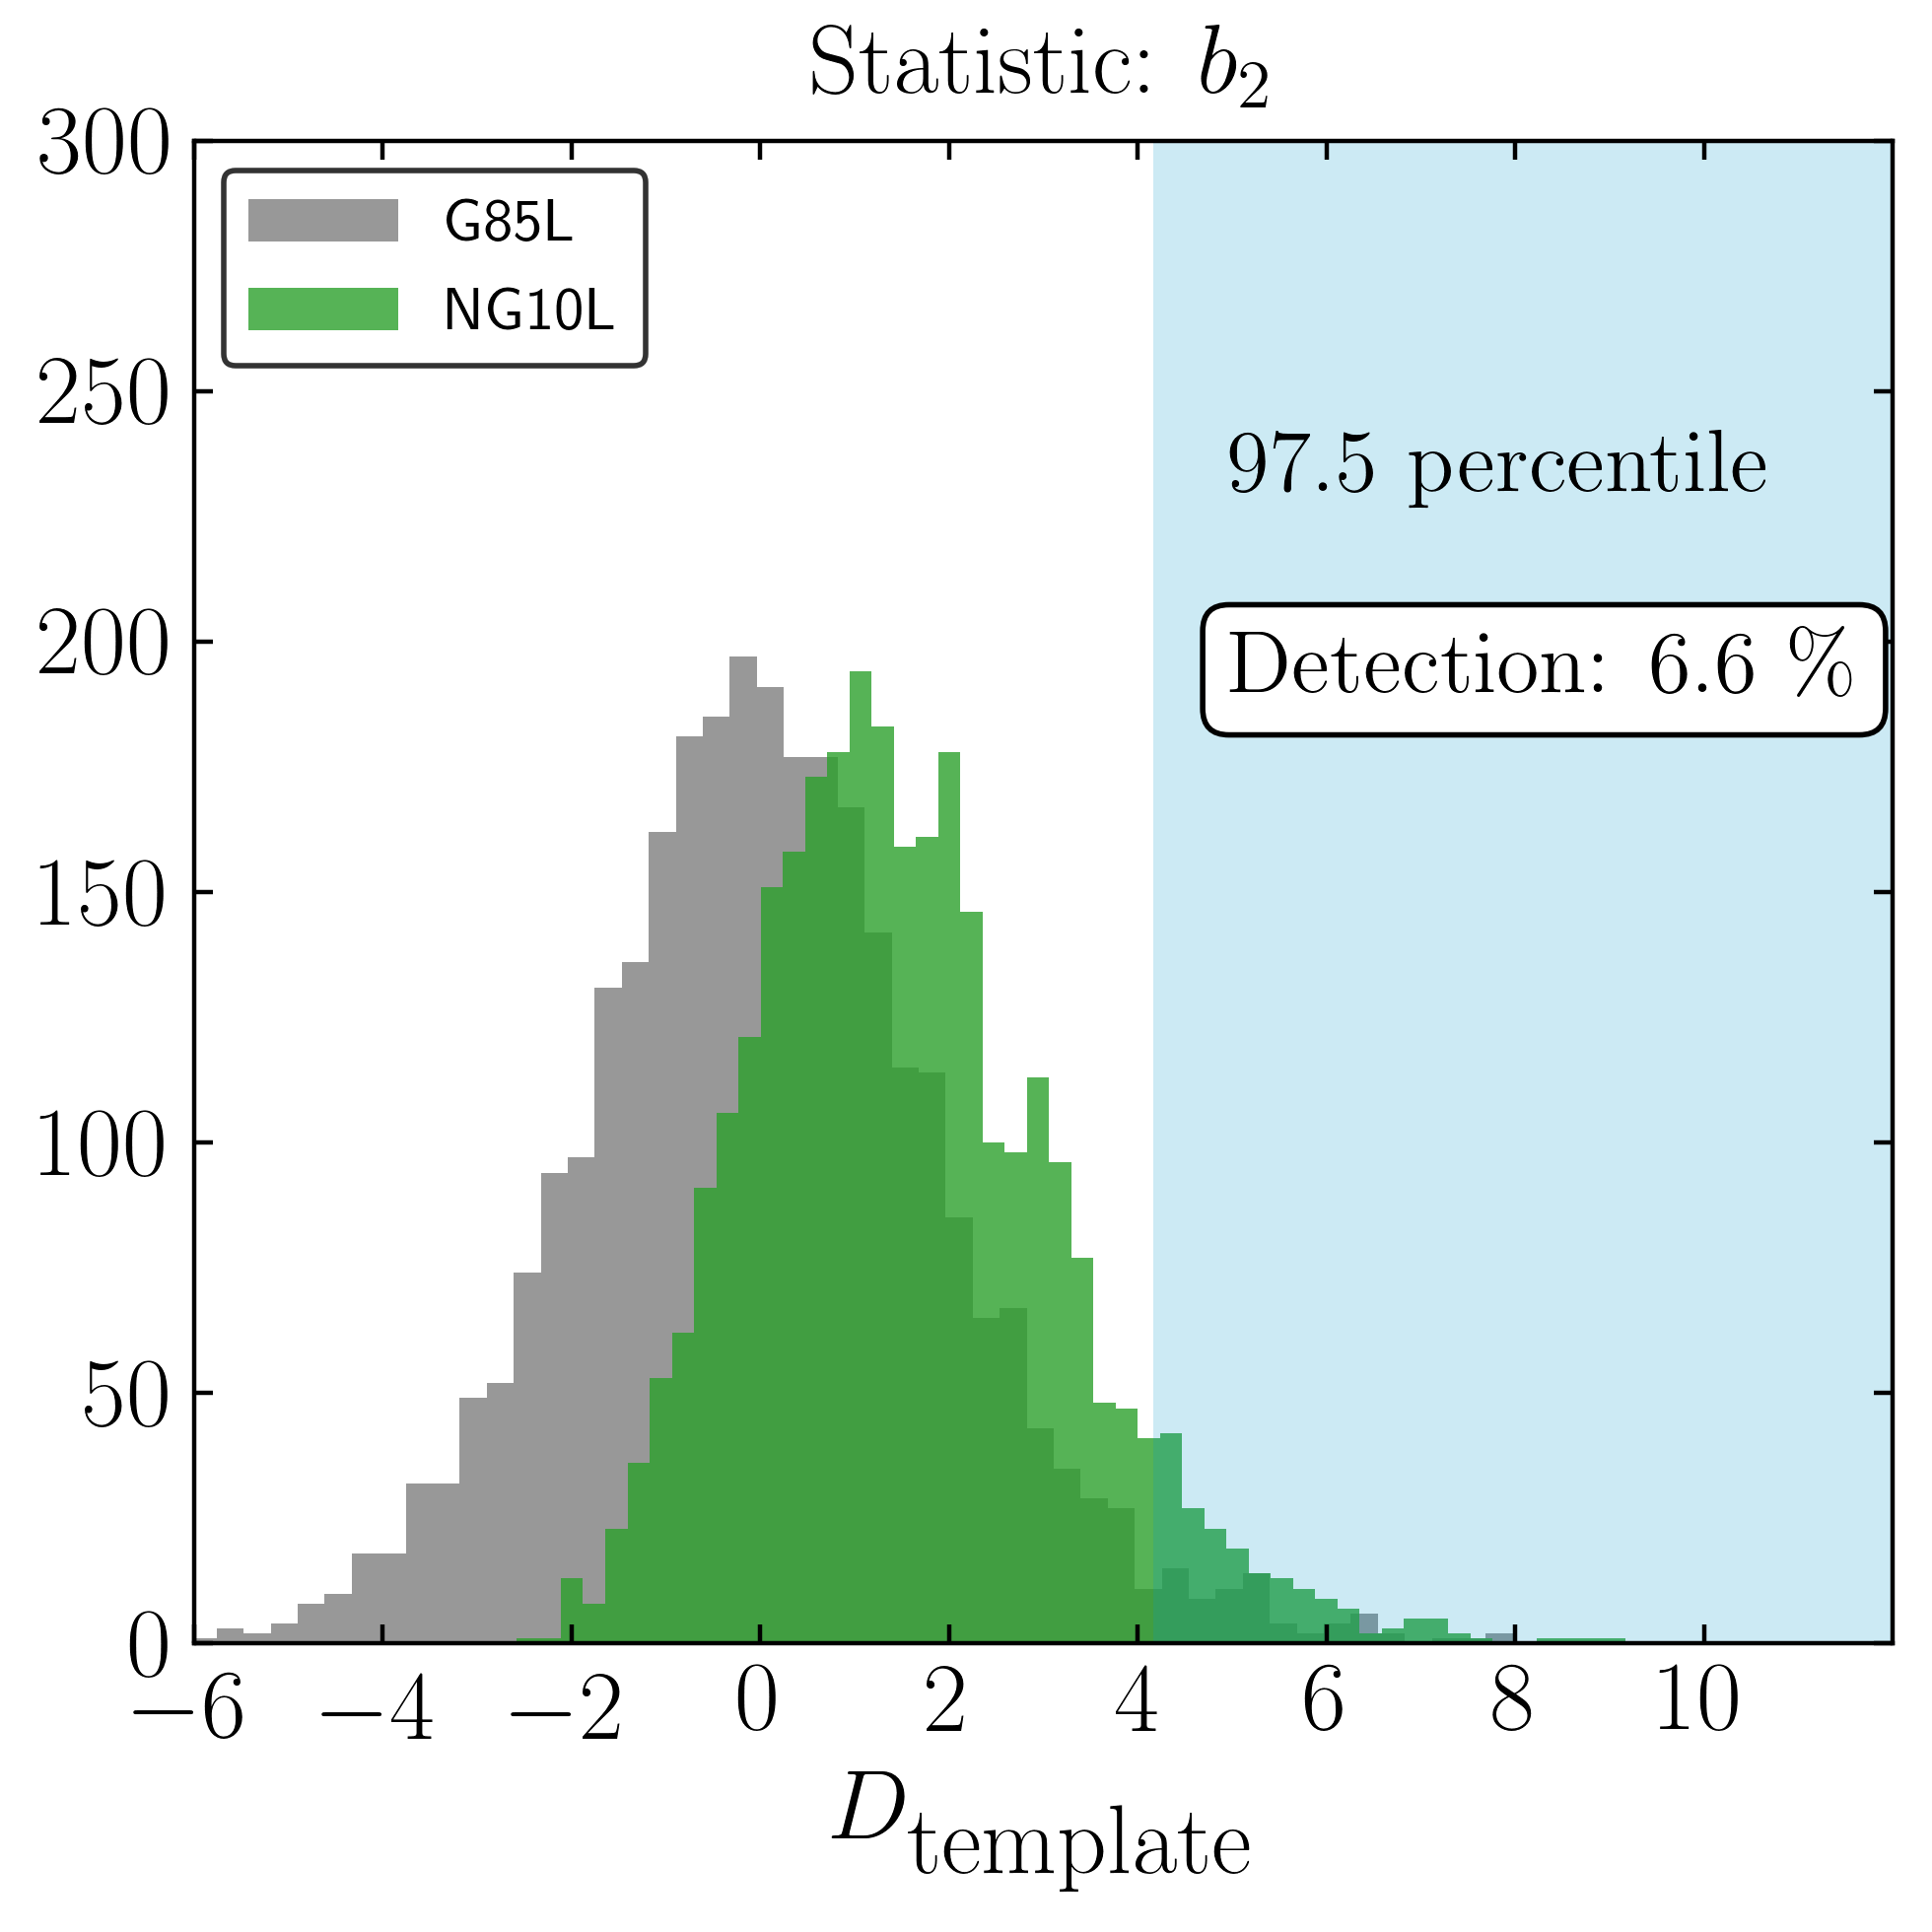

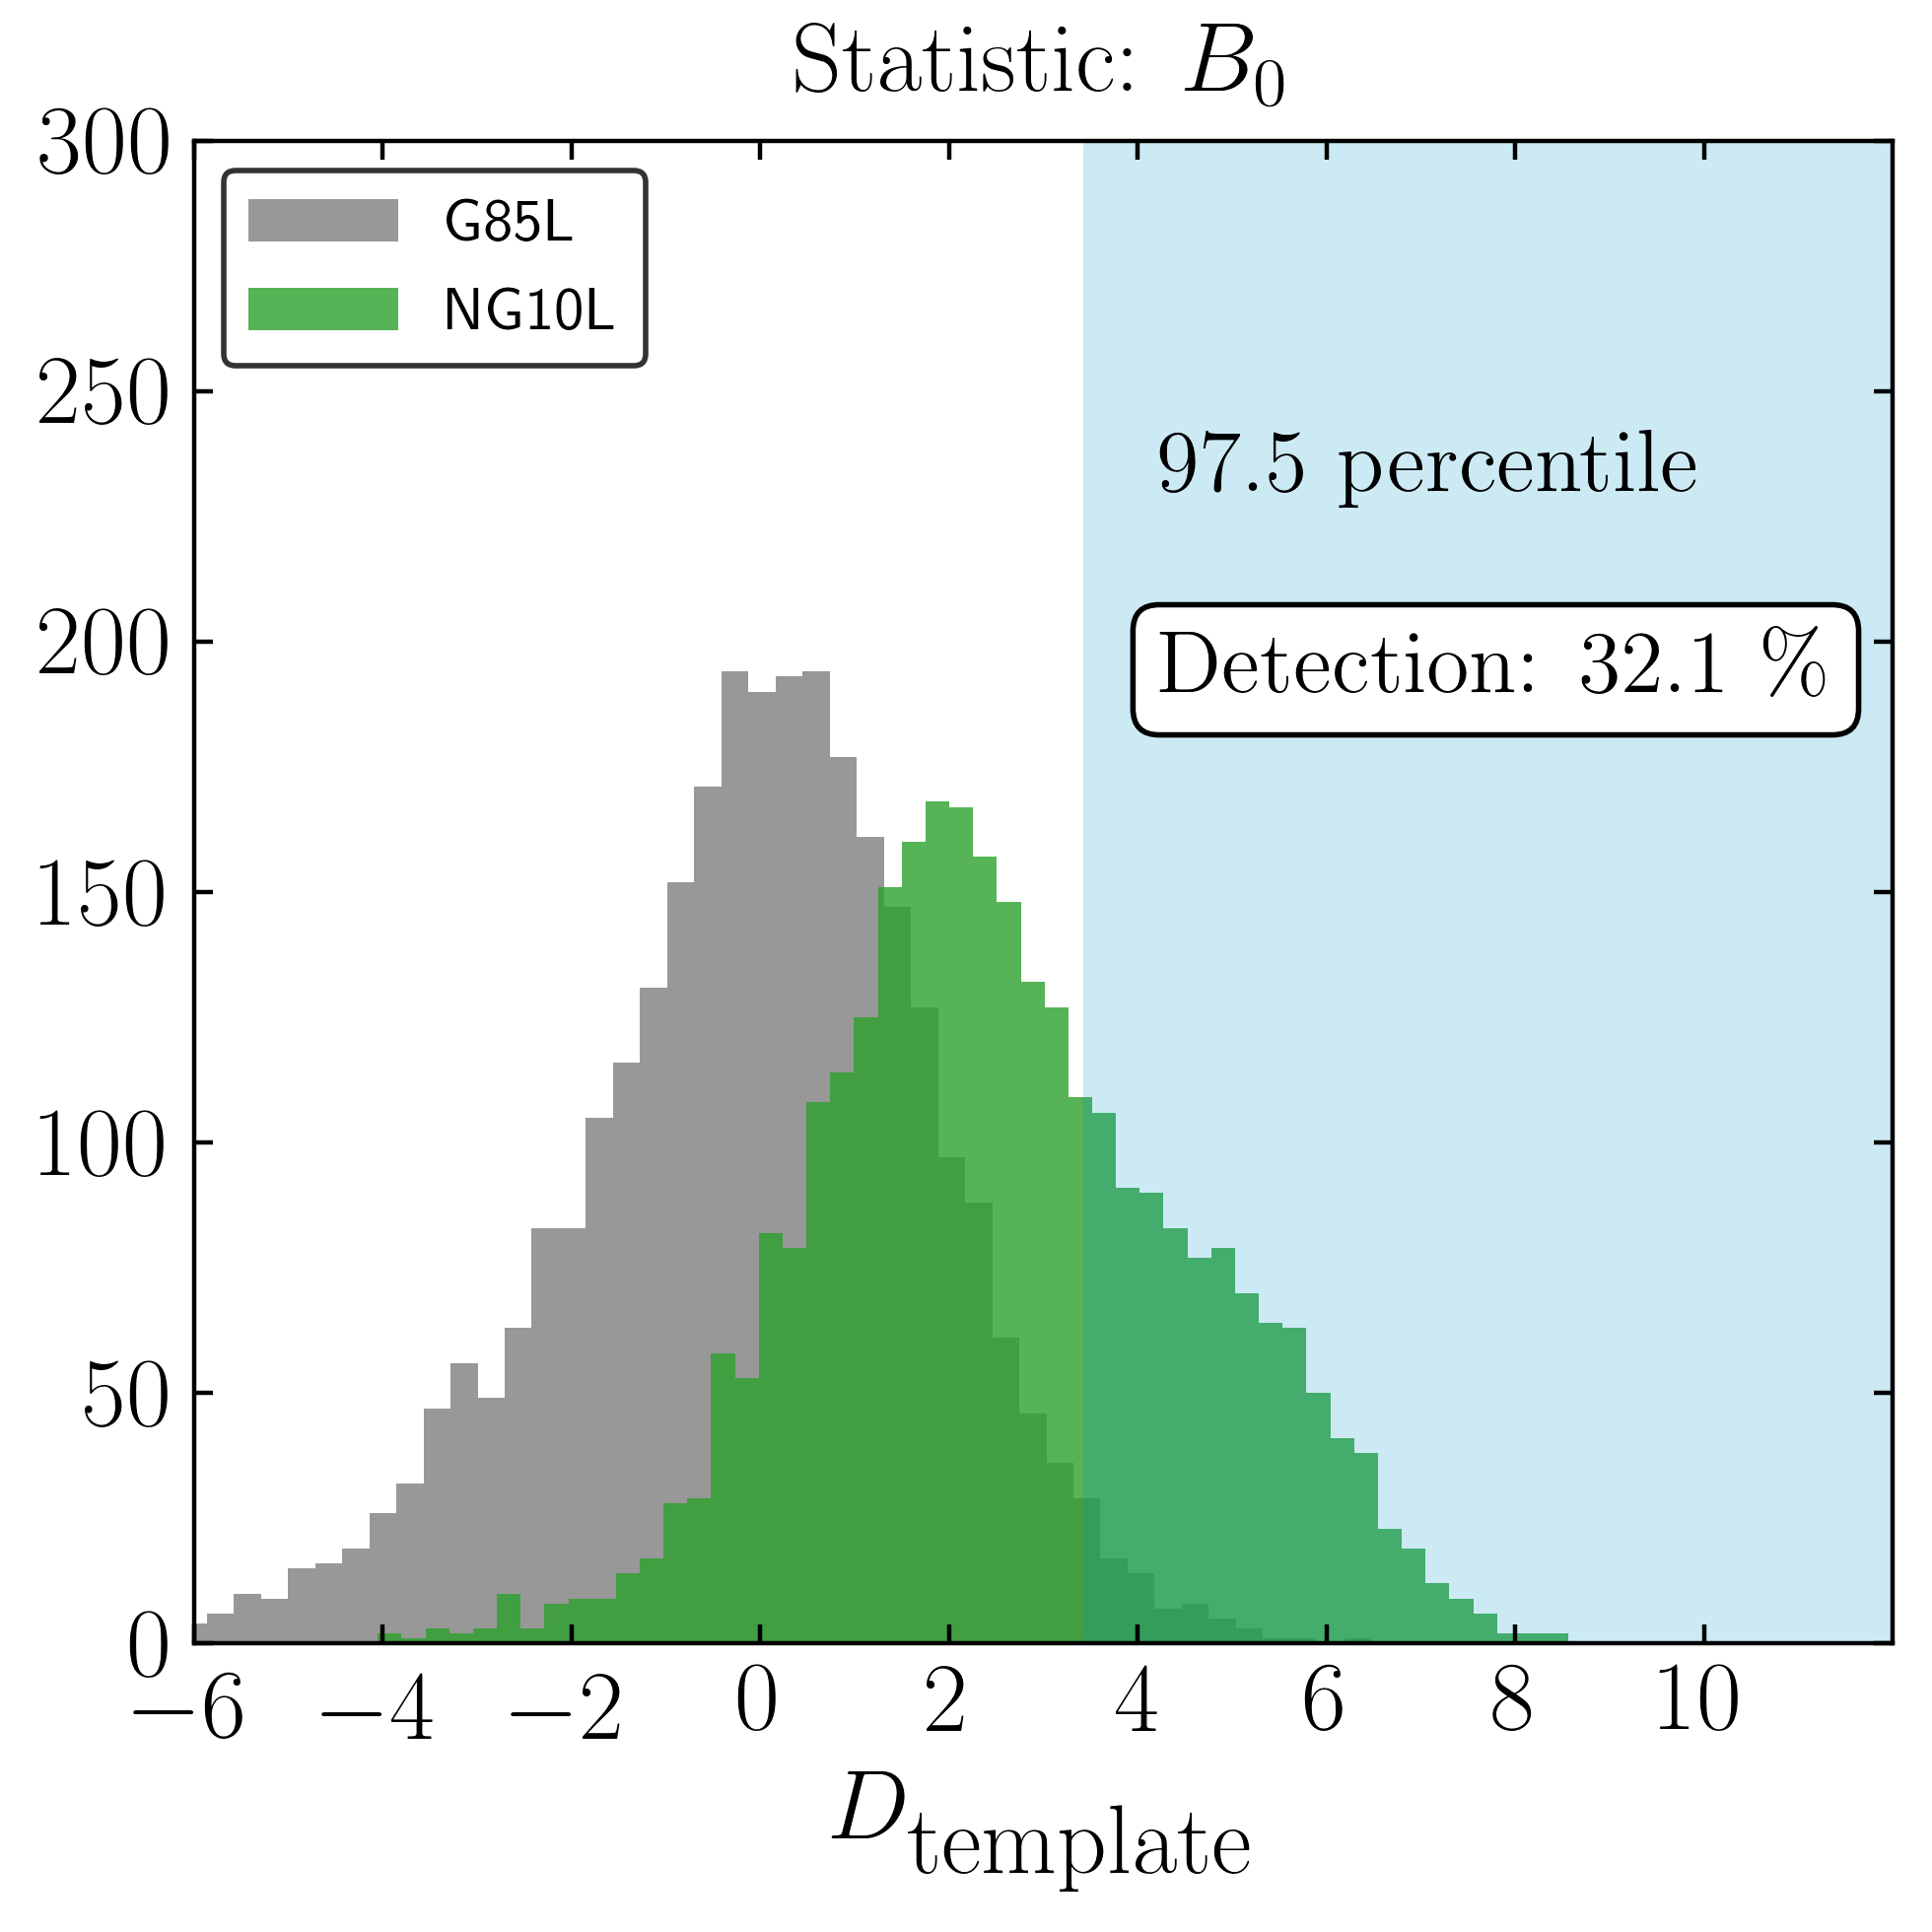

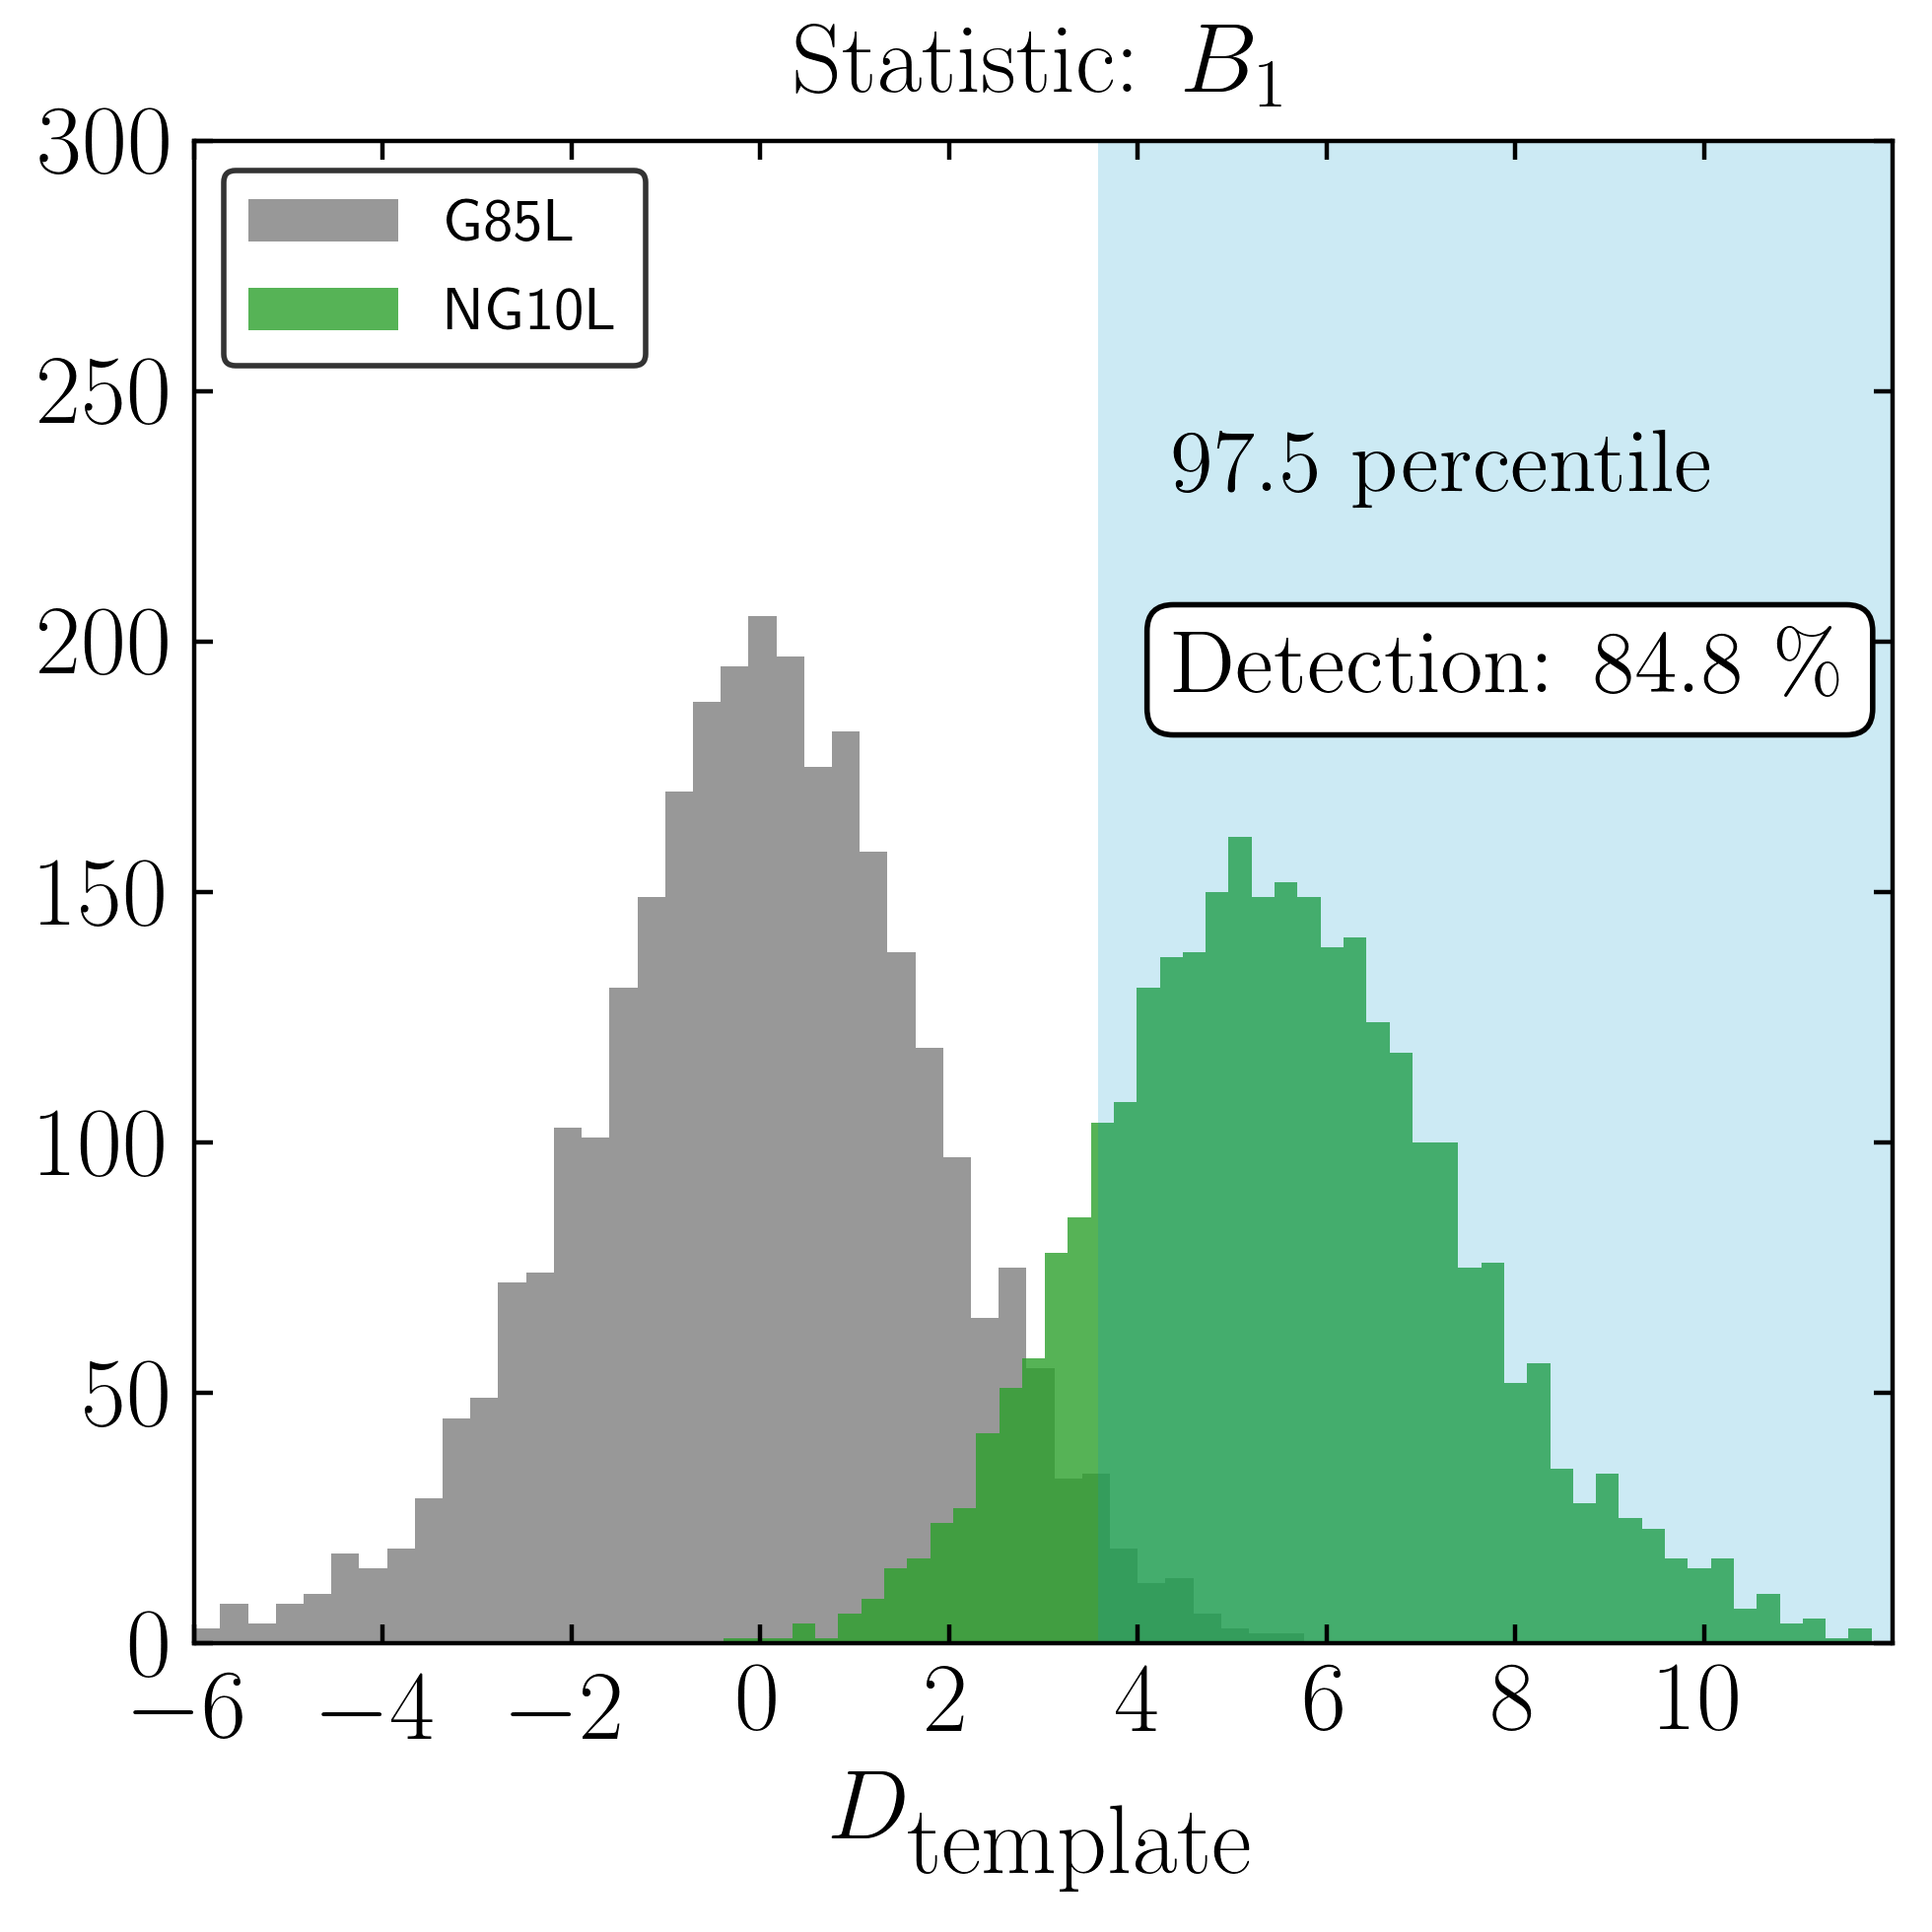

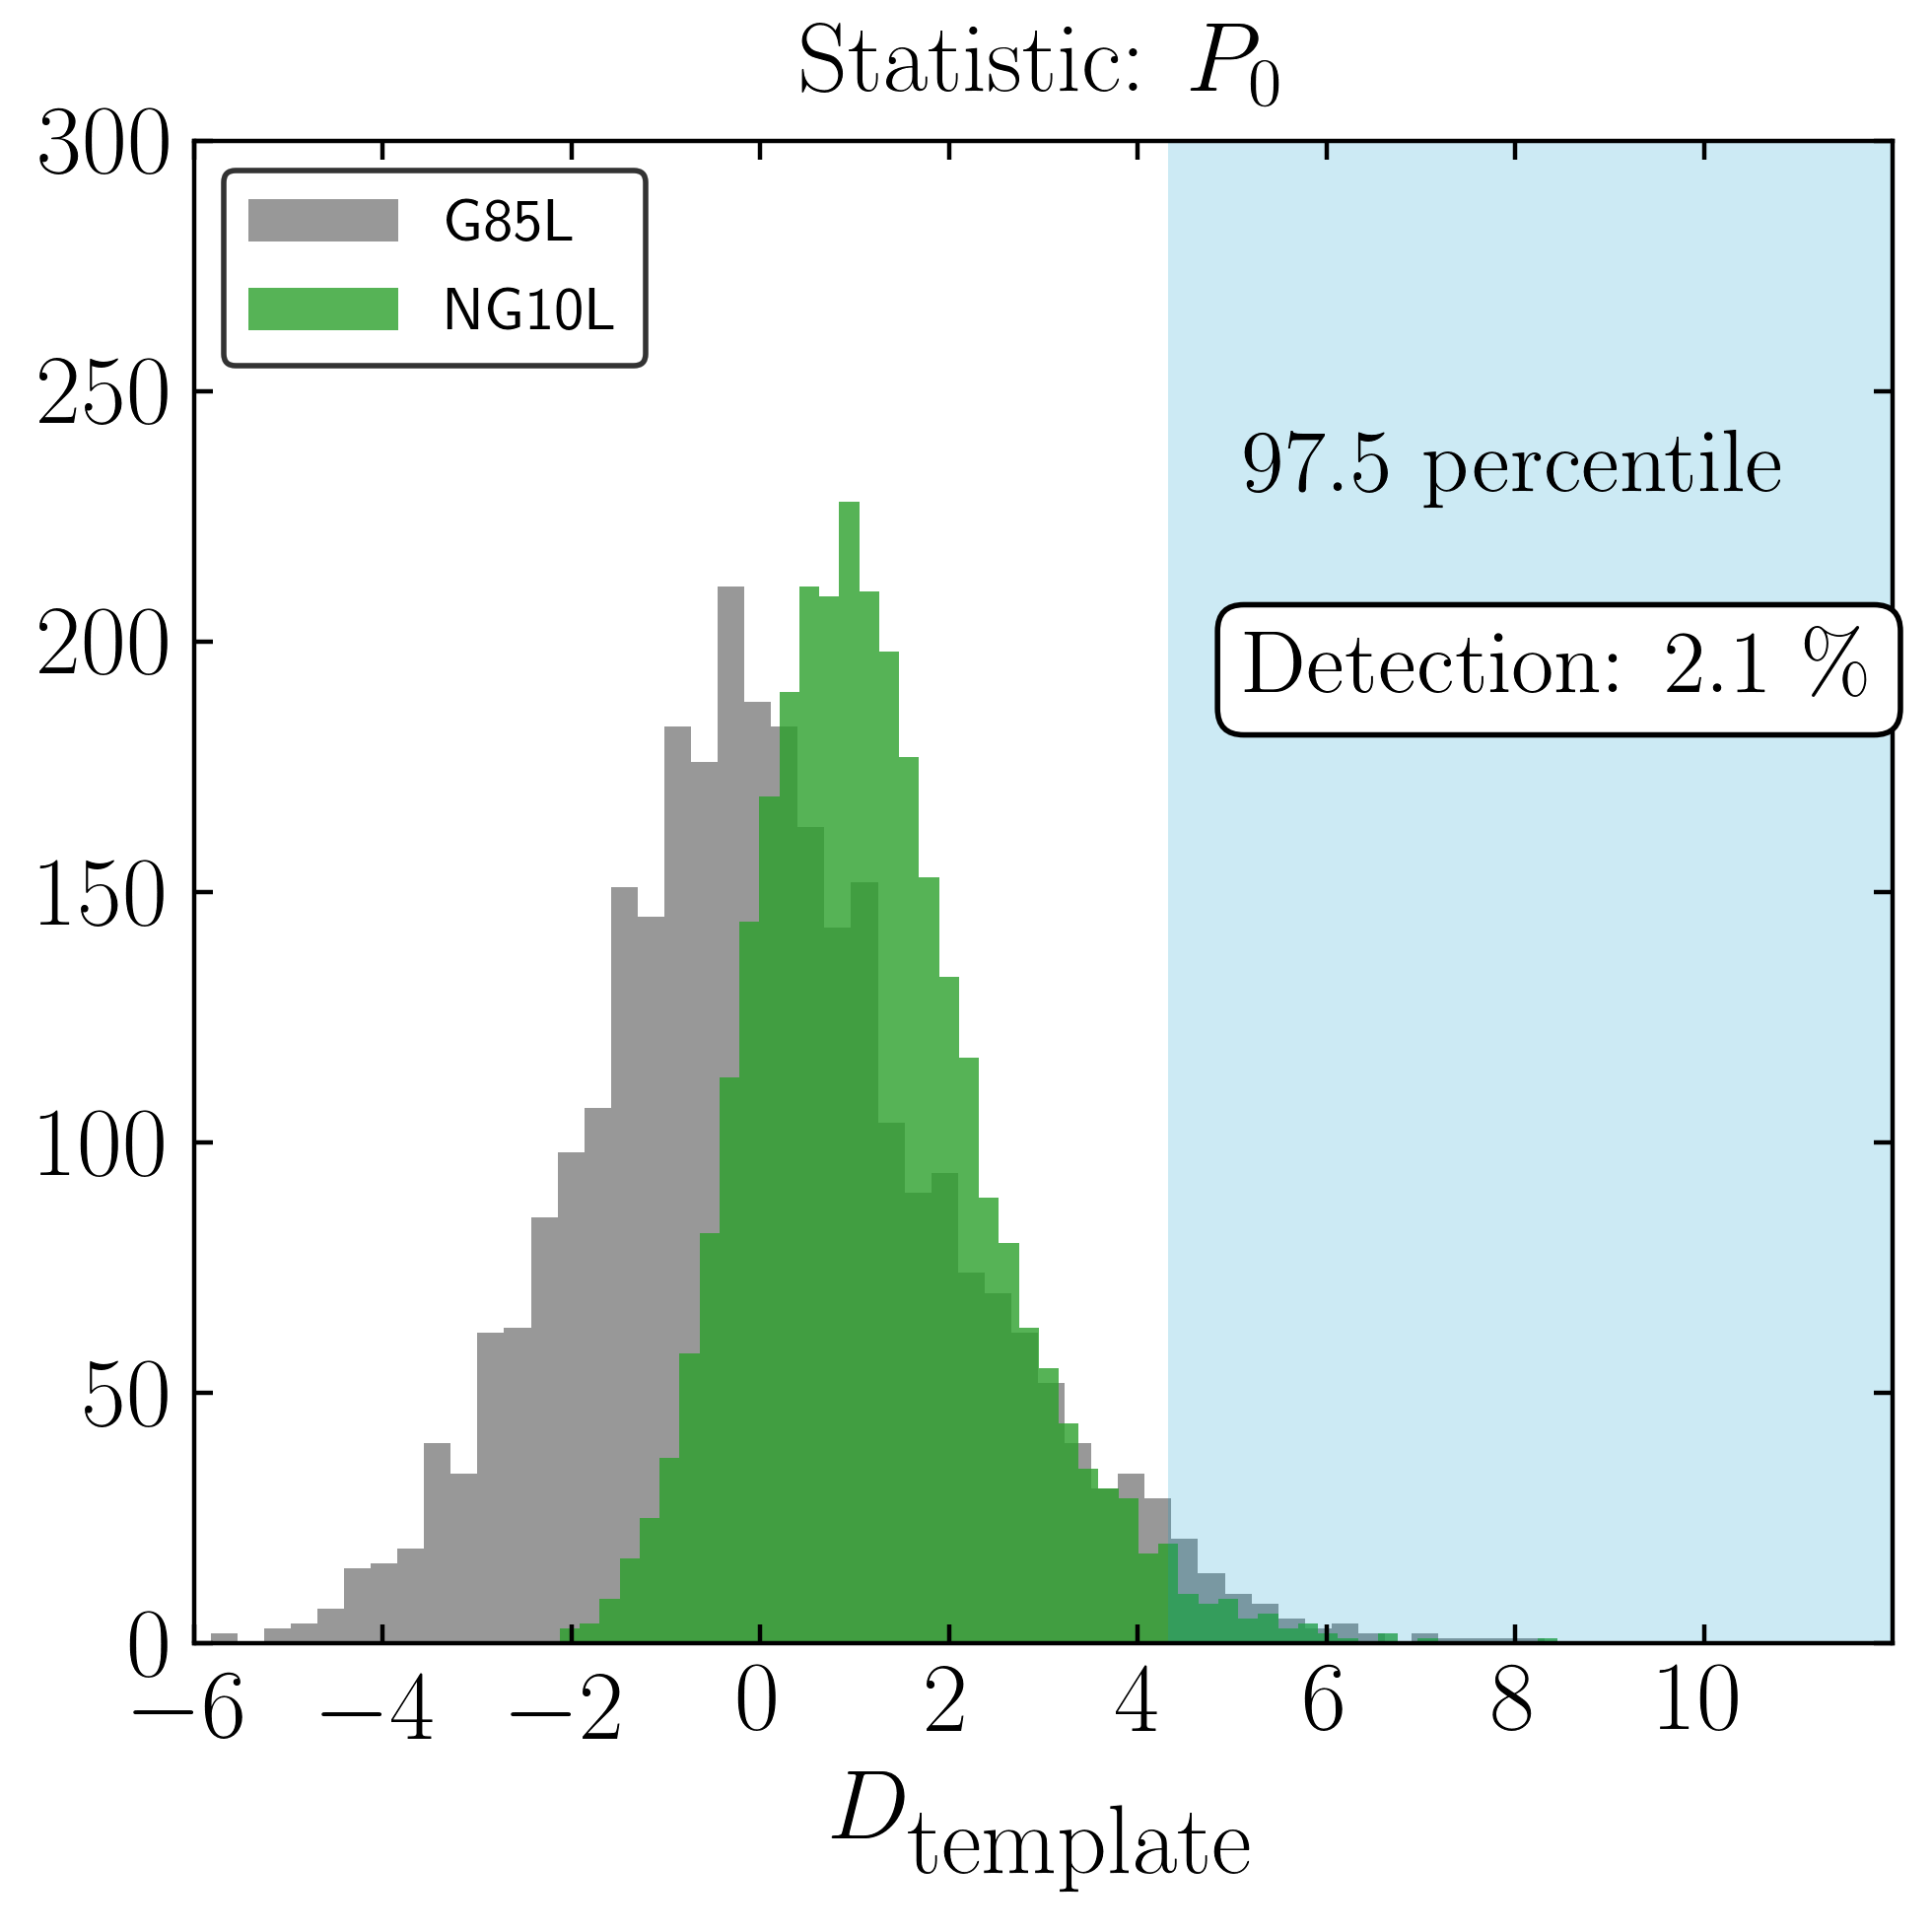

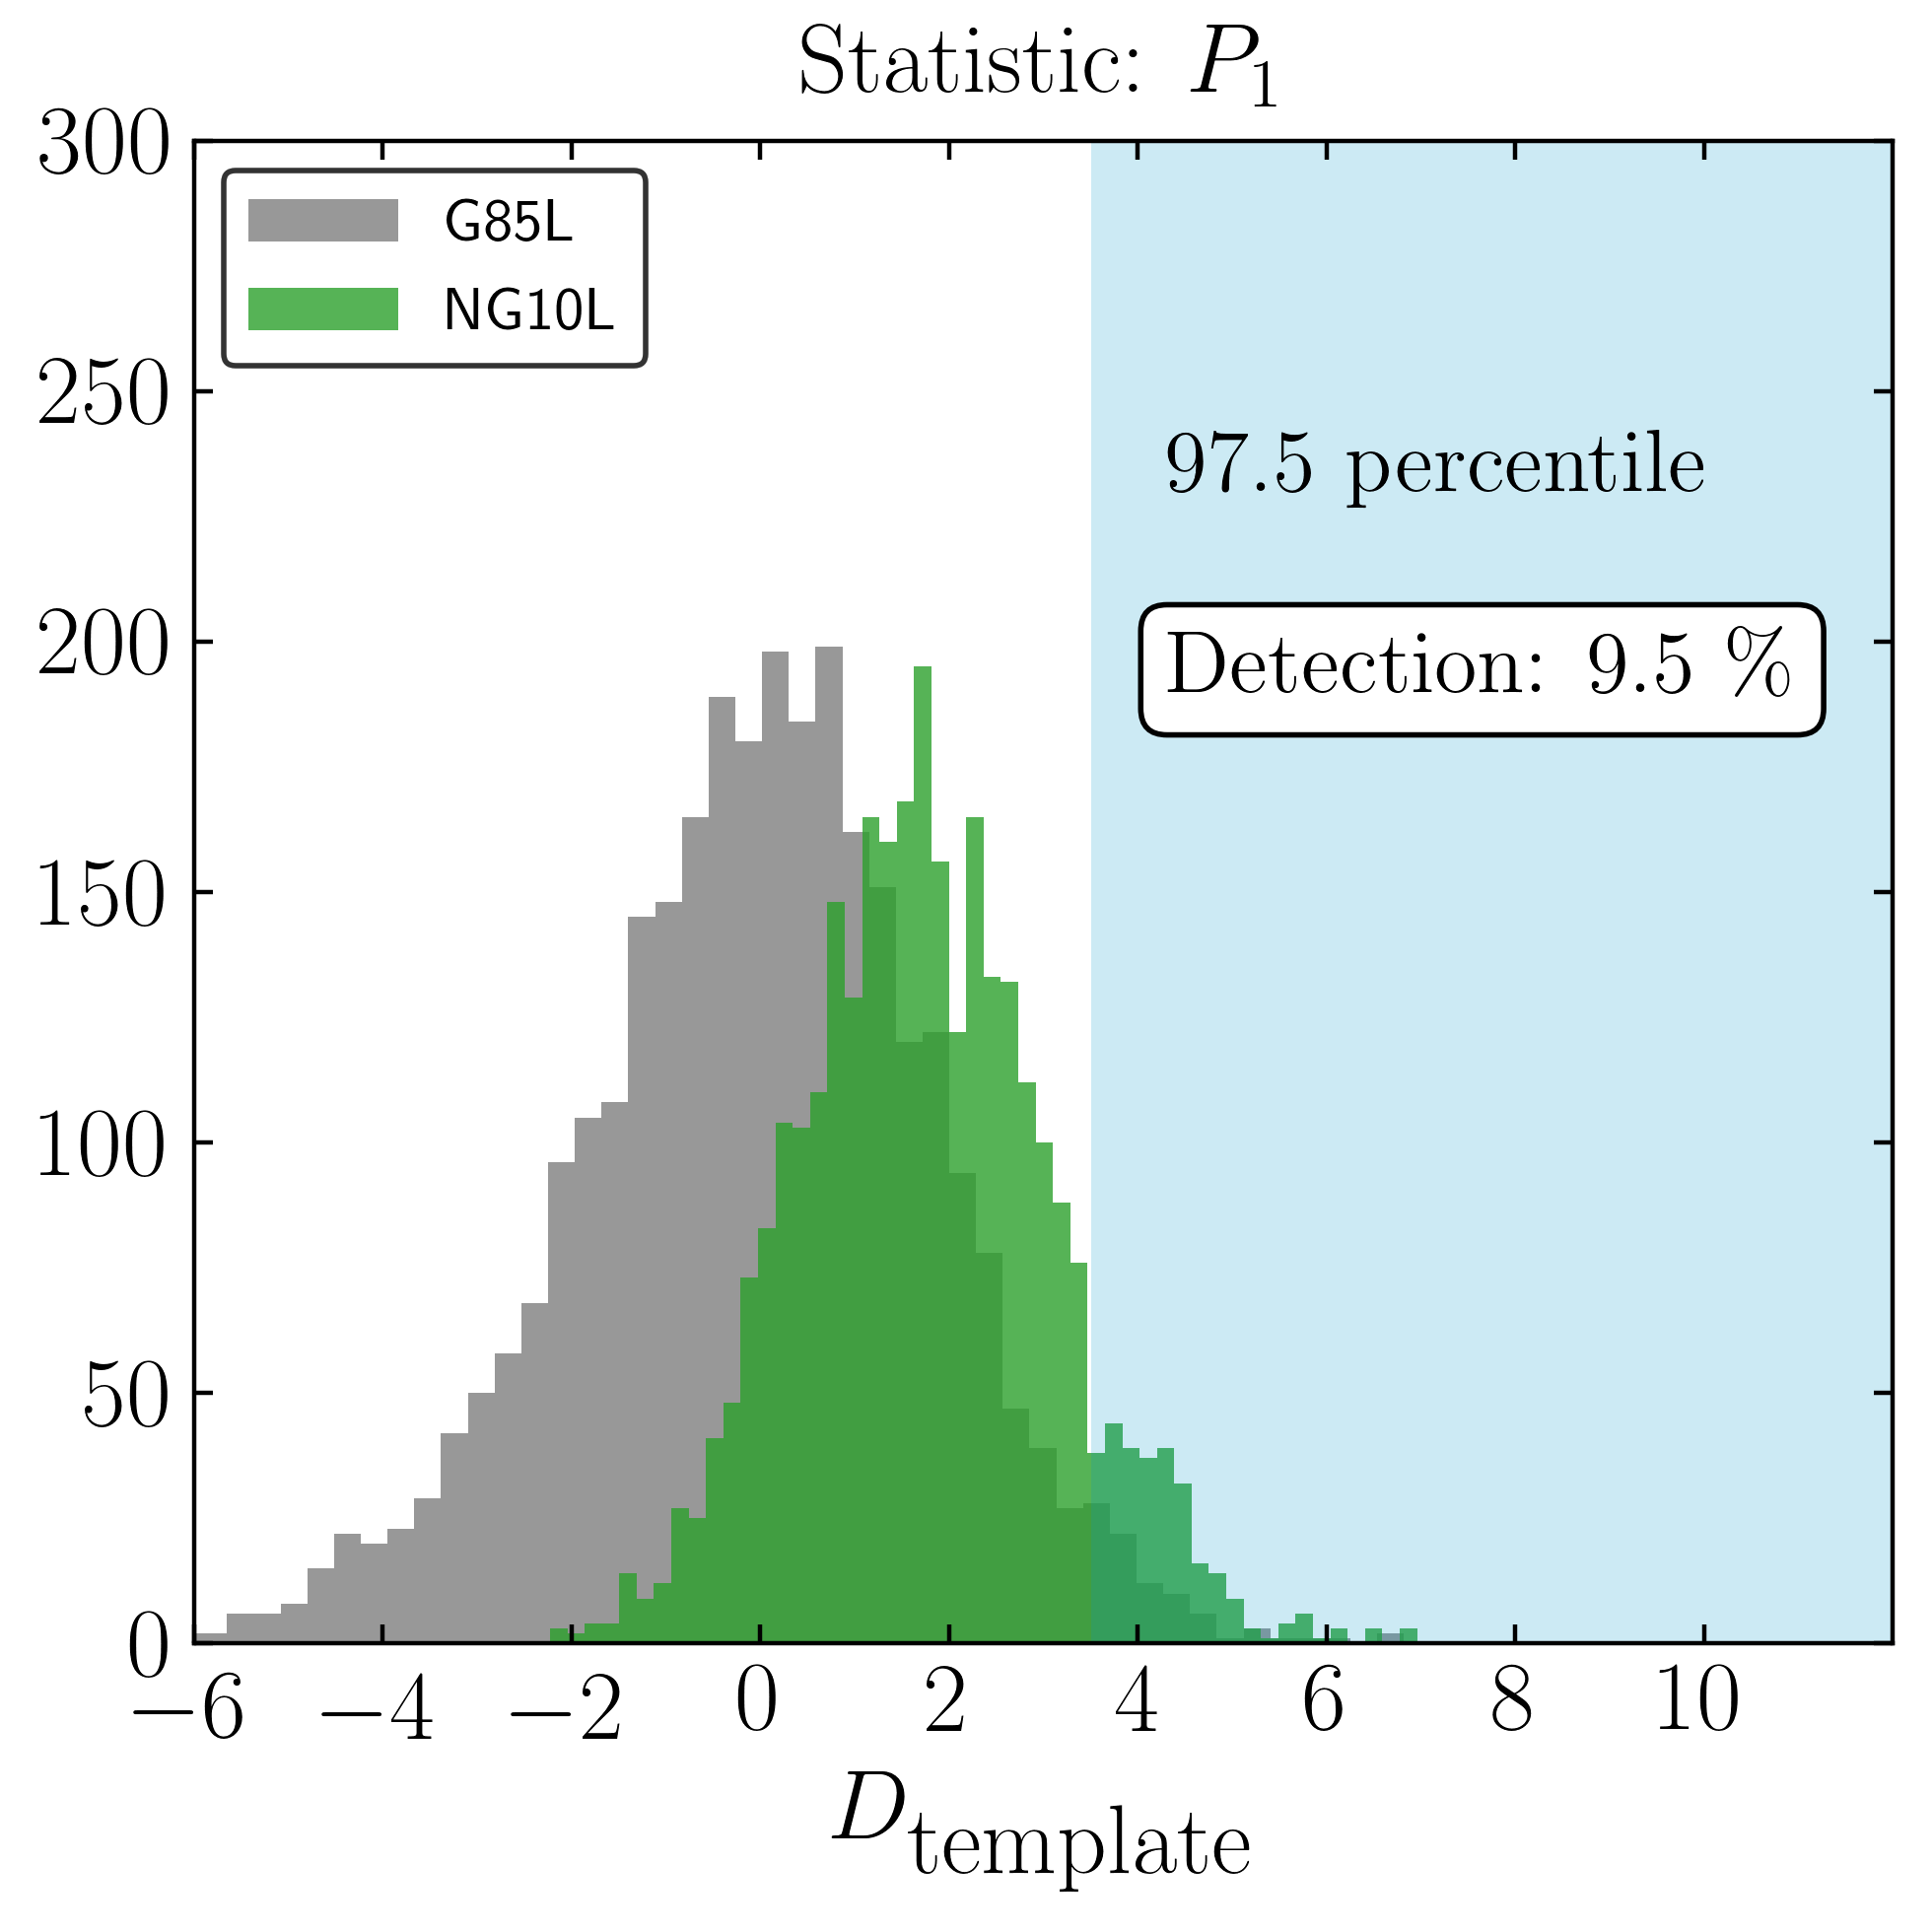

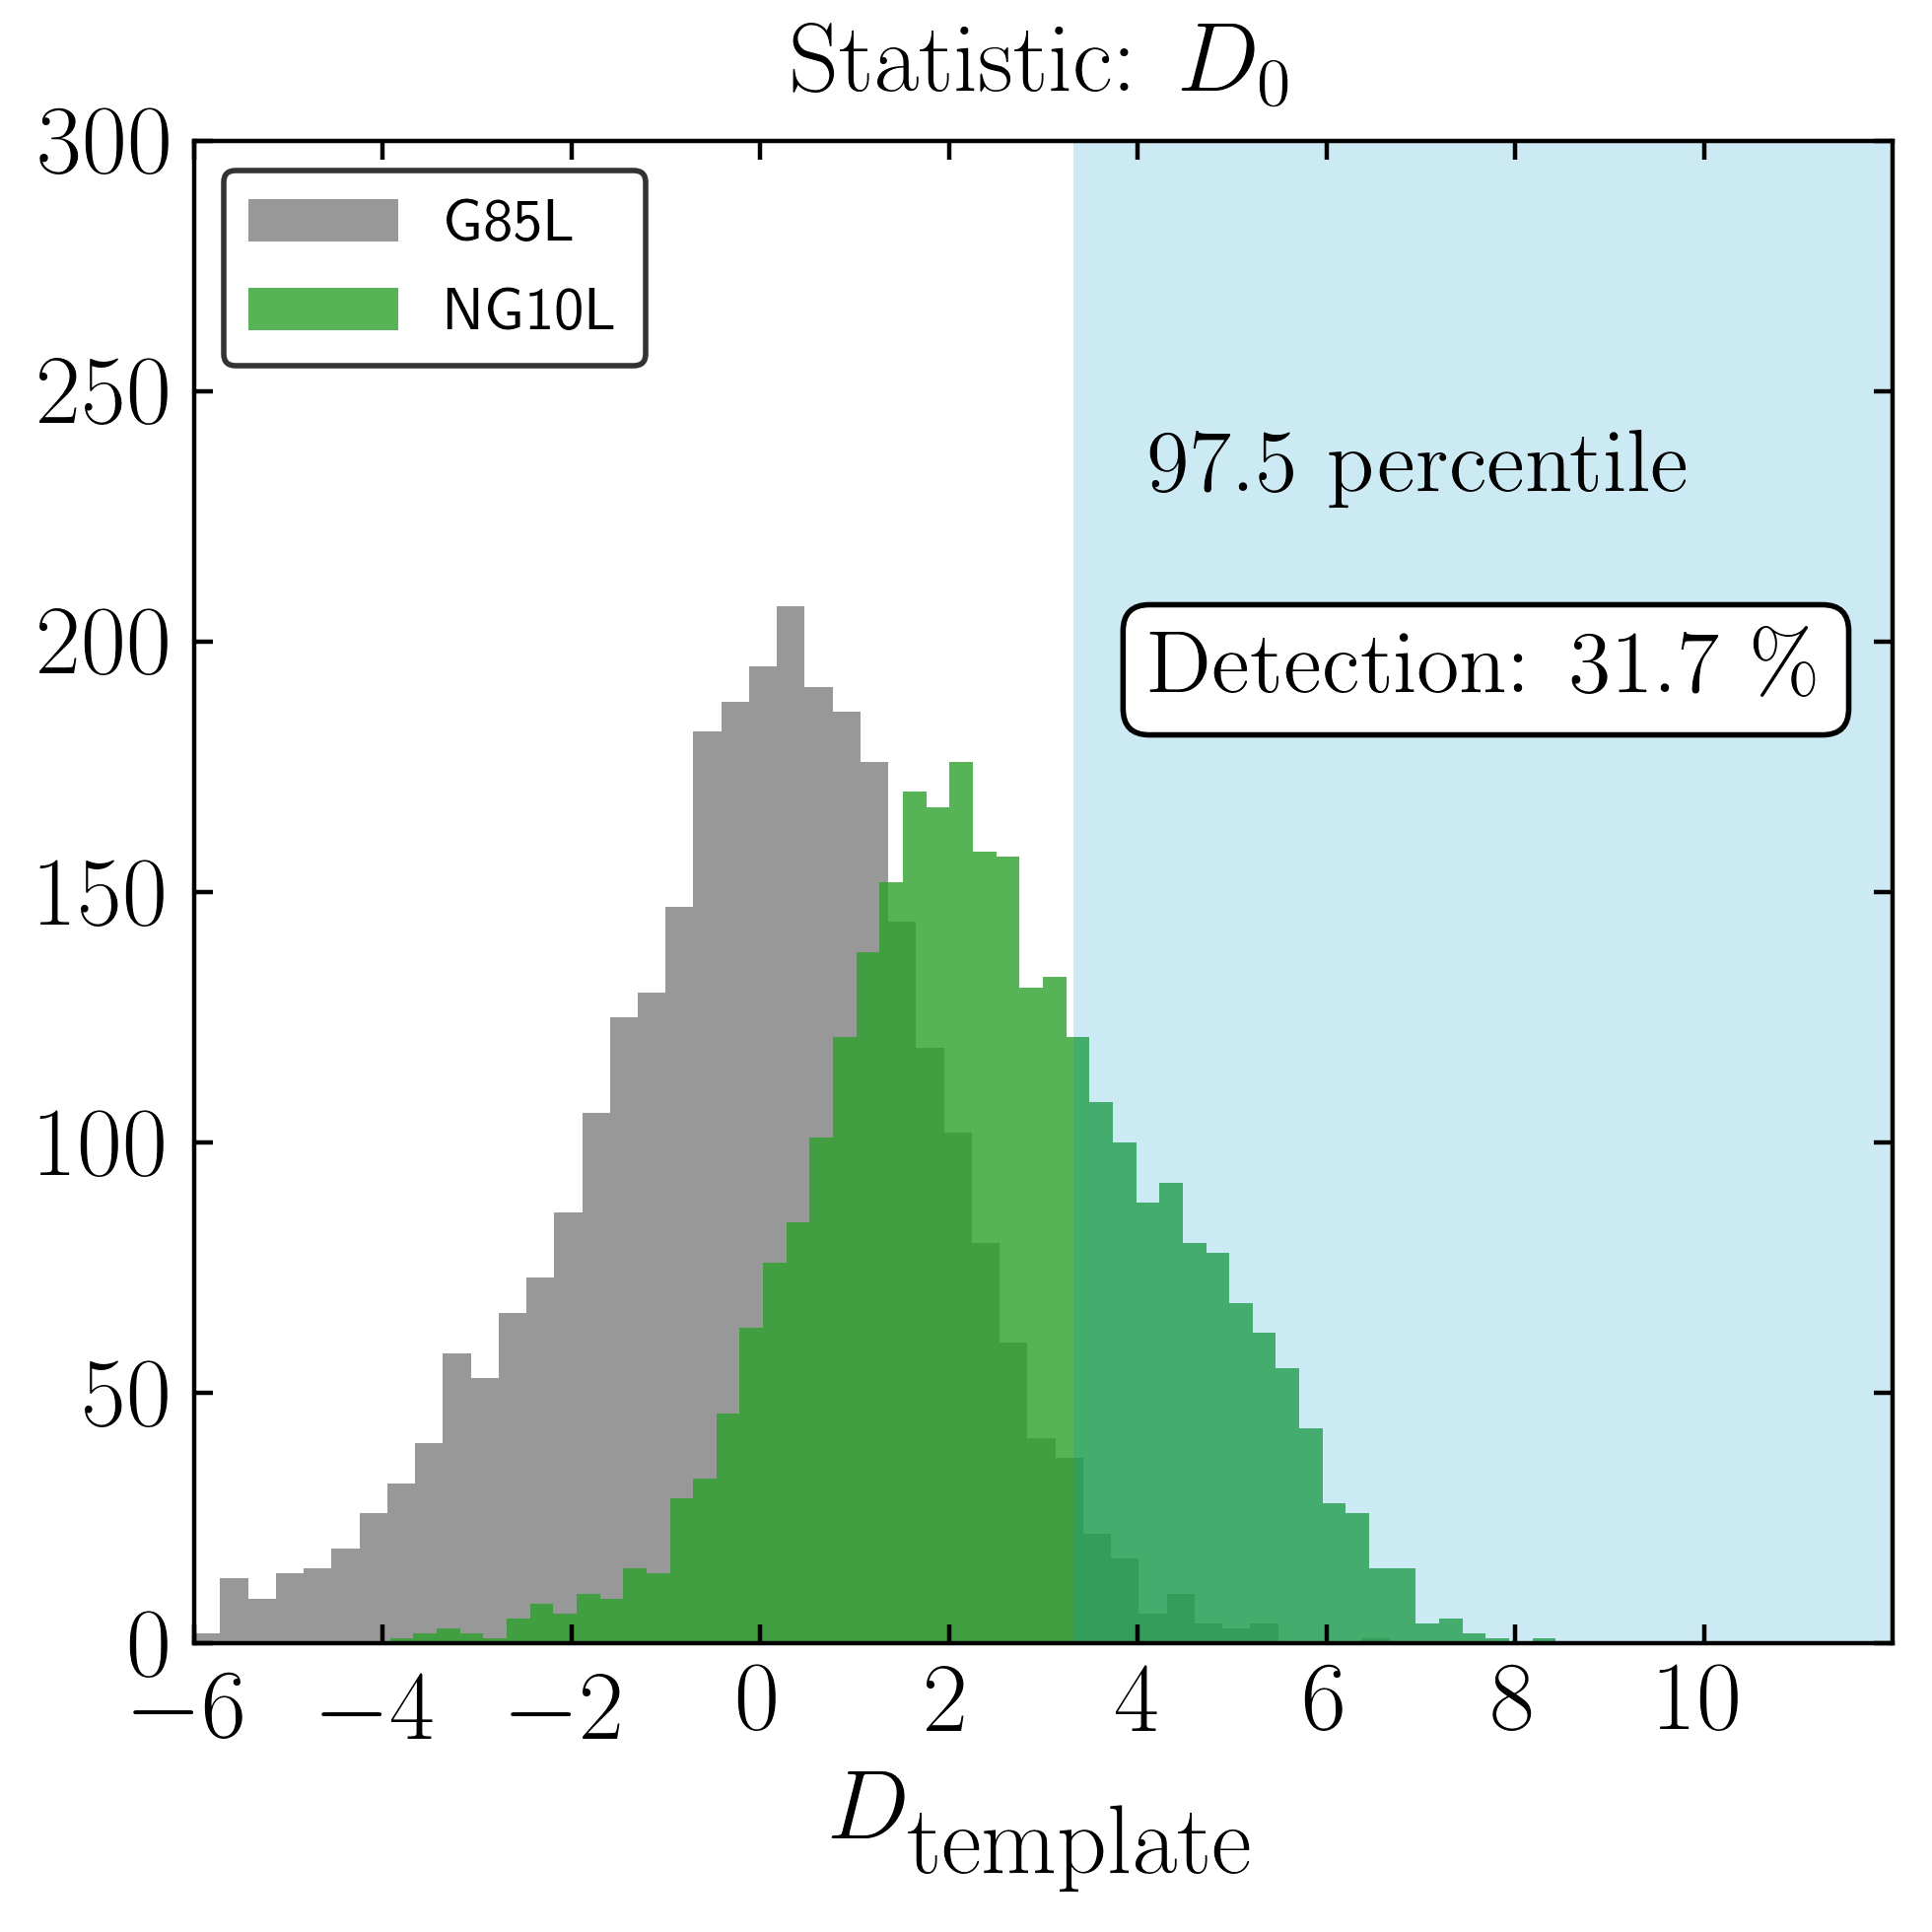

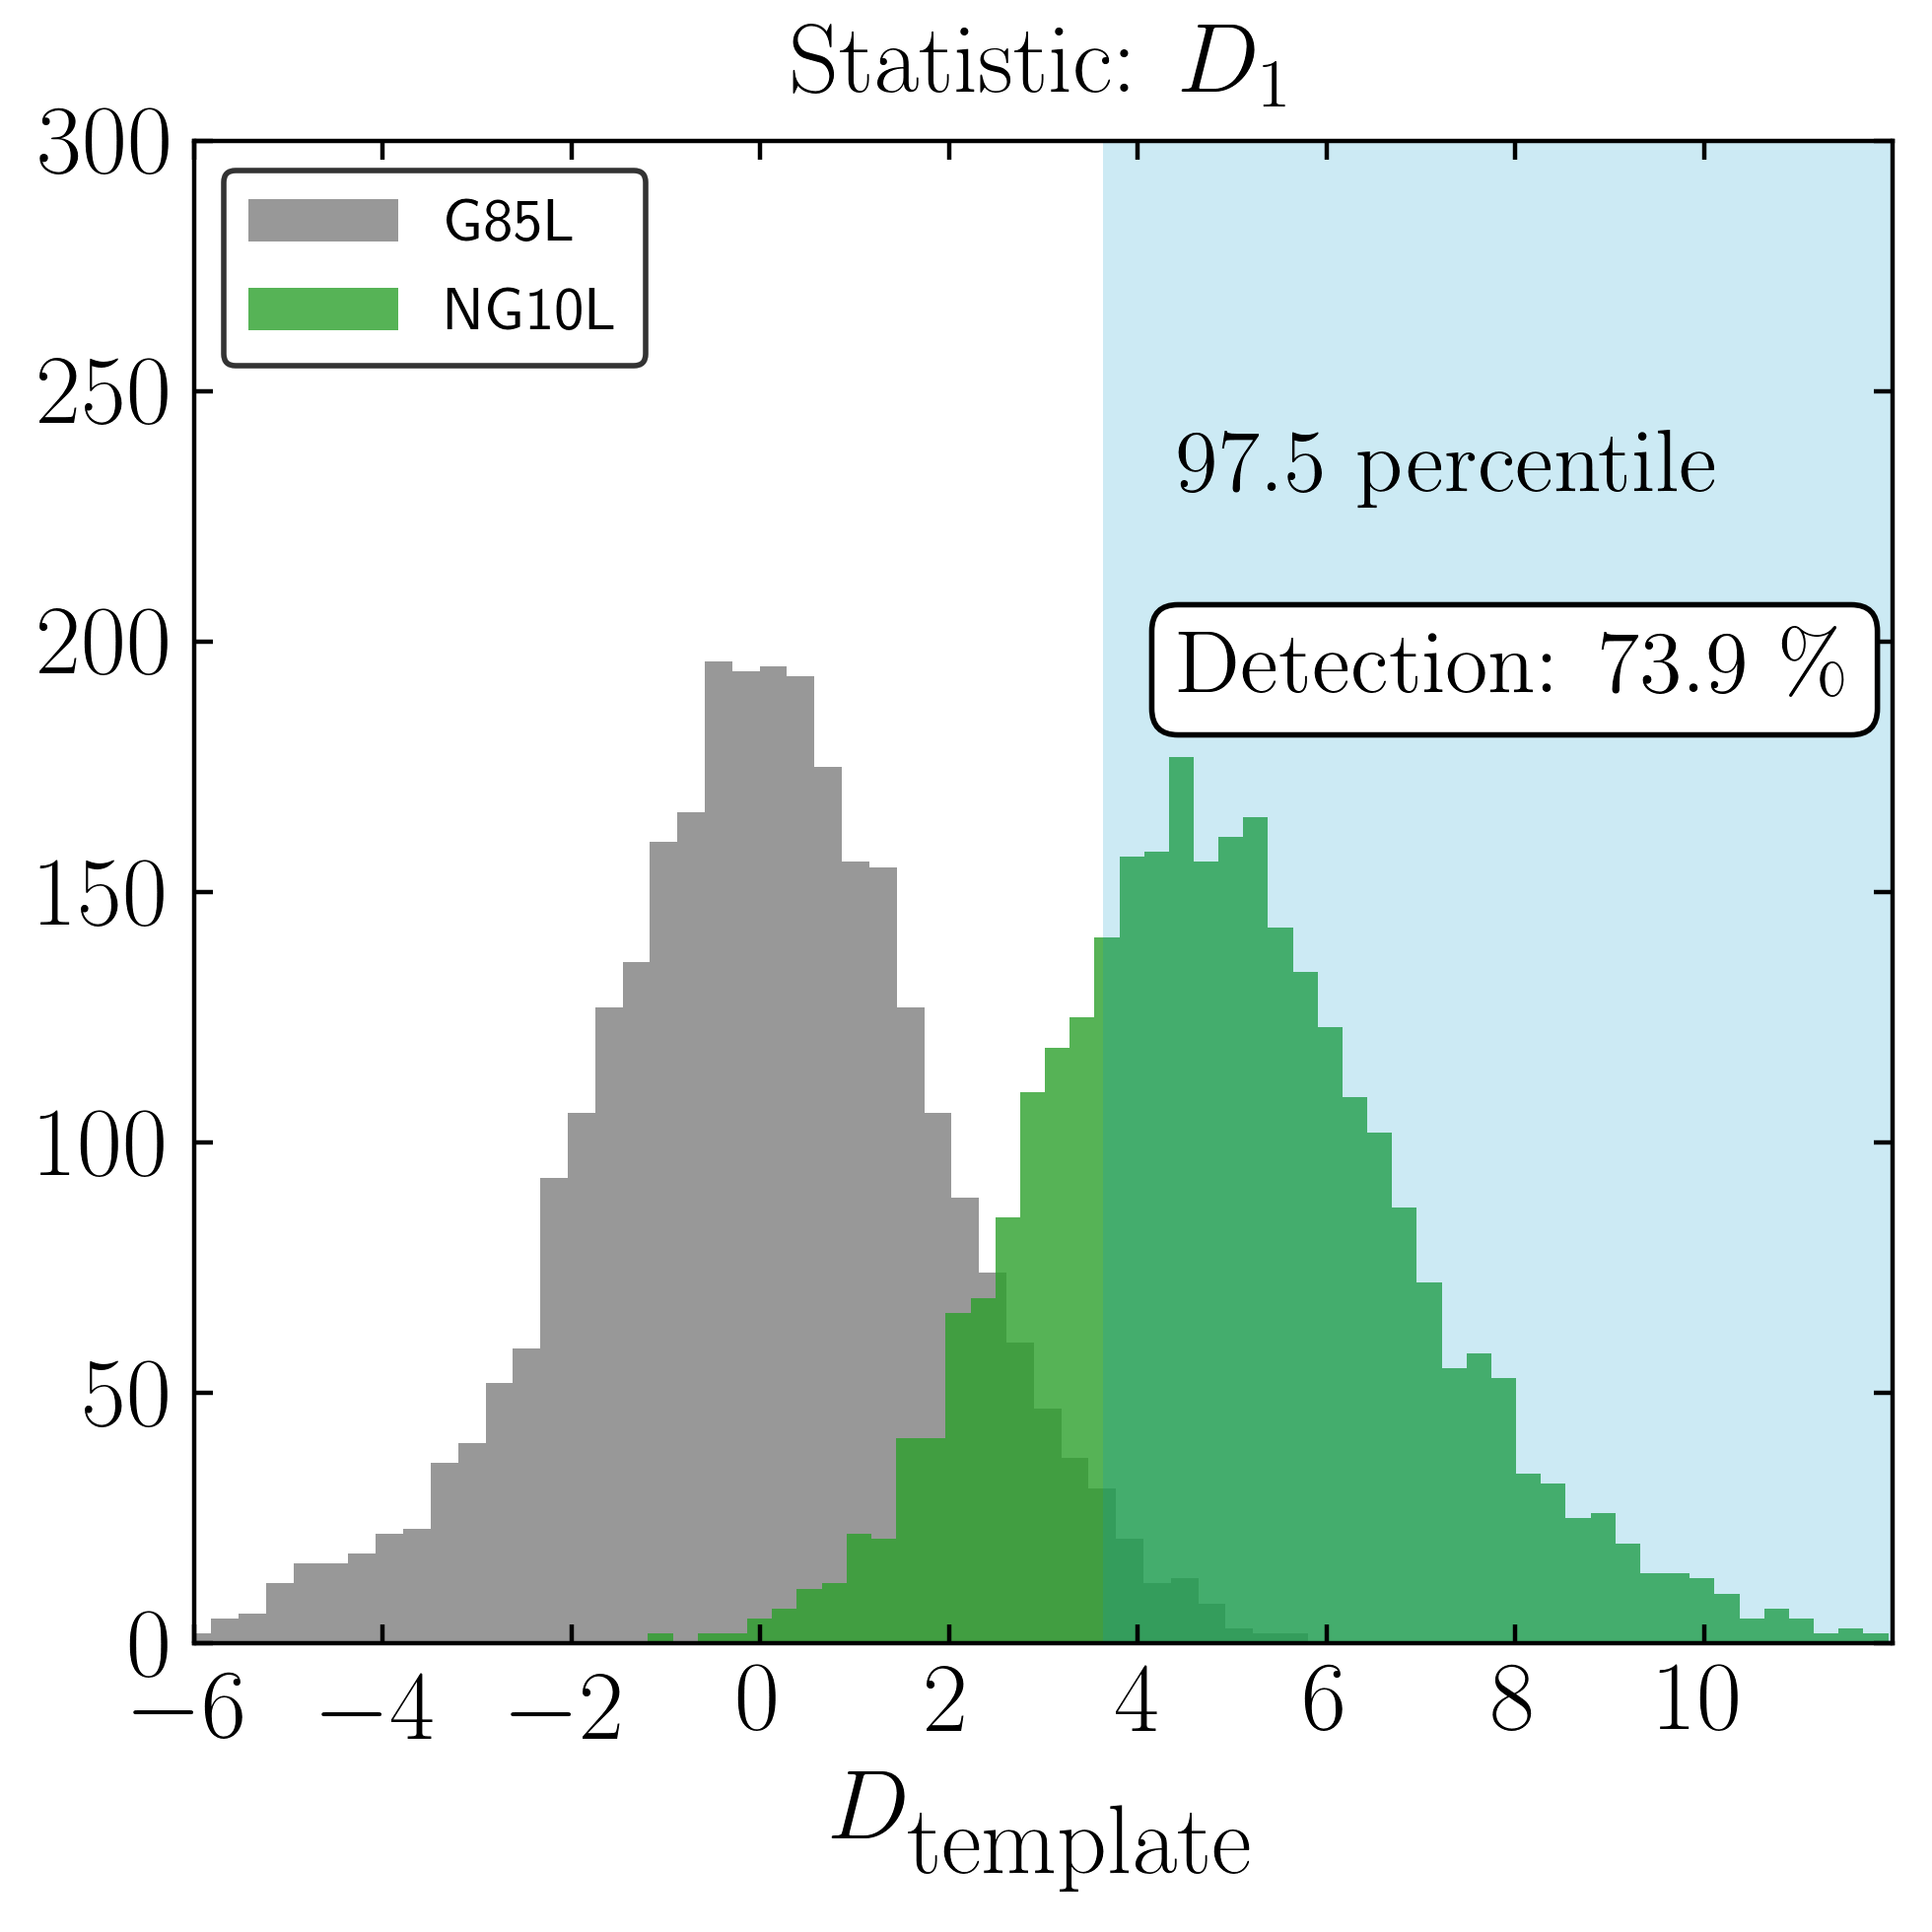

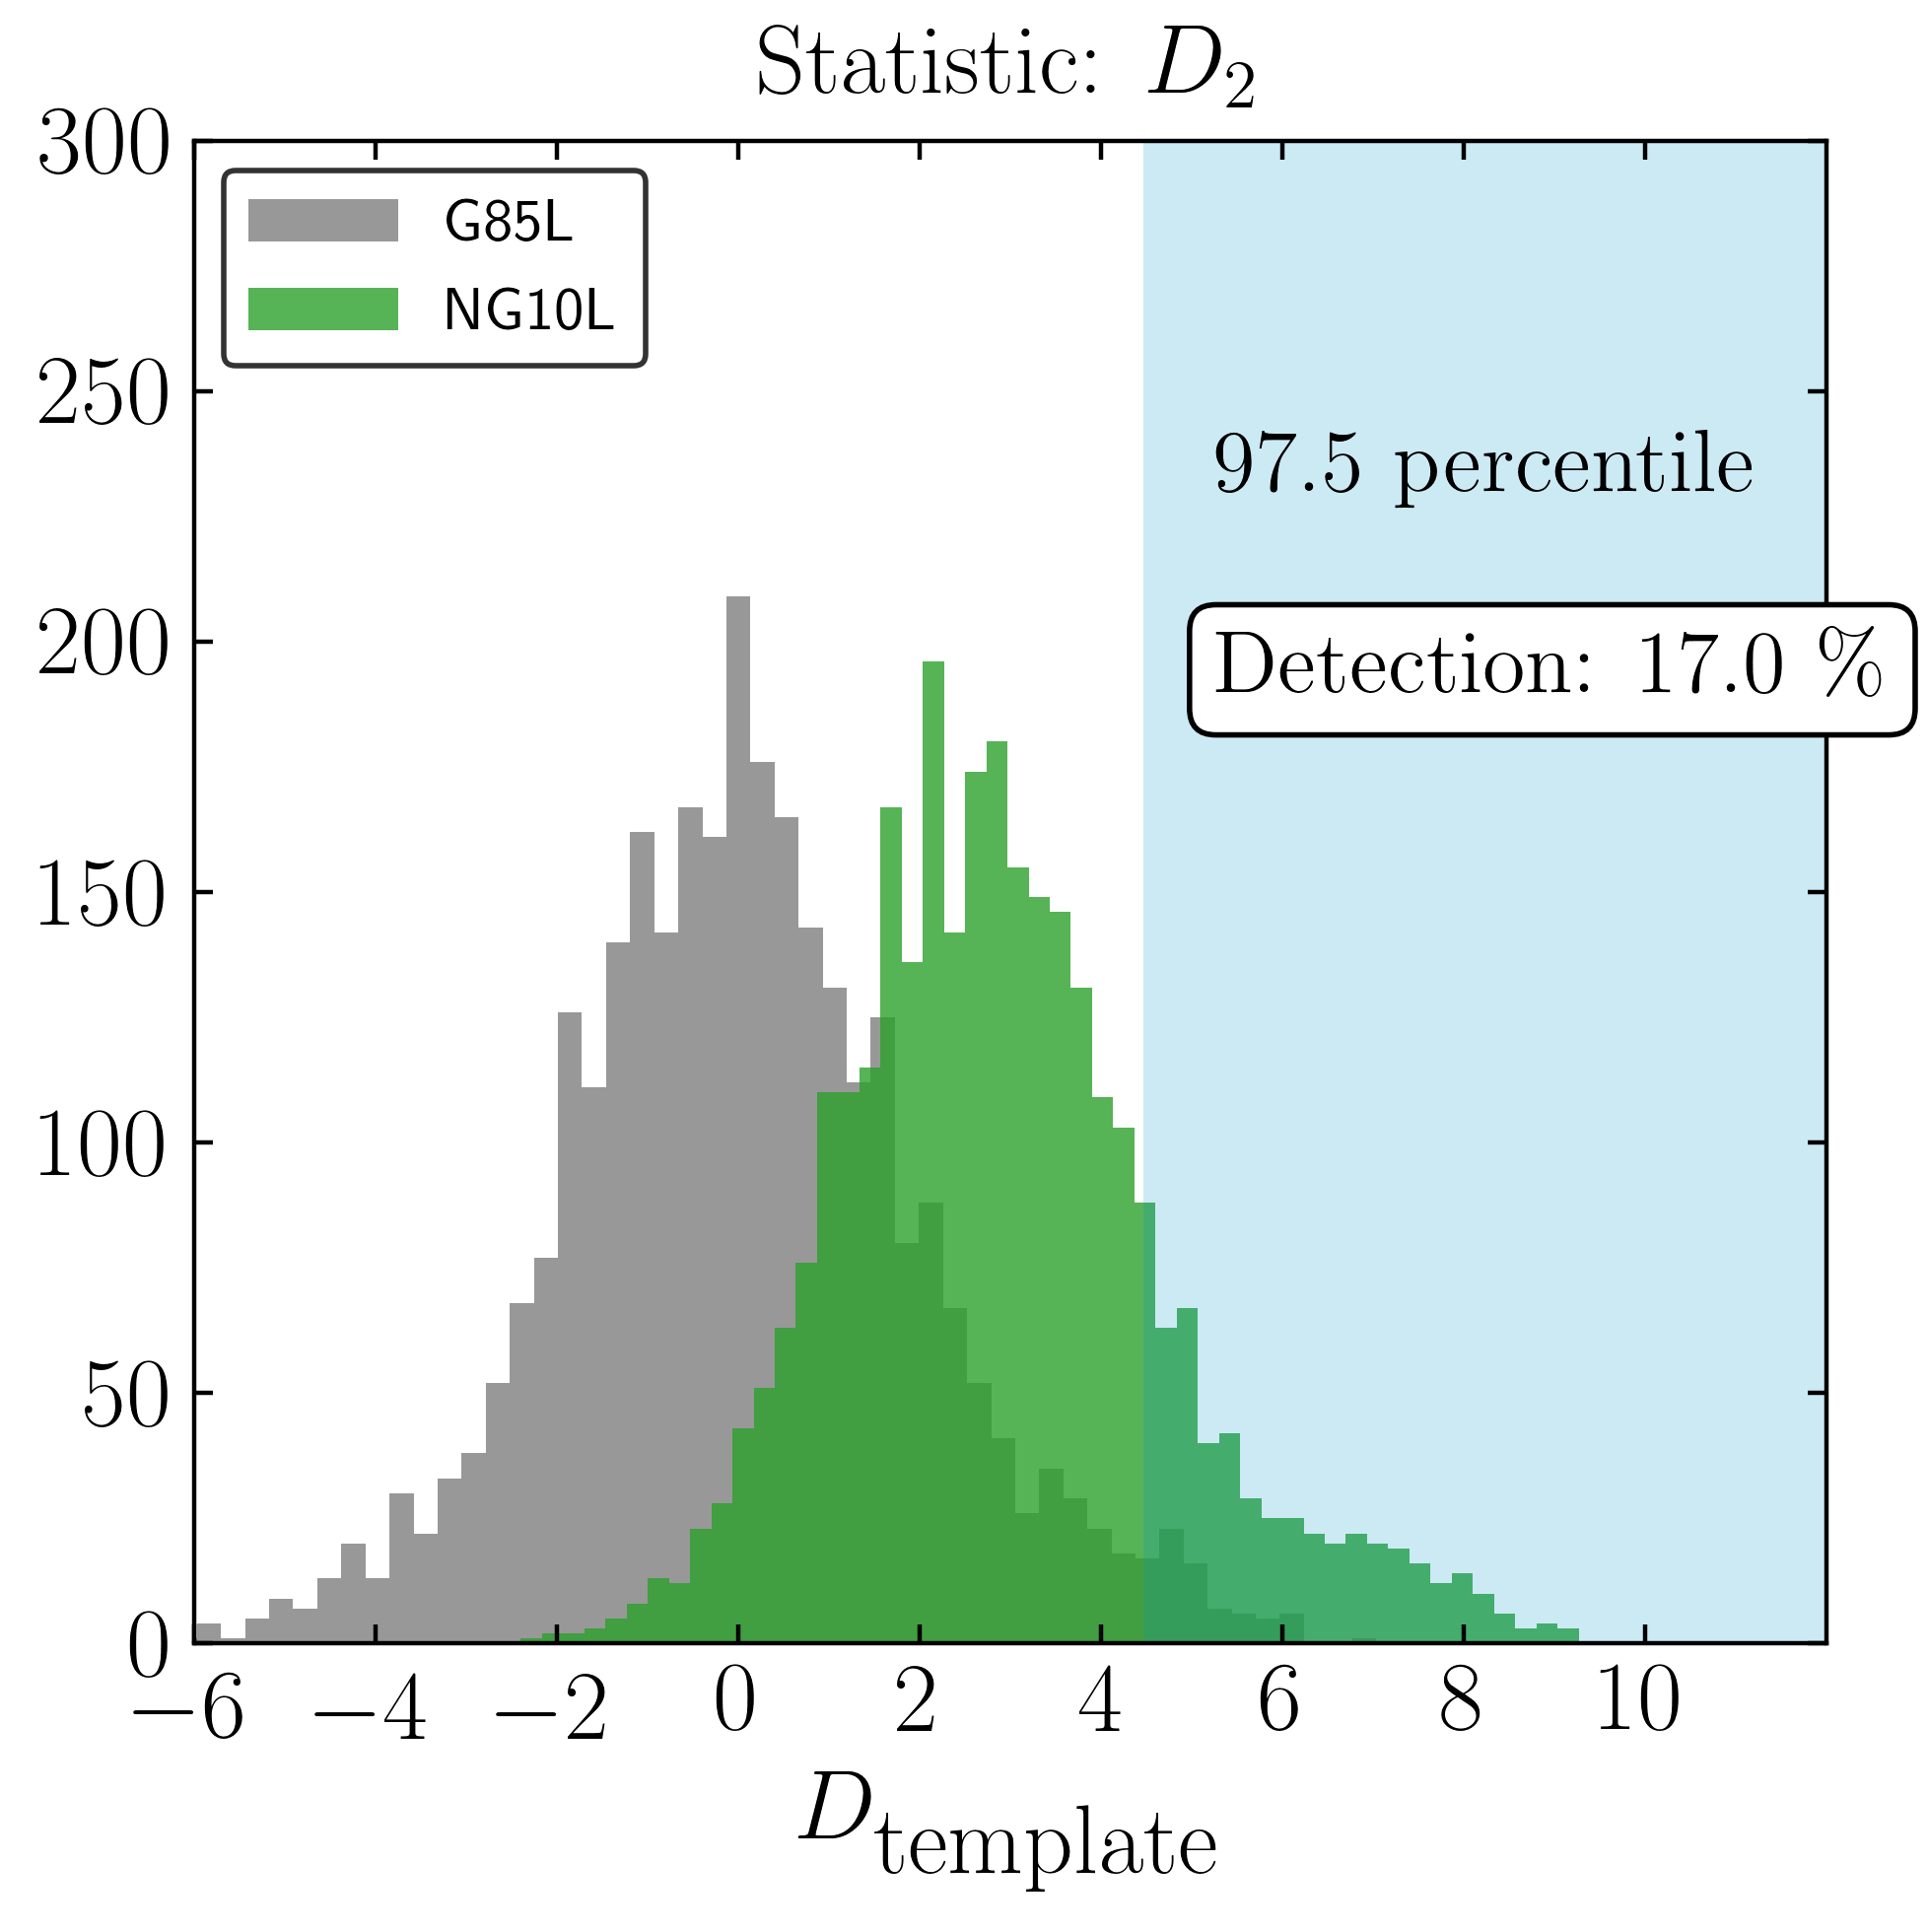

In [235]:
curve = ['$b_0$','$b_1$','$b_2$','$B_0$','$B_1$','$B_2$','$P_0$','$P_1$','$P_2$','$D_0$','$D_1$','$D_2$']
mvec = [0,2,10]
xtic=[-6,-4,-2,-0,2,4,6,8,10]
#xlab=['-6.0','-4.0','-2.0','0','2.0','4.0','6.0','8.0','10.0']
for i in range(12):
    plt.figure()
    plt.hist(sigListList2[i],bins=50,alpha=0.8,label='\\textsf{G85L}', histtype='stepfilled',color='C7');
    plt.hist(sigListList[i],bins=50,alpha=0.8,label='\\textsf{NG10L}', histtype='stepfilled', color='C2' );
    plt.legend(fontsize=11,handlelength=2.5,loc='upper left')
    plt.axvspan(perc95[i],12,alpha=0.2,color=blue2,lw=0)
    plt.xlabel('$D_{\\textrm{template}}$',fontsize=18)
    plt.xlim([-6,12])
    plt.ylim([0,300])
    props = dict(boxstyle='round', facecolor='white')
    plt.xticks(xtic)
# place a text box in upper left in axes coords
    plt.text(perc95[i]+0.8,230,'97.5 percentile',fontsize=16)
    plt.text(perc95[i]+0.8,190,'Detection: %.1f %s'%(anom[i]*100,'$\%$'),fontsize=16, bbox=props)
    plt.tick_params(direction='in',which='both', top = True, right = True, labelsize=18)
    #plt.title('Minus Log-Likelihood, $b_1$')
    plt.title('Statistic: %s'%curve[i],fontsize=18)
    plt.savefig('/Users/alex/BoxSync/Projects/LSS-NG/figures/z1LDTMconstraints_%s.pdf'%i)